# Walmart Sales Forecast Walkthrough

The purpose of this notebook is to guide through a typical checklist for an end-to-end data science project and demonstrate my thought process while solving a problem, in this case I am going to be working with a real life problem from Walmart.

My goal with this project it's to implement a prediction model and solve the problem the most efficient way posible, taking into account the cost of deployment and score of the trained model. For this, I am not looking for a perfect score but rather looking a sustainable model and cost efficient for the company.

# Machine Learning Workflow

Since I am dealing with a real life problem, I must implement a workflow to keep everything simple and having a clear goal to approach and reach. 

For my particular case the Machine Learning Workflow will have 7 sections:

**1.** Question or problem definition.

**2.** Acquire training and testing data.

**3.** Wrangle, prepare, cleanse the data.

**4.** Analyze, identify patterns, and explore the data.

**5.** Model, predict and solve the problem.

**6.** Visualize, report, and present the problem solving steps and final solution.

**7.** Supply or submit the results.

Having a clear mindset through the entire notebook may implied combining multiple workflow stages, perform a stage earlier than indicated or perfom a stage multiple times in our workflow. 

This would not change the main goal of the project or the approach we are trying to implement.

# Workflow goals

As a data scientist my job is to use every tool available to provide a solution for seven major goals: 

**1. Classifying:** I may want to classify or categorize our samples. I may also want to understand the implications or correlation of different classes with our solution goal.


**2. Correlating:** The problem need to be solved based on available features within the training dataset, so it is importan to ask: Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset.


**3. Converting:** Depending on the choice of model algorithm I may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.


**4. Complementing:** Data preparation may also require me to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.


**5. Correcting:** I may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors (Outliers).


**6. Creating:** I could create new features based on an existing feature or a set of features if I need to, such that the new feature follows the correlation, conversion and completeness goals.


**7. Charting:** Select the right visualization plots and charts depending on nature of the data and the solutions goals.

# Question or problem definition

## Problem description

There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. 

Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

## Project objective

Train a machine learning model which predicts sales of the Walmart stores in order to solve the company's problem and document every single step for future maintenance.

# Acquire training and testing data

## Load importan libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Settings
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
init_notebook_mode(connected=True)
sns.set_style('whitegrid')
%matplotlib inline

## Load project data

In [2]:
features_data = pd.read_csv('Data/features.csv')

stores_data = pd.read_csv('Data/stores.csv')

test_data = pd.read_csv('Data/test.csv')

train_data = pd.read_csv('Data/train.csv')

# Wrangle, prepare, cleanse the data

## Understanding the data information

### Features data

In [3]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### Stores data

In [4]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


### Test data

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


### Train data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Understanding the data

### Features data dictionary
This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

**Store:**
Store number

**Date:**
Week

**Temperature:**
Average temperature in the region

**Fuel_Price:**
Cost of fuel in the region

**MarkDown1:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown2:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown3:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown4:**
Anonymized data related to promotional markdowns that Walmart is running.

**MarkDown5:**
Anonymized data related to promotional markdowns that Walmart is running.

**CPI:**
The consumer price index

**Unemployment:**
The unemployment rate

**IsHoliday:**
Whether the week is a special holiday week

### Stores data dictionary
This file contains anonymized information about the 45 stores, indicating the type and size of the store:

**Store:**
Stores numbered from 1 to 45

**Type:**
Store type has been provided, there are 3 types — A, B and C.

**Size:**
Stores size has provided

### Train data dictionary
This is the historical training data, which covers 2010–02–05 to 2012–11–01. Within this file you will find the following fields:

**Store:**
The store number

**Dept:**
The department number

**Date:**
The week

**Weekly_Sales:**
Sales for the given department in the given store,

**IsHoliday:**
Whether the week is a special holiday week

### Test data dictionary
This file is identical to train.csv, except we have withheld the weekly sales.

**Store:**
The store number

**Dept:**
The department number

**Date:**
The week

**IsHoliday:**
Whether the week is a special holiday week

## Understanding the data structure

### Features data

In [7]:
features_data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

### Stores data

In [8]:
stores_data.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

### Train data

In [9]:
train_data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

### Test data

In [10]:
test_data.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

## Data Cleanse

I can see that Features, Stores and Train data have a similar structure. For feature engineering purposes I will merge this datasets into one dataset.

In [11]:
data = train_data.merge(features_data, on = ['Store', 'Date'], how = 'inner').merge(stores_data, on = ['Store'], 
                                                                                    how = 'inner')

### Data (New)

In [12]:
data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     2  2010-02-05      50605.27        False        42.31   
2      1     3  2010-02-05      13740.12        False        42.31   
3      1     4  2010-02-05      39954.04        False        42.31   
4      1     5  2010-02-05      32229.38        False        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.572        NaN        NaN        NaN        NaN        NaN   
2       2.572        NaN        NaN        NaN        NaN        NaN   
3       2.572        NaN        NaN        NaN        NaN        NaN   
4       2.572        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.096358         8.106        False    A  151315  
2  211.096358         8.106        False    A  151315  
3  211.096358         8.106        False    A  151315  
4  211.096358         8.106        False    A  151315

### Drop duplicate columns

Because of the join now we have 2 IsHoliday columns, I am going to drop the second one created (In pandas X it's the first one, Y the second one and so on...)

In [13]:
data.drop('IsHoliday_y', axis = 1, inplace = True)

### Re-organized

I am going to organized the columns to make it easy to read and understand through the project.

In [14]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [15]:
new_columns = ['Store', 'Dept', 'Type', 'Size', 'Date', 'IsHoliday_x', 'Weekly_Sales', 'Temperature',
       'Fuel_Price',  'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5']

data = data[new_columns]

### Rename 

In [16]:
data.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True, errors = 'raise')

## Completing the data

In this stage I am going to be solving the problem of Missing Values in a Dataset. Model algorithms may work best when there are no missing values, since if missing values are filled in a proper way, I am technically not losing any value.

### Data

In [17]:
pd.DataFrame(data.isnull().sum(), columns = ['Missing Values'])

Missing Values
Store                      0
Dept                       0
Type                       0
Size                       0
Date                       0
IsHoliday                  0
Weekly_Sales               0
Temperature                0
Fuel_Price                 0
CPI                        0
Unemployment               0
MarkDown1             270889
MarkDown2             310322
MarkDown3             284479
MarkDown4             286603
MarkDown5             270138

### Testing data

In [18]:
pd.DataFrame(test_data.isnull().sum(), columns = ['Missing Values'])

Missing Values
Store                   0
Dept                    0
Date                    0
IsHoliday               0

### Missing values approach

In [19]:
MissingValues = pd.DataFrame(data.isnull().sum())[-5:]

MissingValues.rename(columns = {0 : 'Missing'}, inplace = True, errors = 'raise')

MissingValues['Missing %'] = round(MissingValues['Missing'] / data.shape[0] * 100, 2)

MissingValues['Not Missing'] = data.shape[0] - MissingValues['Missing']

MissingValues['Not Missing %'] = round(MissingValues['Not Missing'] / data.shape[0] * 100, 2)

MissingValues

Missing  Missing %  Not Missing  Not Missing %
MarkDown1   270889      64.26       150681          35.74
MarkDown2   310322      73.61       111248          26.39
MarkDown3   284479      67.48       137091          32.52
MarkDown4   286603      67.98       134967          32.02
MarkDown5   270138      64.08       151432          35.92

It looks like our MarkDown's columns have way too many missing values. But are these really missing values or there is something else? 

In order to check this we need to understand what these MarkDown's colums are.


**MarkDown:** Anonymized data related to promotional markdowns that Walmart is running.


So it's a promotional markdown. So if the value is missing, this means that by that specific time there were not promotional markdowns running. 

So how does the data look when there is a promotional markdown running?

In [20]:
data.dropna()[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].head()

MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5
6587    10382.9    6115.67     215.07    2406.62    6551.42
6588    10382.9    6115.67     215.07    2406.62    6551.42
6589    10382.9    6115.67     215.07    2406.62    6551.42
6590    10382.9    6115.67     215.07    2406.62    6551.42
6591    10382.9    6115.67     215.07    2406.62    6551.42

Even when I don't understand these numbers (Anonymized by Walmart) I can see that it's a float showing some kind of returns or profit.

The NaN values are showing that in that particular time they were not promotional markdown running, so there's not gonna be any return or profits in that week. For this reason, I have decided to fill the NaN values of MarkDown's columns with 0.

### Filling Missing Values 

In [21]:
data.fillna(value = 0.0, axis = 0, inplace = True)

### Missing Values stage summary 

In [22]:
pd.DataFrame(data.isnull().sum(), columns = ['Missing Values'])

Missing Values
Store                      0
Dept                       0
Type                       0
Size                       0
Date                       0
IsHoliday                  0
Weekly_Sales               0
Temperature                0
Fuel_Price                 0
CPI                        0
Unemployment               0
MarkDown1                  0
MarkDown2                  0
MarkDown3                  0
MarkDown4                  0
MarkDown5                  0

With the right interpretation and approach, I have managed to fill all the missing values and now our data is complete to continue with the machine learning workflow. 

## Understanding the data statistics

### Data
#### Numeric data

In [23]:
round(data.describe())

Store      Dept      Size  Weekly_Sales  Temperature  Fuel_Price  \
count  421570.0  421570.0  421570.0      421570.0     421570.0    421570.0   
mean       22.0      44.0  136728.0       15981.0         60.0         3.0   
std        13.0      30.0   60981.0       22711.0         18.0         0.0   
min         1.0       1.0   34875.0       -4989.0         -2.0         2.0   
25%        11.0      18.0   93638.0        2080.0         47.0         3.0   
50%        22.0      37.0  140167.0        7612.0         62.0         3.0   
75%        33.0      74.0  202505.0       20206.0         74.0         4.0   
max        45.0      99.0  219622.0      693099.0        100.0         4.0   

            CPI  Unemployment  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
count  421570.0      421570.0   421570.0   421570.0   421570.0   421570.0   
mean      171.0           8.0     2590.0      880.0      468.0     1083.0   
std        39.0           2.0     6052.0     5085.0     5529.0     3895.0   
min       126.0           4.0        0.0     -266.0      -29.0        0.0   
25%       132.0           7.0        0.0        0.0        0.0        0.0   
50%       182.0           8.0        0.0        0.0        0.0        0.0   
75%       212.0           9.0     2809.0        2.0        5.0      425.0   
max       227.0          14.0    88647.0   104520.0   141631.0    67475.0   

       MarkDown5  
count   421570.0  
mean      1663.0  
std       4208.0  
min          0.0  
25%          0.0  
50%          0.0  
75%       2168.0  
max     108519.0

The mean weekly sales are 15981 which is less that I was expecting it to be. I can also see that it has a large standard deviation this is probably due to the sample having way too many outliers, I might have to take a look at that. 

Temperature since too be normal, the mean of fahrenheit doesn't really tell us that the sample was taken for a cold or a hot city. But I can see that some stores reported down to -2.0 and up to a 100. So I have some variarity in the sample.

The fuel price at $3 it's pretty normal for USA Standards and the variation in the price is not that much and the unemployment mean it's 8.0 which is average for USA, but we can see that at some point it got has high as 14.0, probably by that point sales reduce significantly (We must give that a look).

In overall very good predictors for our model, looking forward to see the MarkDown's correlation in the Charting phase. 

#### Categorical data

In [24]:
data.describe(include = 'O')

Type        Date
count   421570      421570
unique       3         143
top          A  2011-12-23
freq    215478        3027

There is only 3 variables for Type, each one represents the Walmart category where A is the best one. Then I have date with over 3000 entries in one particular day, 2011-12-23 which is two days before chrismas. That might be a factor.

#### Binary data

In [25]:
data.describe(include = np.bool_)

IsHoliday
count     421570
unique         2
top        False
freq      391909

Having only one binary variable, telling me if that particular day of week was a holiday or not. I will have to transform this variable in 0 and 1 in order to analyse and take conclusions out of it. 

Besides that, an expected dataset for the project I am developing. I can tell by now that I do have the tools we need to a good performance model.

# Analyze, identify patterns, and explore the data

For this project our target will be predicting the weekly sales for each Walmart store, so it is escential for us to start analyzing and understanding our target distribution and statistics.

## Weekly sales (Project Target)

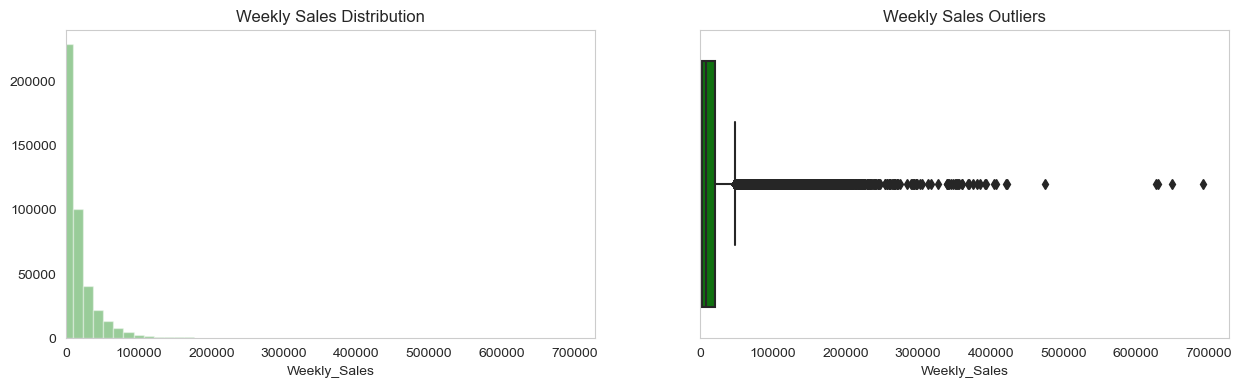

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(data['Weekly_Sales'], kde = False, ax = ax1, color = 'green')

ax1.grid(False)
ax1.set_title('Weekly Sales Distribution')
ax1.set_xlim(0)

sns.boxplot(data['Weekly_Sales'], ax = ax2, color = 'green')

ax2.grid(False)
ax2.set_title('Weekly Sales Outliers')
ax2.set_xlim(0);

As I noticed in the data statistics, having a large standard deviation means having a lot of outliers in our sample. Presence of outliers may cause problems during model fitting and may also result in inflated error metrics which give higher weights to large errors. It is necessary to treat outliers before building a machine learning model.

### Removing target outliers

I will try removing the observations above the quantile 0.98 percentage of observations.

In [27]:
# ONLY RUN THIS CELL ONCE!!!

data = data[data['Weekly_Sales'] < data['Weekly_Sales'].quantile(q = 0.98)]

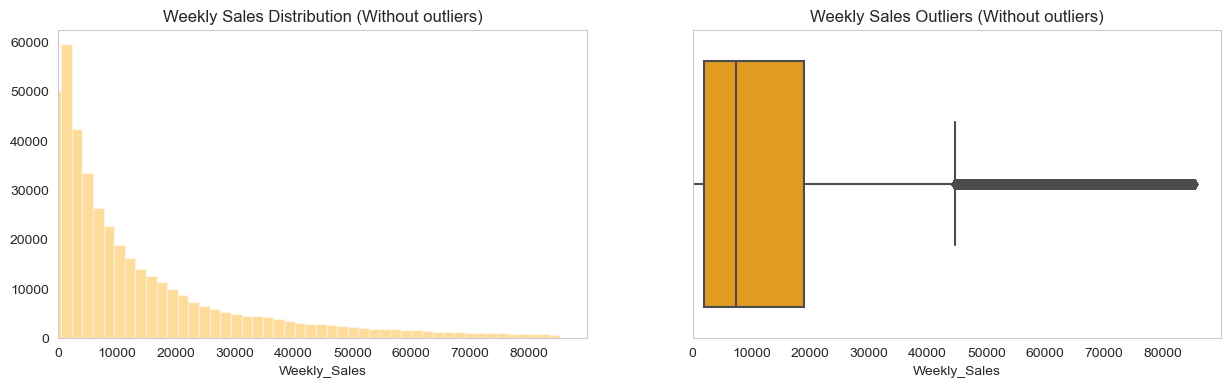

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(data['Weekly_Sales'], kde = False, ax = ax1, color = 'orange')

ax1.grid(False)
ax1.set_title('Weekly Sales Distribution (Without outliers)')
ax1.set_xlim(0)

sns.boxplot(data['Weekly_Sales'], ax = ax2, color = 'orange')

ax2.grid(False)
ax2.set_title('Weekly Sales Outliers (Without outliers)')
ax2.set_xlim(0);

After removing the outliers I can see that the distribution presents a right skewness. I might have to relax this assumption when checking linearity.

## Data sales correlations

Finding what features correlates in out data is a must to understand it. I will start by doing a general comparation with a heatmap, understanding the correlation between each feature and then compare the target with each particular feature. 

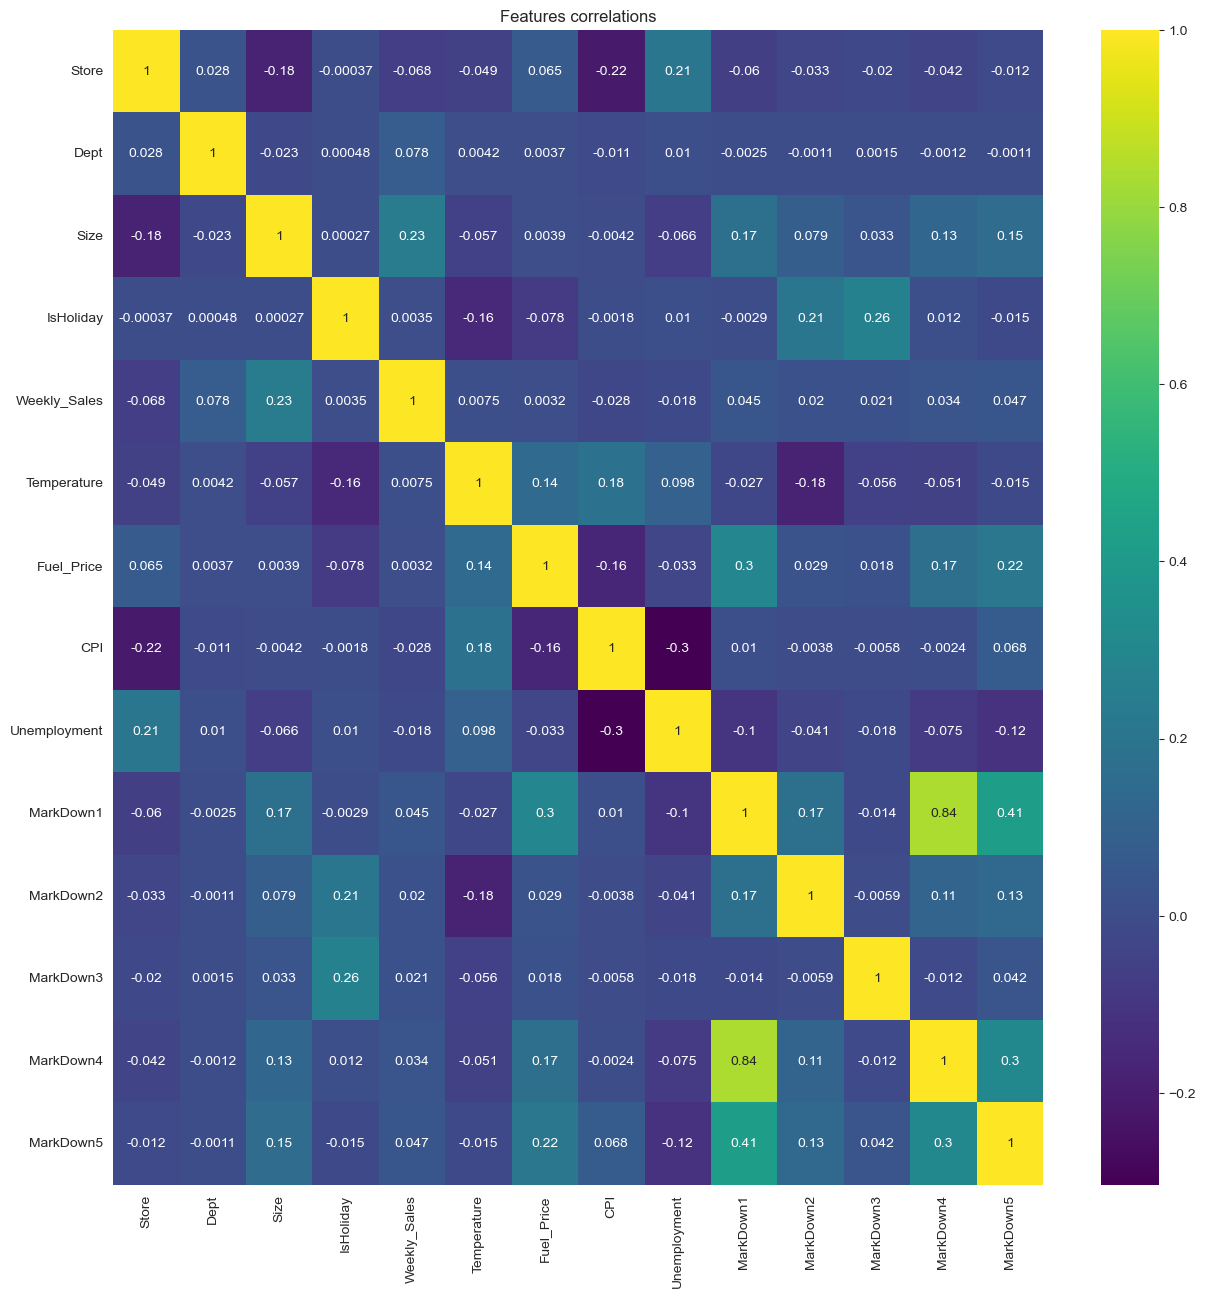

In [29]:
plt.figure(figsize = (15, 15))

sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

plt.title('Features correlations');

It looks like a couple of MarkDown variables have a lot of positive correlation, MarkDown1 and MarkDown4 have a correlation above 0.60, this tells me that this feature may have the same information in difference storage methods and that can cause multicollinearity, I need to give it a look when relaxing our assumptions.

## Weekly sales correlations

In [30]:
pd.DataFrame(data.corr()['Weekly_Sales']).sort_values(by = 'Weekly_Sales', ascending = False)[1:]

Weekly_Sales
Size              0.234218
Dept              0.078021
MarkDown5         0.047069
MarkDown1         0.044548
MarkDown4         0.034062
MarkDown3         0.021179
MarkDown2         0.019713
Temperature       0.007516
IsHoliday         0.003486
Fuel_Price        0.003208
Unemployment     -0.018014
CPI              -0.028463
Store            -0.067575

Store it's the less correlated variable which is fine, since it's just the number of that particular store (ID) and I might need to drop this variable in the pre-processing phase since it has no predictive value.

Unemployment and CPI also have a negative correlation with our target, I need to explore this variables to understand why. Size it's the more correlate it feature which makes sense, since the bigger the store the more things to sell and the more profit to make. Besides that, all the other features have a positive correlation and we can continue exploring those relationships.

## Categorical Data

This exploratory data analysis have the goal of understanding each categorical predictors.

### Type & Dept

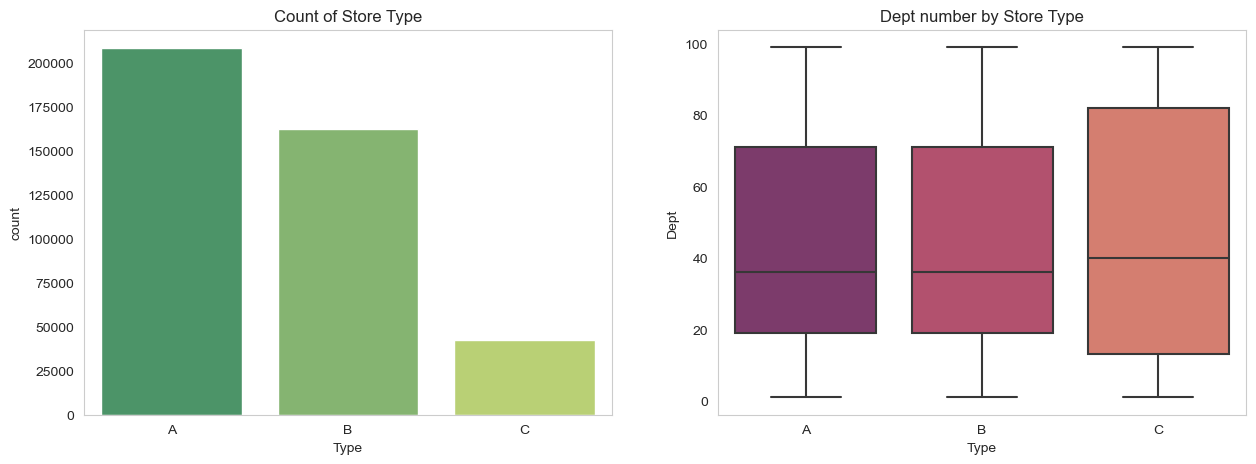

In [31]:
fig, (ax1, ax2) = plt.subplots(sharex = False, sharey = False, ncols = 2, figsize = (15, 5))
 
sns.countplot(data['Type'], palette = 'summer', ax = ax1)

ax1.grid(False)
ax1.set_title('Count of Store Type');

sns.boxplot(x = 'Type', y = 'Dept', data = data, palette = 'flare_r', ax = ax2)

ax2.grid(False)
ax2.set_title('Dept number by Store Type');

Type A and Type B Stores are more common than Type C Stores. It would be interesting to plot this in a hue with the Weekly_Sales.

It also looks like Type C Stores usually have more department's than the other Types. This might be cause due to demand and supply, probably these stores are located in a country town where theres more demand for specific items. This might be the explanaition of why Type C Stores are less usual. 

We can verify this by looking at the average temperature of the Type C stores.

### IsHoliday

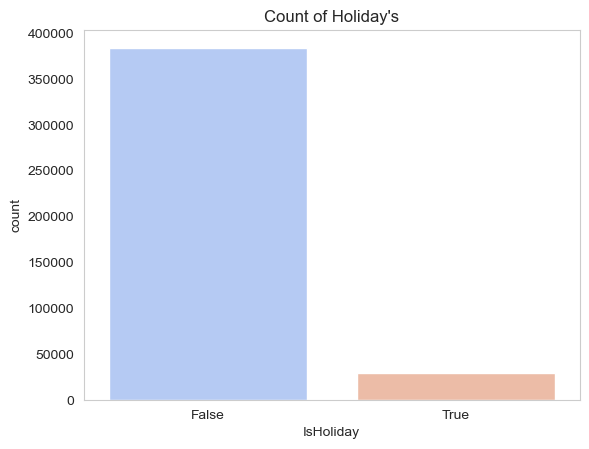

In [32]:
sns.countplot(data['IsHoliday'], palette = 'coolwarm')

plt.grid(False)
plt.title("Count of Holiday's");

## Numerical Data

Just like the categorical data, this exploratory data analysis have the goal of understanding each numerical predictors. I will explore correlations with the target in the next section.

For numerical data I will look at the distribution and outliers to understand the data. 

### Size

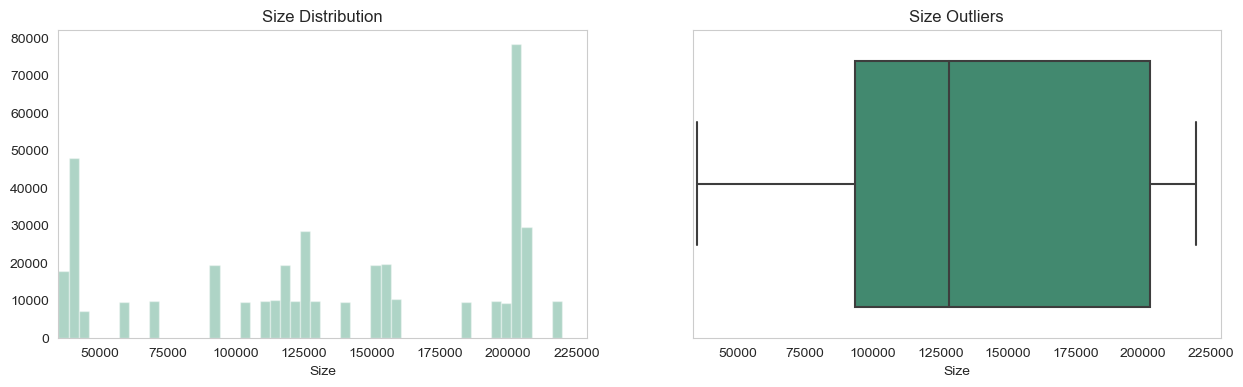

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(data['Size'], kde = False, ax = ax1, color = '#369572')

ax1.grid(False)
ax1.set_title('Size Distribution')
ax1.set_xlim(data['Size'].min())

sns.boxplot(data['Size'], ax = ax2, color = '#369572')

ax2.grid(False)
ax2.set_title('Size Outliers')
ax2.set_xlim(data['Size'].min() - 1500);

Most of the Stores have a Size of around 200.000 and it looks like most of the samples are distributed around the mean. 

### Temperature

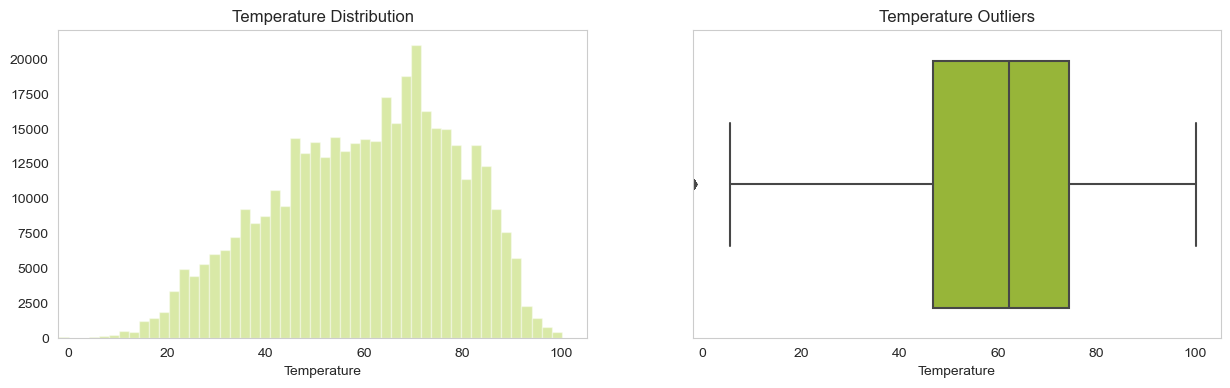

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(data['Temperature'], kde = False, ax = ax1, color = '#A1CA24')

ax1.grid(False)
ax1.set_title('Temperature Distribution')
ax1.set_xlim(data['Temperature'].min())

sns.boxplot(data['Temperature'], ax = ax2, color = '#A1CA24')

ax2.grid(False)
ax2.set_title('Temperature Outliers')
ax2.set_xlim(data['Temperature'].min());

The temperature distribution seems to be normal and boxplot it's only showing one outlier, looking very good. Machine Learning algorithms work better with normal distributed data.

### Fuel_Price

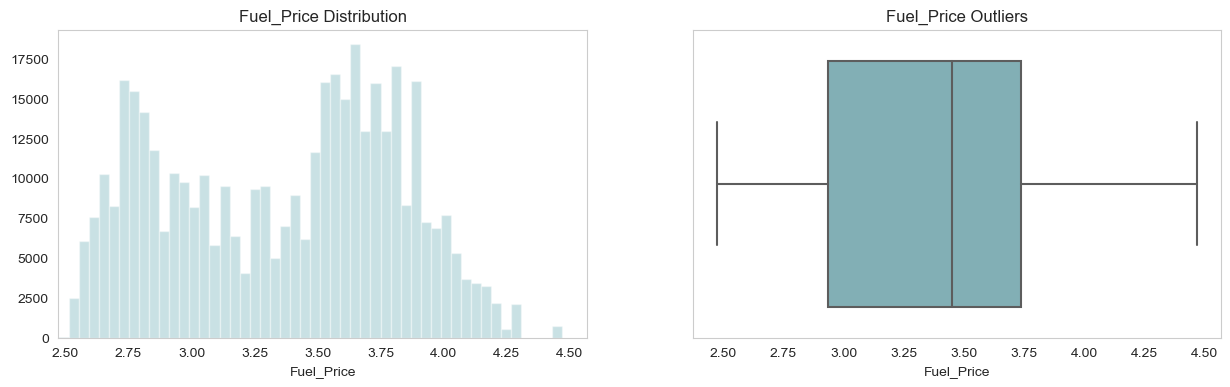

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(data['Fuel_Price'], kde = False, ax = ax1, color = '#79B5BD')

ax1.grid(False)
ax1.set_title('Fuel_Price Distribution')
ax1.set_xlim(data['Fuel_Price'].min())

sns.boxplot(data['Fuel_Price'], ax = ax2, color = '#79B5BD')

ax2.grid(False)
ax2.set_title('Fuel_Price Outliers')
ax2.set_xlim(data['Fuel_Price'].min()-0.1);

Fuel prices are usually higher in States like California or Nevada and usally lower in States like Florida or Indiana. So it makes sensa that the distribution is not normally distributed, when I look at the mean it's around 3.4$ which makes sense to United State ranges. You are free to visit: [USA Gas prices](https://gasprices.aaa.com/) 

### CPI

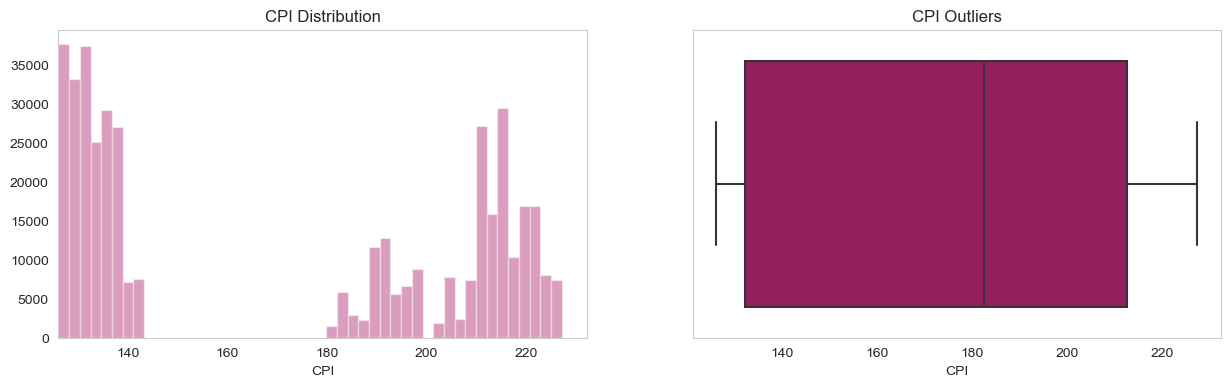

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(data['CPI'], kde = False, ax = ax1, color = '#A50B5D')

ax1.grid(False)
ax1.set_title('CPI Distribution')
ax1.set_xlim(data['CPI'].min())

sns.boxplot(data['CPI'], ax = ax2, color = '#A50B5D')

ax2.grid(False)
ax2.set_title('CPI Outliers')
ax2.set_xlim(data['CPI'].min() - 5);

CPI shows the inflation of the items through the years, it looks like most of the observations were ranging from 0 to 150, but I also have some ranging from 180 up to 230. I would love to see if theres really some correlation between the weekly sales and CPI. Probably it's just a feature adjusting our target sales to inflation. Which is good, since the higher the CPI the higher the sales (Even when it's just because of inflation)

### Unemployment

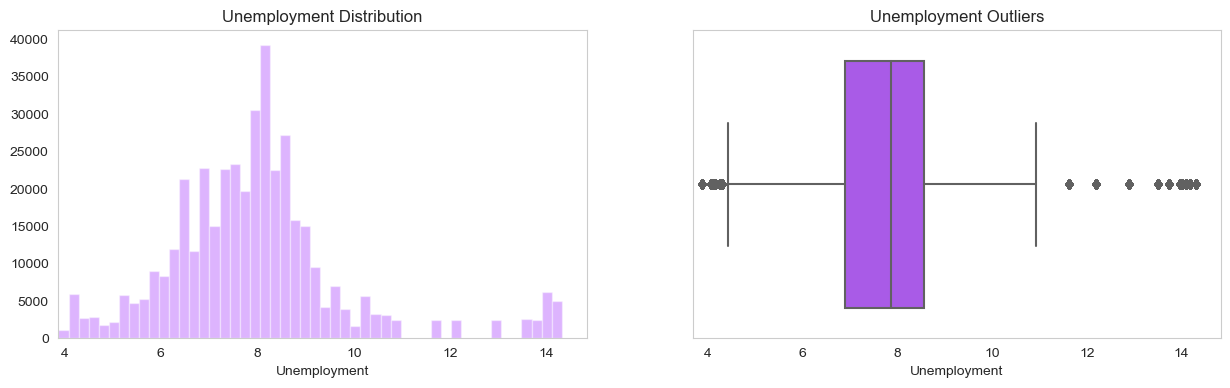

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 4))

sns.distplot(data['Unemployment'], kde = False, ax = ax1, color = '#AB44FE')

ax1.grid(False)
ax1.set_title('Unemployment Distribution')
ax1.set_xlim(data['Unemployment'].min())

sns.boxplot(data['Unemployment'], ax = ax2, color = '#AB44FE')

ax2.grid(False)
ax2.set_title('Unemployment Outliers')
ax2.set_xlim(data['Unemployment'].min() - 0.2);

Unemployment distribution shows a couple of outliers, unfortunately we cannot remove this outliers. Because the higher the unemployment the less people buying and the lower the unemployment the more people buying, this is probably a good indicator of weekly sales. So have decided to keep the outliers, since they have predicting value.

### MarkDown's

Since I can't understand the MarkDown's colums, I will plot them together to see the distribution's and outliers.

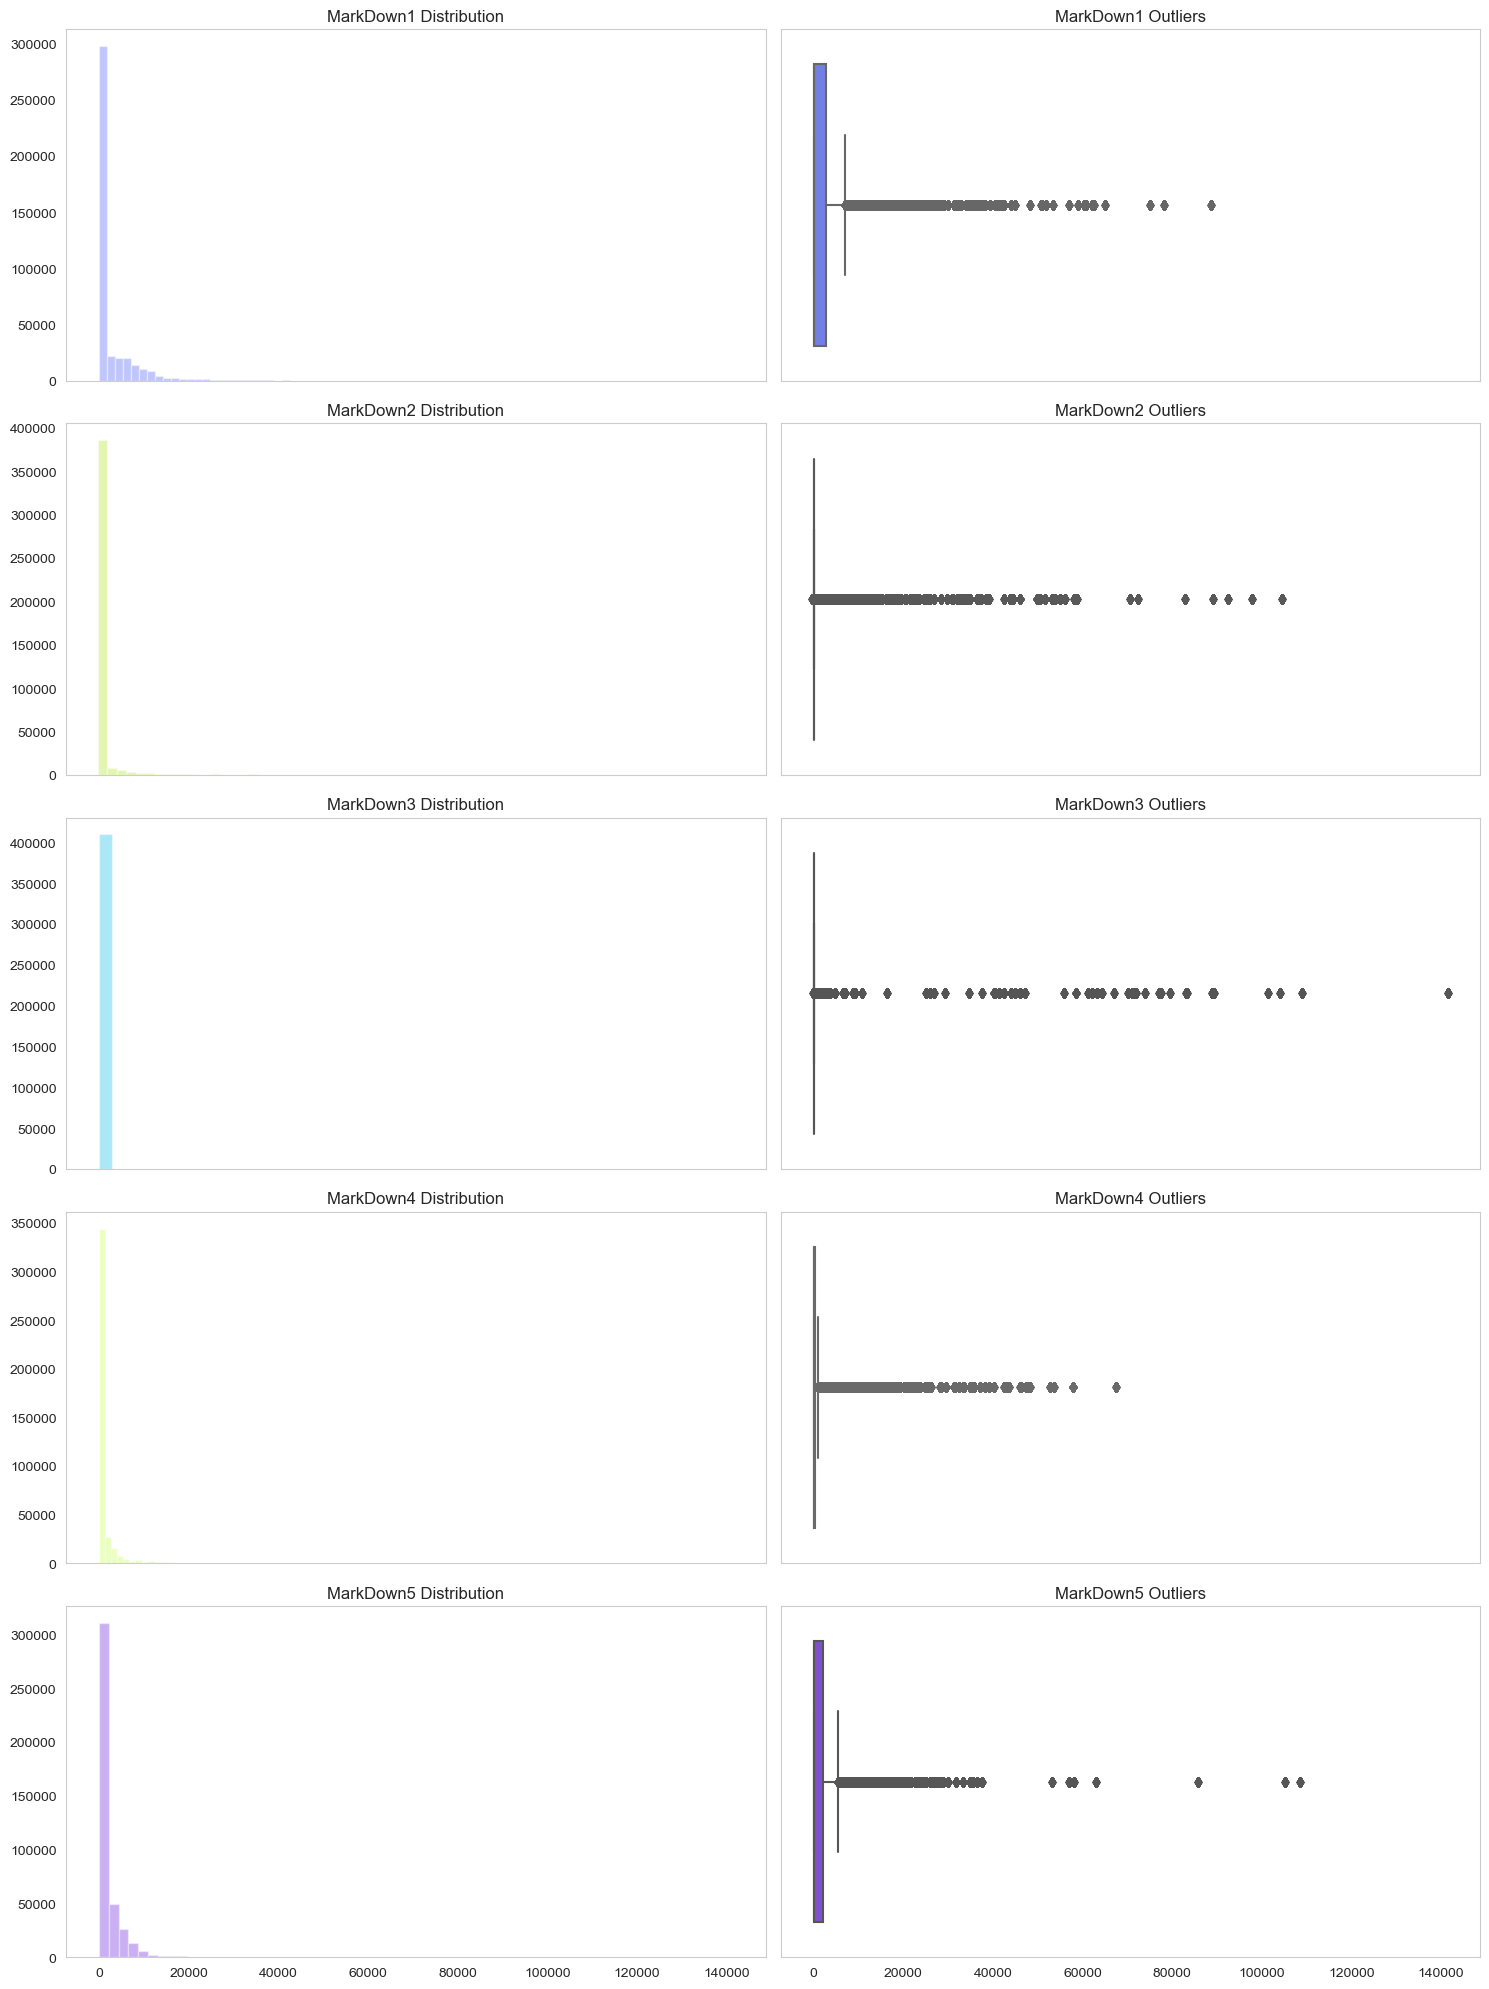

In [38]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(ncols = 2, nrows = 5, sharex = True, 
                                                                                  figsize = (15, 20))

# MarkDown1 ---------------------------------------------------------------------------------------------------------------

sns.distplot(data['MarkDown1'], kde = False, ax = ax1, color = '#6072F6')

ax1.grid(False)
ax1.set_title('MarkDown1 Distribution')
ax1.set_xlabel('')

sns.boxplot(data['MarkDown1'], ax = ax2, color = '#6072F6')

ax2.grid(False)
ax2.set_title('MarkDown1 Outliers')
ax2.set_xlabel('')

# MarkDown2 ---------------------------------------------------------------------------------------------------------------

sns.distplot(data['MarkDown2'], kde = False, ax = ax3, color = '#B8EA3B')

ax3.grid(False)
ax3.set_xlabel('')
ax3.set_title('MarkDown2 Distribution')

sns.boxplot(data['MarkDown2'], ax = ax4, color = '#B8EA3B')

ax4.grid(False)
ax4.set_xlabel('')
ax4.set_title('MarkDown2 Outliers')

# MarkDown3 ---------------------------------------------------------------------------------------------------------------

sns.distplot(data['MarkDown3'], kde = False, ax = ax5, color = '#2FC3ED')

ax5.grid(False)
ax5.set_xlabel('')
ax5.set_title('MarkDown3 Distribution')

sns.boxplot(data['MarkDown3'], ax = ax6, color = '#2FC3ED')

ax6.grid(False)
ax6.set_xlabel('')
ax6.set_title('MarkDown3 Outliers')

# MarkDown4 ---------------------------------------------------------------------------------------------------------------

sns.distplot(data['MarkDown4'], kde = False, ax = ax7, color = '#CFFF64')

ax7.grid(False)
ax7.set_xlabel('')
ax7.set_title('MarkDown4 Distribution')

sns.boxplot(data['MarkDown4'], ax = ax8, color = '#CFFF64')

ax8.grid(False)
ax8.set_xlabel('')
ax8.set_title('MarkDown4 Outliers')

# MarkDown5 ---------------------------------------------------------------------------------------------------------------

sns.distplot(data['MarkDown5'], kde = False, ax = ax9, color = '#7C3BE3')

ax9.grid(False)
ax9.set_xlabel('')
ax9.set_title('MarkDown5 Distribution')

sns.boxplot(data['MarkDown5'], ax = ax10, color = '#7C3BE3')

ax10.grid(False)
ax10.set_xlabel('')
ax10.set_title('MarkDown5 Outliers')

plt.tight_layout();

Because I filled the NaN values with 0.0, the distribution of every MarkDown presents a right skew, and the ones higher than 0.0 are the results of some promotional mardown. 

I will not delete these outliers because I don't understand them and I have not trained the model. I will try luck and in the worst case scenario we can delete them later.

It is important to remember that there is a high correlation between MarkDown4 and MarkDown1. 

## Target vs. Features analysis

My goal for this section is ploting all the features vs our target, try to make conclusions and take decisions about our features.



### Weekly_Sales vs. Dept

In [39]:
# Unique values to choose a visualization chart


data['Dept'].nunique()

81

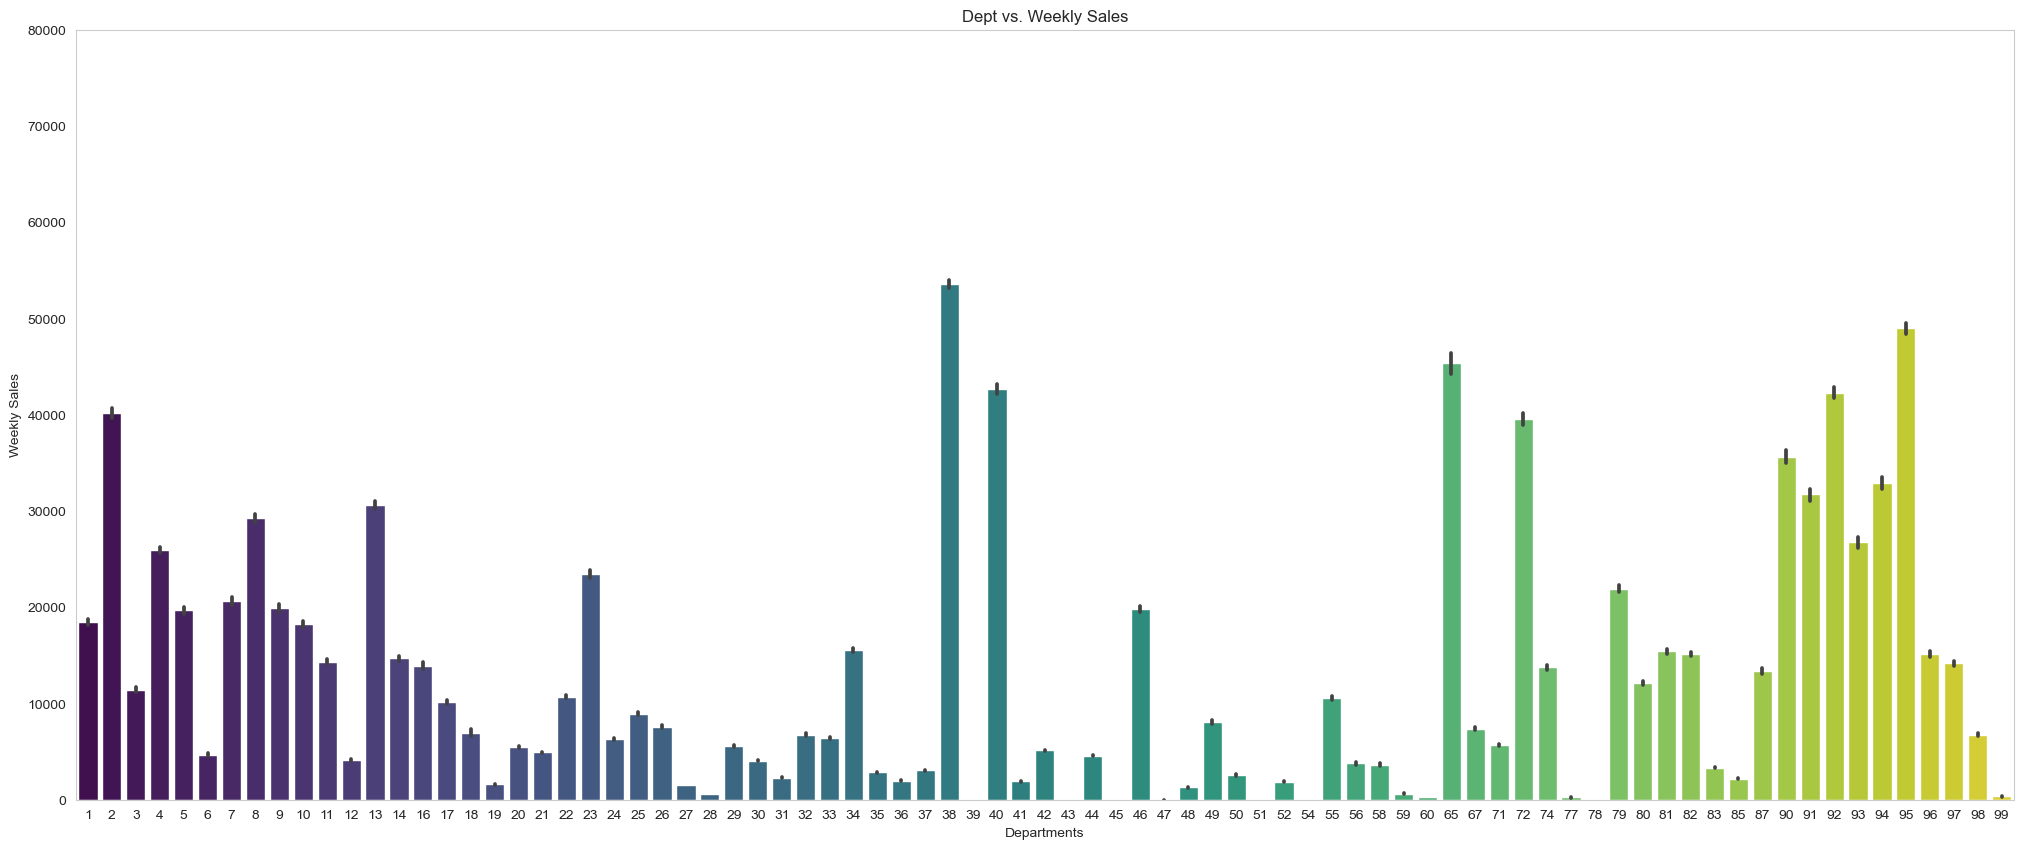

In [40]:
plt.figure(figsize = (25, 10))

sns.barplot(x = 'Dept', y = 'Weekly_Sales', data = data, palette = 'viridis')

plt.grid(False)
plt.title('Dept vs. Weekly Sales')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.ylim(0, 80_000);

It looks like department 38, 66 and 96 are the ones selling the most and the department 47, 78 and 39 are the ones selling less. Unfortunately I don't have the definition of each department and what it sells but I can see theres some valueble information here.

### Weekly_Sales vs. Type

In [41]:
# Unique values to choose a visualization chart

data['Type'].nunique()

3

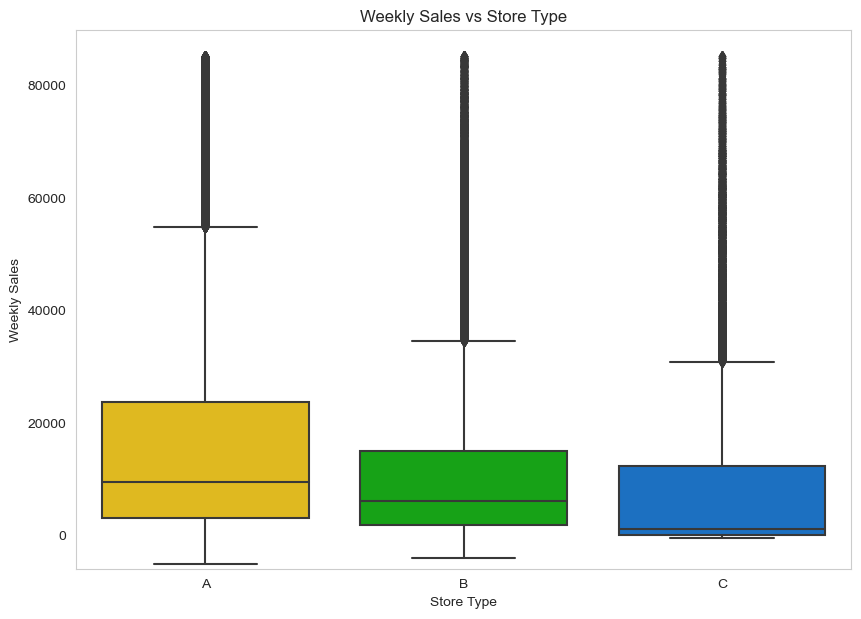

In [42]:
plt.figure(figsize = (10, 7))

sns.boxplot(x = 'Type', y = 'Weekly_Sales', data = data, palette = 'nipy_spectral_r')

plt.grid(False)
plt.title('Weekly Sales vs Store Type')
plt.ylabel('Weekly Sales')
plt.xlabel('Store Type')
plt.ylim(data['Weekly_Sales'].min() - 1000);

Mean sales are higher in Type A stores than Type B and C, this is probably because the count of stores. All of the stores type have outliers which is commom when dealing with timeseries because of holidays, offers, sales and advertising projects.

### Weekly_Sales vs. Size

In [43]:
# Unique values to choose a visualization chart

data['Size'].nunique()

40

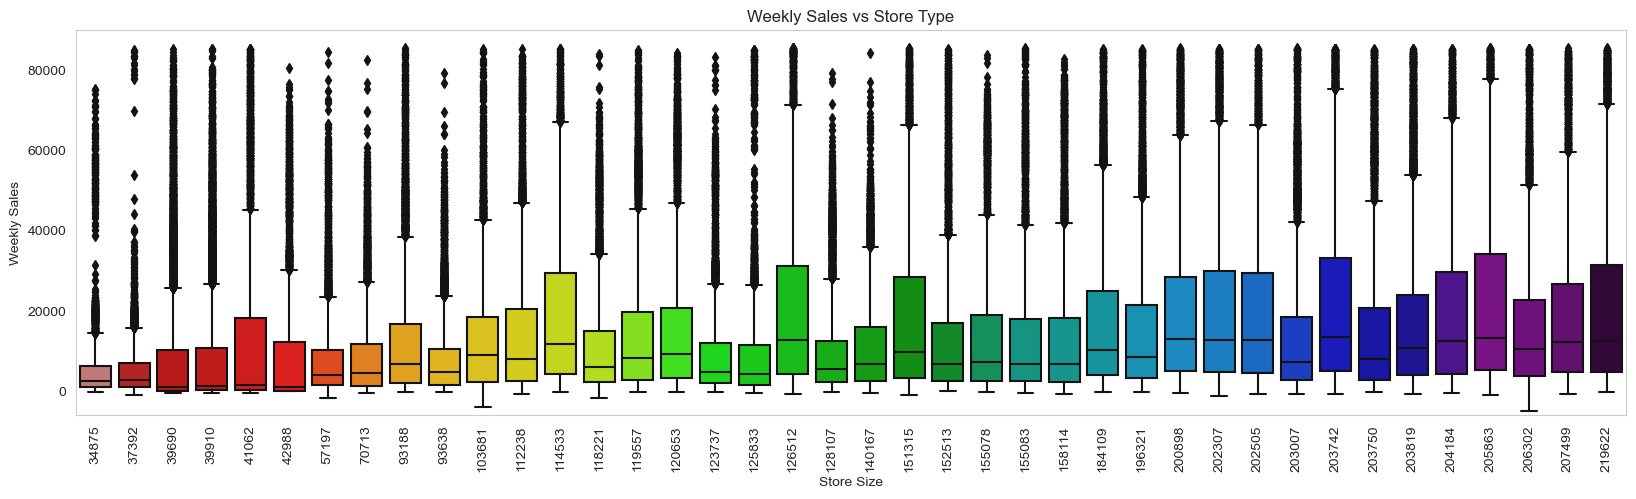

In [44]:
plt.figure(figsize = (20, 5))

sns.boxplot(x = 'Size', y = 'Weekly_Sales', data = data, palette = 'nipy_spectral_r')

plt.xticks(rotation = 90)
plt.grid(False)
plt.title('Weekly Sales vs Store Type')
plt.ylabel('Weekly Sales')
plt.xlabel('Store Size')
plt.ylim(data['Weekly_Sales'].min() - 1000);

After analysing the plot, I don't see any patterns that indicate that Store Size means more sales... But I can understand that the larger the Store the more departments and the more departments the better the type. So I will give that a look.

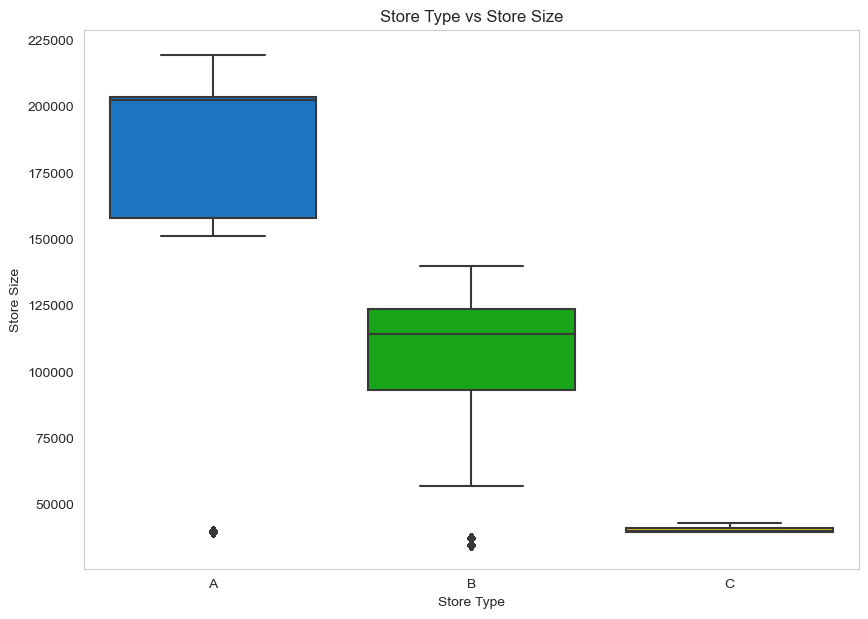

In [45]:
plt.figure(figsize = (10, 7))

sns.boxplot(x = 'Type', y = 'Size', data = data, palette = 'nipy_spectral')

plt.grid(False)
plt.title('Store Type vs Store Size')
plt.ylabel('Store Size')
plt.xlabel('Store Type');

Just as espected, Size might not determine the weekly sales but it determines the Store Type and Store Type can determine weekly sales.

### Weekly_Sales vs. Date
In order to analyse Sales by date I will need to transform our variable into pd.to_datatime().

In [46]:
data['Date'] = data['Date'].apply(pd.to_datetime)

Now I need to create 3 new columns, indicating day/month/year.

In [47]:
data['Day'] = data['Date'].apply(lambda date: date.day)
data['Week'] = data['Date'].apply(lambda date: date.week)
data['Month'] = data['Date'].apply(lambda date: date.month)
data['Year'] = data['Date'].apply(lambda date: date.year)

Now I can plot Weekly_Sales vs. Date

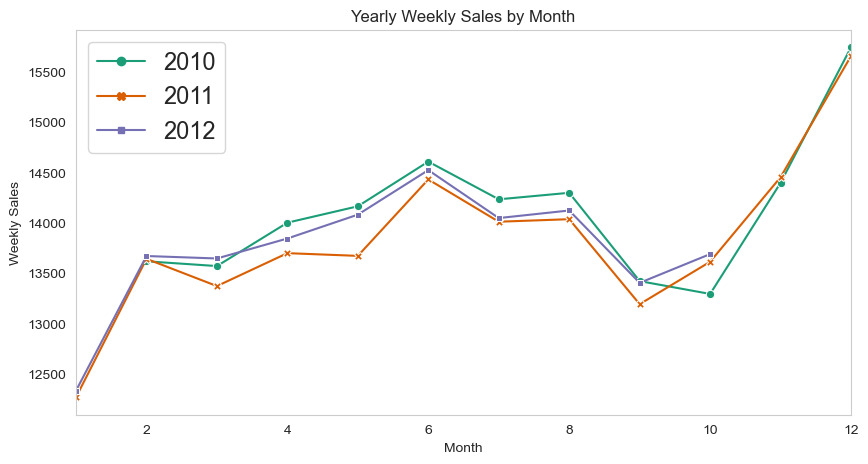

In [48]:
plt.figure(figsize = (10, 5))

sns.lineplot(x = 'Month', y = 'Weekly_Sales', data = data, hue = 'Year', ci = None, palette = 'Dark2', 
            markers = True, dashes = False, style = 'Year')

plt.xlim(data['Month'].min(), data['Month'].max())
plt.legend(loc = 2, prop = {'size' : 17}, fontsize = 30)
plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Yearly Weekly Sales by Month');

I can see Sales by Month really correlates and as expected the last months of the year are the ones with more sales, I can also see that 2011 had fewer sales than 2012 and 2010. 

Summer dates in USA also shows a peak for sales and then a slowly decrese. February also shows a little ramp up that is maintain through the entire year. It looks like september has a big drop. So I can confirm that seasons it's an important factor for Walmart sales...

This is a key factor to the project, because I was thinking of a regression to solve the problem. But as I can see from the sample of 3 consecutive years this is not a regression problem, this is a time series problem and it need to be solved with a time series model (ARIMA, SARIMA, STL, ES, ETS, VAR, LSTM, CNN, GBM and Random Forest)

For this reason I'll be setting the Date as Index and plot the differences between grouping by Week and Month and decide to keep one.

In [49]:
data.set_index('Date', inplace = True)

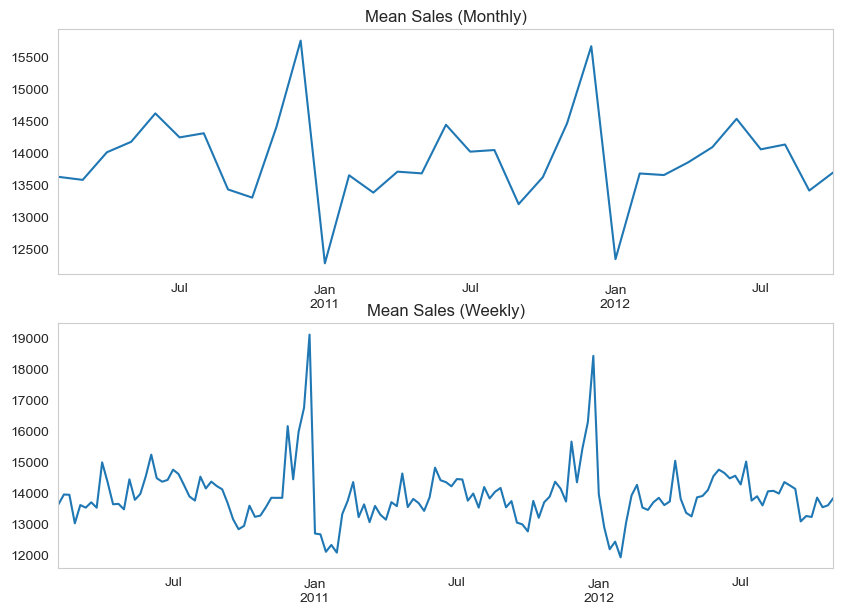

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 7), sharex = False)

data.resample('MS').mean()['Weekly_Sales'].plot(ax = ax1)
ax1.set_xlabel('')
ax1.set_title('Mean Sales (Monthly)')
ax1.grid(False)


data.resample('W').mean()['Weekly_Sales'].plot(ax = ax2)
ax2.set_xlabel('')
ax2.set_title('Mean Sales (Weekly)')
ax2.grid(False)

Since the submissions were done weekly I have decided to keep the weekly sample as my default one. Besides that In the montlhy chart I lose so much information that might be problem while creating a model. Weekly resample works for us.

Reesampling deletes our categorical data, so I need to Encode our Store Type variable now or I will lose it.

In [51]:
TypeDummies = pd.get_dummies(data['Type'], drop_first = True)

data[['TypeB', 'TypeC']] = TypeDummies

In [52]:
data.drop('Type', axis = 1, inplace = True)

For Type column I dropped the first instance because when B equals 0 and C equals 0 the only option available it's A, if I left the A column as dummie I am going to introduce multicollinearity in the data. 

After this transformation I can resample our data.

In [53]:
data = data.resample('W').mean()

In [54]:
# I'll add the Date column to the data again in case I need it in the future.

data['Date'] = data.index
data['Date'] = data['Date'].apply(pd.to_datetime)

I created a column with the day, I already confirm that month it's important but day may have some predicting value or is probably just the submission day (Since this is a weekly sales dataset) I'll give it a look. 

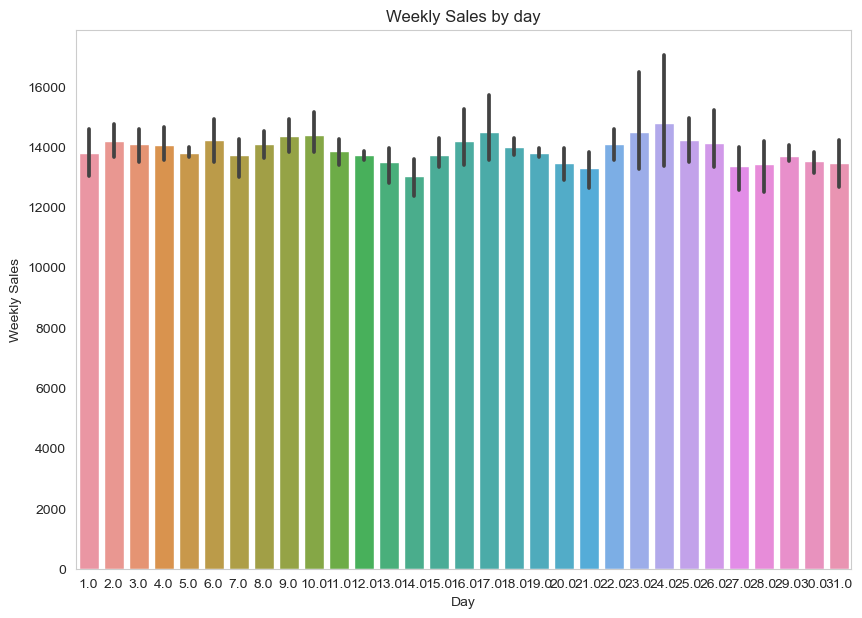

In [55]:
plt.figure(figsize = (10, 7))

sns.barplot(x = 'Day', y = 'Weekly_Sales', data = data)

plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by day');

The distribution by day it's pretty similar, so it does not affect the price. Why? probably all the entries were submitted by the end of the week, in a friday. I can check that by getting the dayofweek with pandas.

In [56]:
data['Day_Of_Week'] = data['Date'].apply(lambda date: date.dayofweek)

In [57]:
data['Day_Of_Week'].unique()

array([6], dtype=int64)

As I thought, all the submissions we're made on a friday. So I am not looking at the daily sales, I am looking at the weekly sales submited in a friday Nth of the month. Kind of obvius but is always good to check.

Now I am going to analyse mean sales by week, since this is a weekly time series data this is an important feature to explore.

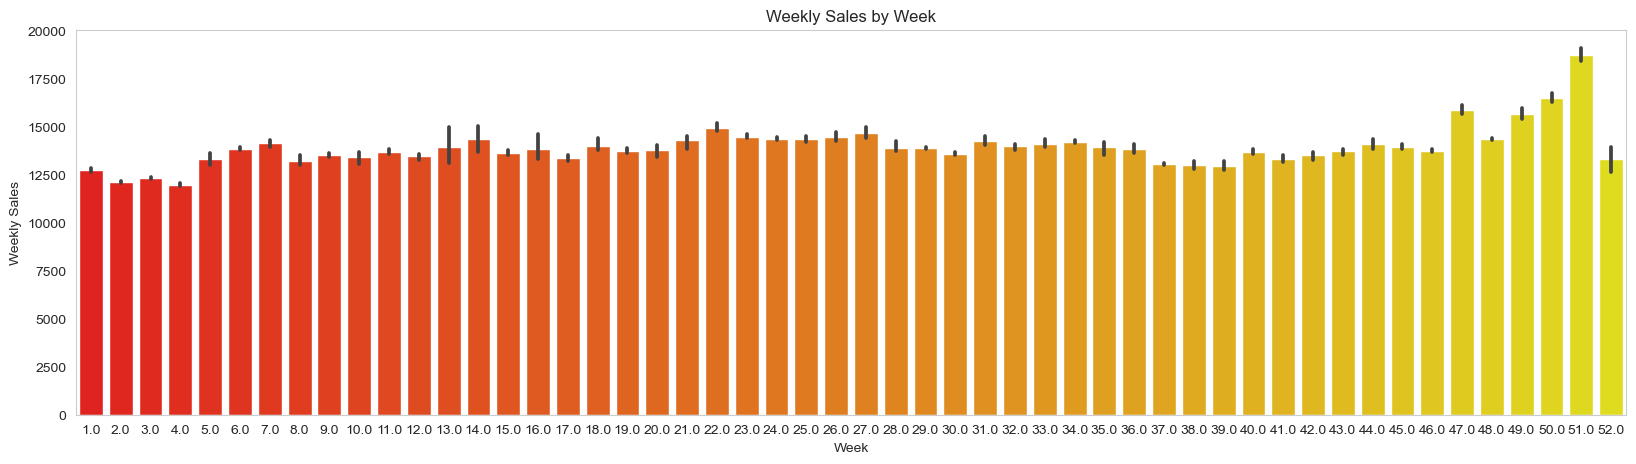

In [58]:
plt.figure(figsize = (20, 5))

sns.barplot(x = 'Week', y = 'Weekly_Sales', data = data, palette = 'autumn')

plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales by Week');

It looks like the week 51 have a peak and then in the last week a huge decrease. This is expected since people usually buy chrismas gifts a week prior to the Holiday. And the decrease may be due to being the last week of the year, where everyone has already purchased everything for the new years, and then the sales decreases.

I can say that I have very good variables for a time series model. I am gonna keep exploring the dataset.

### Weekly_Sales vs. IsHoliday

In [59]:
# Unique values to chose a visualization chart

data['IsHoliday'].nunique()

2

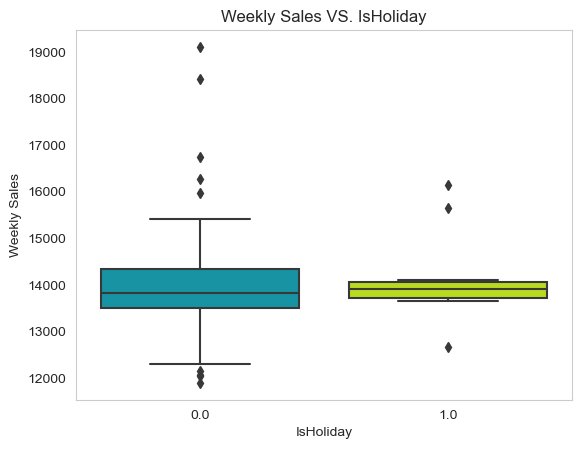

In [60]:
sns.boxplot(x = 'IsHoliday', y = 'Weekly_Sales', data = data, palette = 'nipy_spectral')

plt.grid(False)
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales VS. IsHoliday');

It looks like having a Holiday in that particular week does not affect the mean weekly sales. I will explore even more this feature in order to see if we have some value.

In [61]:
data[data['IsHoliday'] == True]['Date'].unique()

array(['2010-02-14T00:00:00.000000000', '2010-09-12T00:00:00.000000000',
       '2010-11-28T00:00:00.000000000', '2011-01-02T00:00:00.000000000',
       '2011-02-13T00:00:00.000000000', '2011-09-11T00:00:00.000000000',
       '2011-11-27T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-02-12T00:00:00.000000000', '2012-09-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

From the dates we can deduce that we have the next holidays: 

**Super Bowl**

2010-02-14, 2011-02-13, 2012-02-12  

**Labor day**

2010-09-12, 2011-09-11, 2012-09-09  

**Thanksgiving**

2010-11-28, 2011-11-27

**Christmas**

2011-01-02, 2012-01-01

I will create a new column indicating the holiday for that week in order to see if sales increment for that particular holiday. Since this is a large dataset it's gonna take a minute to be processed.

In [62]:
data['Super Bowl'] = data['Date'].apply(lambda date: True if date in [pd.to_datetime('2010-02-14'), 
                                                                     pd.to_datetime('2011-02-13'),
                                                                     pd.to_datetime('2012-02-12')] else False)

data['Labor day'] = data['Date'].apply(lambda date: True if date in [pd.to_datetime('2010-09-12'), 
                                                                     pd.to_datetime('2011-09-11'),
                                                                     pd.to_datetime('2012-09-09')] else False)

data['Thanksgiving'] = data['Date'].apply(lambda date: True if date in [pd.to_datetime('2010-11-28'), 
                                                                     pd.to_datetime('2011-11-27')] else False)

data['Christmas'] = data['Date'].apply(lambda date: True if date in [pd.to_datetime('2011-01-02'), 
                                                                     pd.to_datetime('2012-01-01')] else False)

Now I can plot and see if having a holiday in that particular week increase the weekly sales.

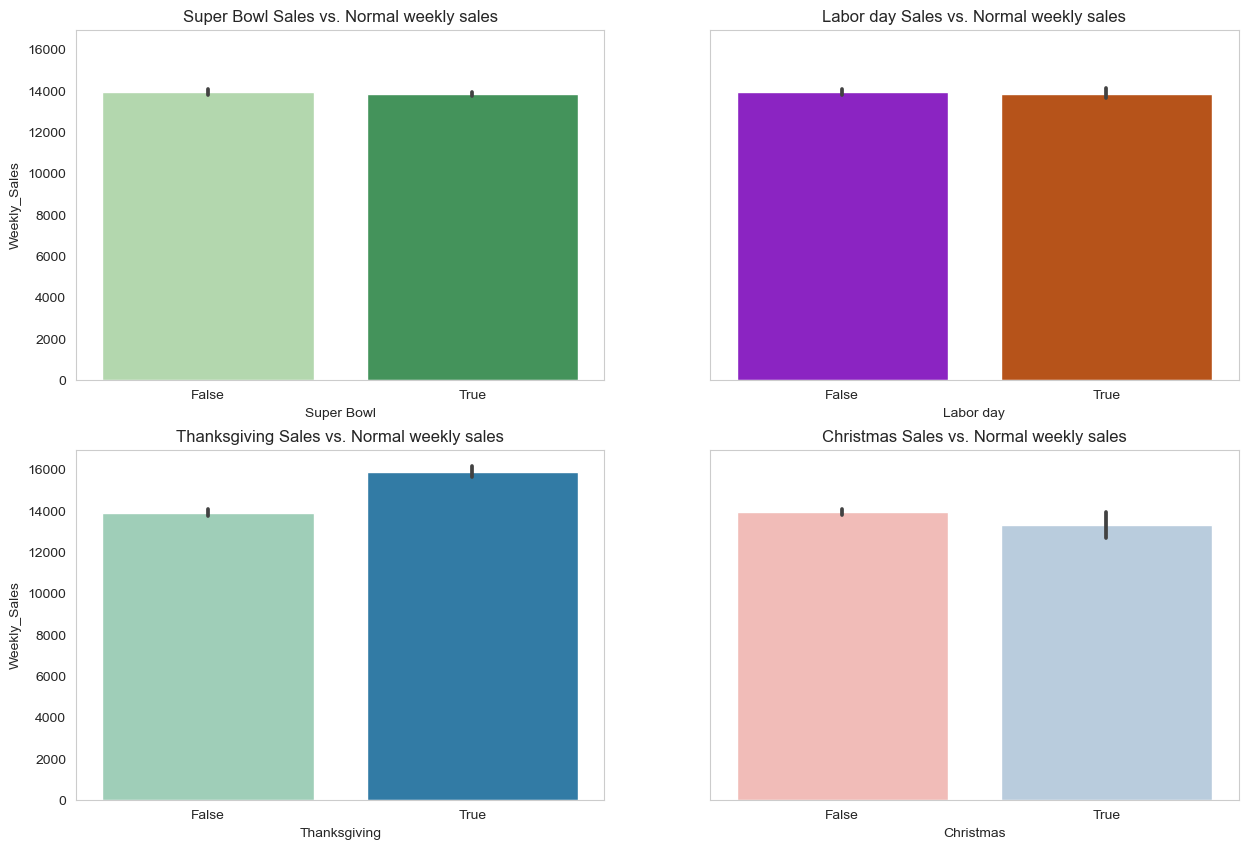

In [63]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, sharex = False, sharey = True, figsize = (15, 10))

# Super Bowl ------------------------------------------------------------

sns.barplot(x = 'Super Bowl', y = 'Weekly_Sales', data = data, ax = ax1, palette = 'Greens')

ax1.set_title('Super Bowl Sales vs. Normal weekly sales')
ax1.grid(False)

# Labor day ------------------------------------------------------------

sns.barplot(x = 'Labor day', y = 'Weekly_Sales', data = data, ax = ax2, palette = 'gnuplot')

ax2.set_title('Labor day Sales vs. Normal weekly sales')
ax2.set_ylabel('')
ax2.grid(False)

# Thanksgiving ------------------------------------------------------------

sns.barplot(x = 'Thanksgiving', y = 'Weekly_Sales', data = data, ax = ax3, palette = 'YlGnBu')

ax3.set_title('Thanksgiving Sales vs. Normal weekly sales')
ax3.grid(False)

# Christmas ------------------------------------------------------------

sns.barplot(x = 'Christmas', y = 'Weekly_Sales', data = data, ax = ax4, palette = 'Pastel1')

ax4.set_title('Christmas Sales vs. Normal weekly sales')
ax4.set_ylabel('')
ax4.grid(False);

There is not much diference but I can notice that in Thanksgiving sales tend to get higher and in Chrismas sales get a little lower. For the Super Bowl and Labor Day it's pretty much the same, since I created some value from this new columns I have decided to keep them and drop IsHoliday in the preprocessing section.

### Weekly_Sales vs. Temperature

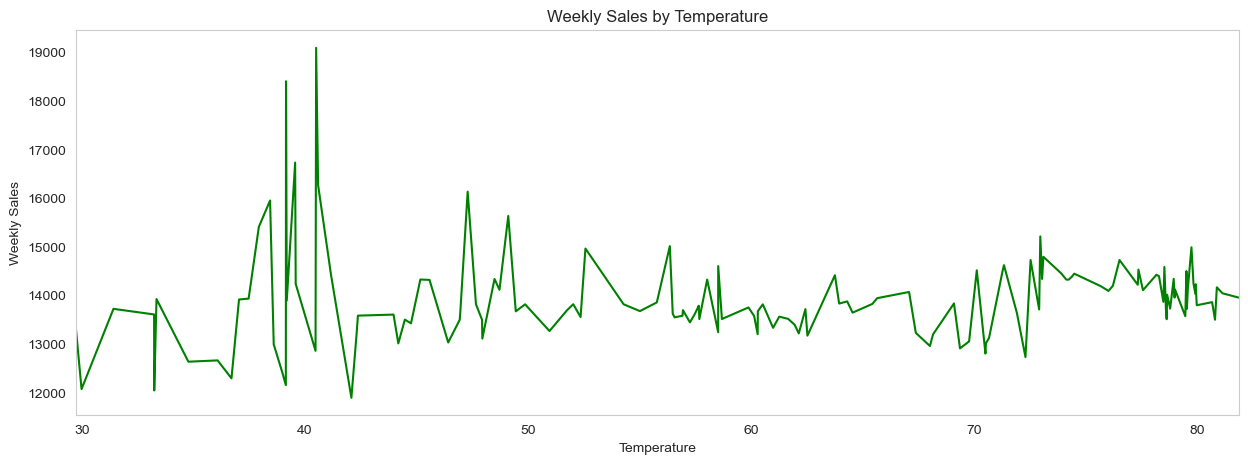

In [64]:
plt.figure(figsize = (15, 5))

sns.lineplot(y = 'Weekly_Sales', x = 'Temperature', data = data, ci = None, color = 'green')

plt.grid(False)
plt.title('Weekly Sales by Temperature')
plt.ylabel('Weekly Sales')
plt.xlim(data['Temperature'].min(), data['Temperature'].max());

This chart is far from interpretable, i will try to create a mean by rounded temperature and plot them. Why rounded? In order to reduce the noise in data it's a good technique to round values to 0 or 1 decimals. This will not change it's value but I might have to transform this variable in the preprocessing section.

In [65]:
ByTemperature = pd.DataFrame(round(data).groupby('Temperature').mean()['Weekly_Sales']).reset_index()

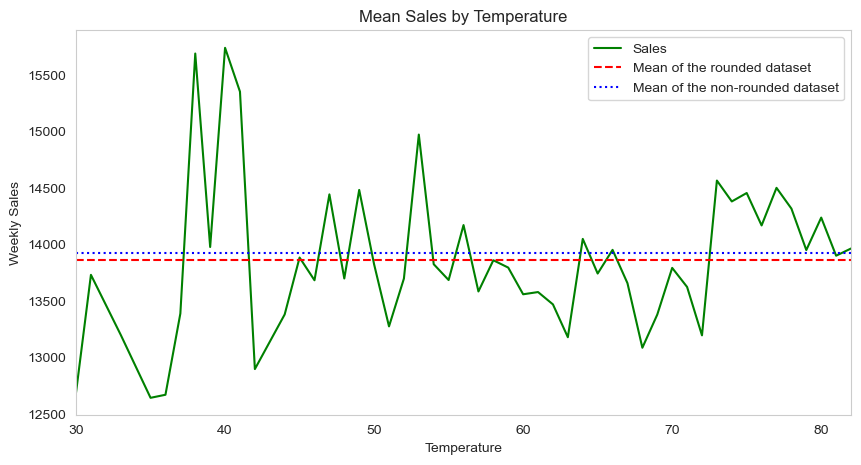

In [66]:
plt.figure(figsize = (10, 5))

sns.lineplot(data = ByTemperature, x = 'Temperature', y = 'Weekly_Sales', color = 'green', label = 'Sales')

plt.axhline(y = ByTemperature['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')

plt.legend()
plt.grid(False)
plt.xlim(ByTemperature['Temperature'].min(), ByTemperature['Temperature'].max())
plt.title('Mean Sales by Temperature')
plt.ylabel('Weekly Sales');

I ploted the Mean of the rounded dataset and the mean of the non-rounded dataset in order to see how much transformation I did by rounding the values, the more far apart the means the larger the transformation effect in the data. In this particular case I can see that I reduced the noise just a little, but since this is only for visualizing purposes I am safe to do that. 

Now I can clearly see that sales are less in temperatures from 30 to 35 and sales are higher in temperatures from 35 to around 40. There is a noticable patterns and peaks for Temperature, so could say that it's a valuable feature.

### Weekly_Sales vs. Fuel_Price

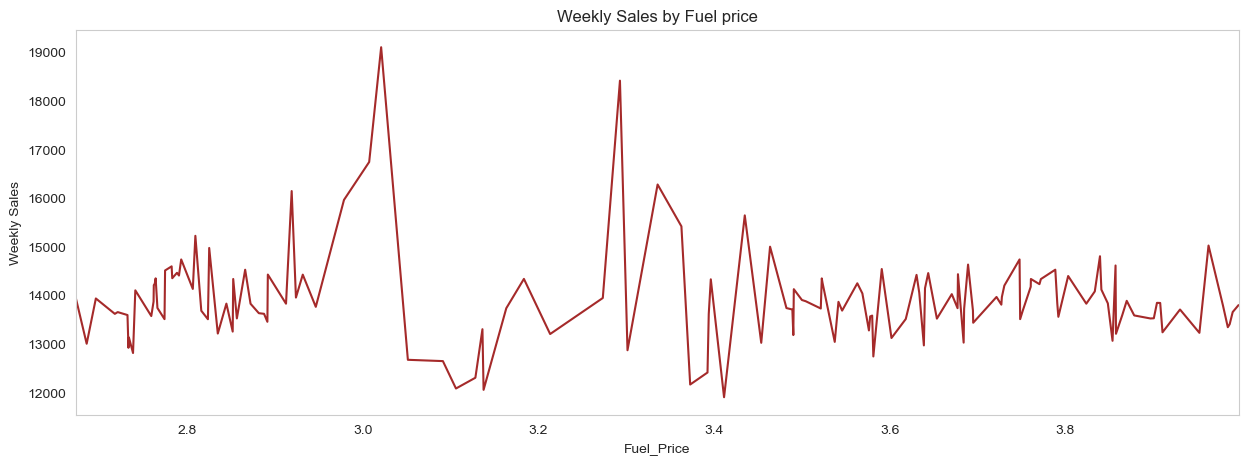

In [67]:
plt.figure(figsize = (15, 5))

sns.lineplot(x = 'Fuel_Price', y = 'Weekly_Sales', data = data, ci = None, color = 'brown')

plt.grid(False)
plt.title('Weekly Sales by Fuel price')
plt.ylabel('Weekly Sales')
plt.xlim(data['Fuel_Price'].min(), data['Fuel_Price'].max());

In order to analyse this feature I might have to get the mean of each fuel price, aplying the same method I used for Temperature. In this case I have to round to 1 decimal since fuel price usually ranges between 2 and 4 US Dollars (Lower changes).

In [68]:
ByFuelPrice = pd.DataFrame(round(data, 1).groupby('Fuel_Price').mean()['Weekly_Sales']).reset_index()

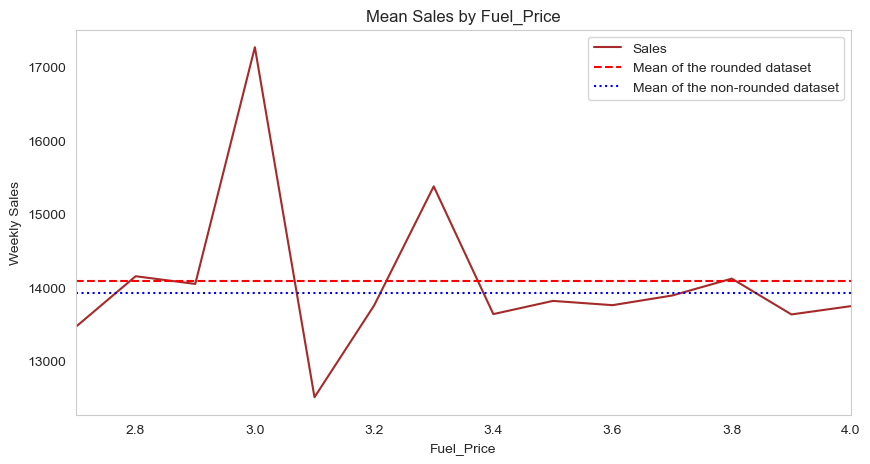

In [69]:
plt.figure(figsize = (10, 5))

sns.lineplot(data = ByFuelPrice, x = 'Fuel_Price', y = 'Weekly_Sales', color = 'brown', label = 'Sales')

plt.axhline(y = ByFuelPrice['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


plt.legend(loc = 'upper right')
plt.grid(False)
plt.xlim(ByFuelPrice['Fuel_Price'].min(), ByFuelPrice['Fuel_Price'].max())
plt.title('Mean Sales by Fuel_Price')
plt.ylabel('Weekly Sales');

For the fuel price I can see something similar to Temperature behavior. When fuel price is low there is not that many sales, then fuel increase with the sales increasing too and then when fuel price is high sales decreases. 

But why when the fuel price is at its lowest there no that many sales? I can really take into consideration many things to answer this question, something like Walmart competitors ofering delivery systems for cheaper or more people eating out and not buying that many food at local stores and many other factors... 

For the down in sales when fuel price is high, it's as expected. If fuel price is high, everything else is gonna get expensier, the more expensive the less sales in the store. 

Just like temperature, Fuel it's such a valuable feature to determine sales from Walmart. I might have to create the round transformation's I'll check that out in the preprocessing stage.

### Weekly_Sales vs. CPI

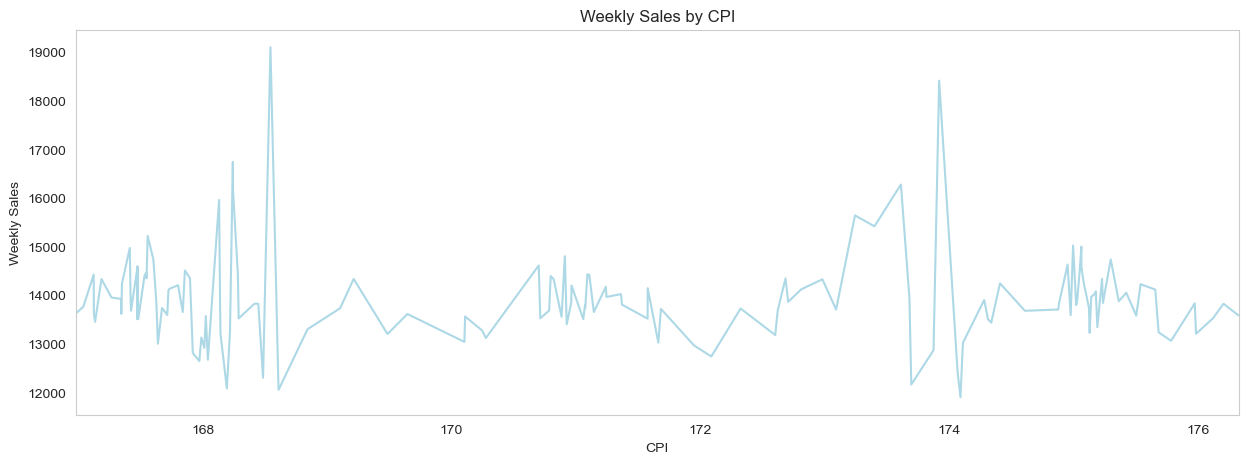

In [70]:
plt.figure(figsize = (15, 5))

sns.lineplot(x = 'CPI', y = 'Weekly_Sales', data = data, ci = None, color = 'lightblue')

plt.grid(False)
plt.title('Weekly Sales by CPI')
plt.ylabel('Weekly Sales')
plt.xlim(data['CPI'].min(), data['CPI'].max());

I can see some peaks at around 169 and 175, but it is hard to interpret. I am gonna use the round method to analyse it better.

In [71]:
ByCPI = pd.DataFrame(round(data).groupby('CPI').mean()['Weekly_Sales']).reset_index()

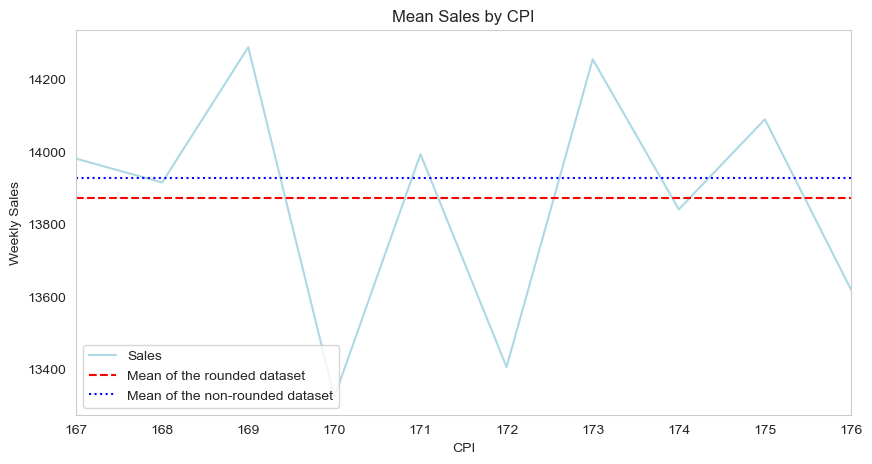

In [72]:
plt.figure(figsize = (10, 5))

sns.lineplot(data = ByCPI, x = 'CPI', y = 'Weekly_Sales', color = 'lightblue', label = 'Sales')

plt.axhline(y = ByCPI['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


plt.legend(loc = 'lower left')
plt.grid(False)
plt.xlim(ByCPI['CPI'].min(), ByCPI['CPI'].max())
plt.title('Mean Sales by CPI')
plt.ylabel('Weekly Sales');

With the rounded CPI it is possible to see more patterns, but in a smaller range (167 - 176). Even when I see some drops and peaks, the range it's so small that this might be no valueble at all. For the first version of the model, I'll keep the variable but in case I am not satisfied with the performance of the model I can try another model without CPI variable and see how it performs. For now I'll leave like that.

### Weekly_Sales vs. Unemployment

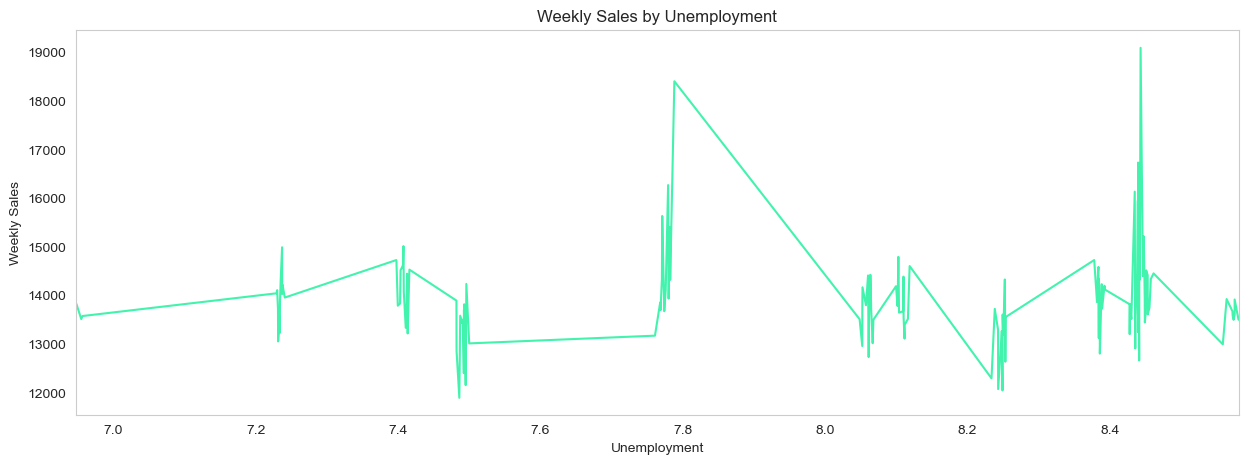

In [73]:
plt.figure(figsize = (15, 5))

sns.lineplot(x = 'Unemployment', y = 'Weekly_Sales', data = data, ci = None, color = '#42F3AD')

plt.grid(False)
plt.title('Weekly Sales by Unemployment')
plt.ylabel('Weekly Sales')
plt.xlim(data['Unemployment'].min(), data['Unemployment'].max());

I am gonna apply the same method to reduce the noise from the chart, this case have to be rounded to the first decimal.

In [74]:
ByUnemployment = pd.DataFrame(round(data, 2).groupby('Unemployment').mean()['Weekly_Sales']).reset_index()

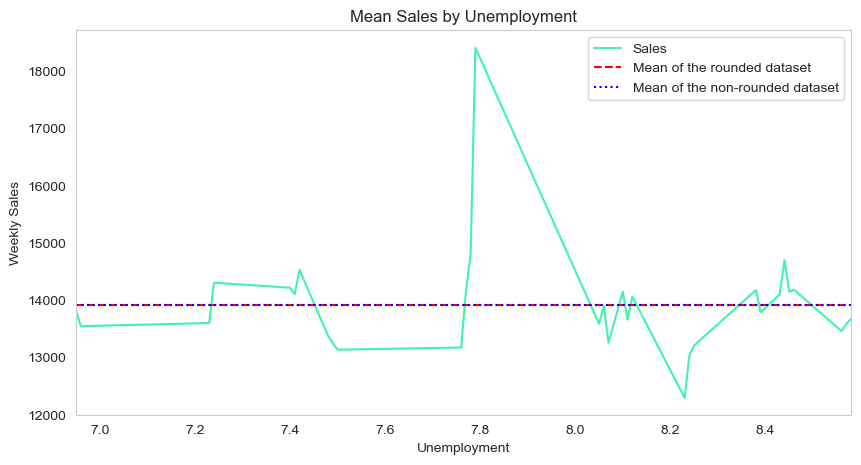

In [75]:
plt.figure(figsize = (10, 5))

sns.lineplot(data = ByUnemployment, x = 'Unemployment', y = 'Weekly_Sales', color = '#42F3AD', label = 'Sales')

plt.axhline(y = ByUnemployment['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

plt.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


plt.legend(loc = 'upper right')
plt.grid(False)
plt.xlim(ByUnemployment['Unemployment'].min(), ByUnemployment['Unemployment'].max())
plt.title('Mean Sales by Unemployment')
plt.ylabel('Weekly Sales');

The means pretty much the same, so I did not reduce that much noise from the cart. I can see a peak between 7.9 and 8.0, and a drop as it's get higher. It doesnt look that correlated with price but I can identify that peak pattern.

I might also need to look at the correlation with the rounded values. For now I can continue.

### Weekly_Sales vs. MarkDown's

Since I don't understand what markdowns value is, I am gonna plot them all together and try to find some predicting value.

In [76]:
# Unique values to choose a visualization chart

for number in '1 2 3 4 5'.split():

    print(f"{'MarkDown' + number} unique values: {data['MarkDown' + number].nunique()}")

MarkDown1 unique values: 52
MarkDown2 unique values: 49
MarkDown3 unique values: 52
MarkDown4 unique values: 52
MarkDown5 unique values: 52


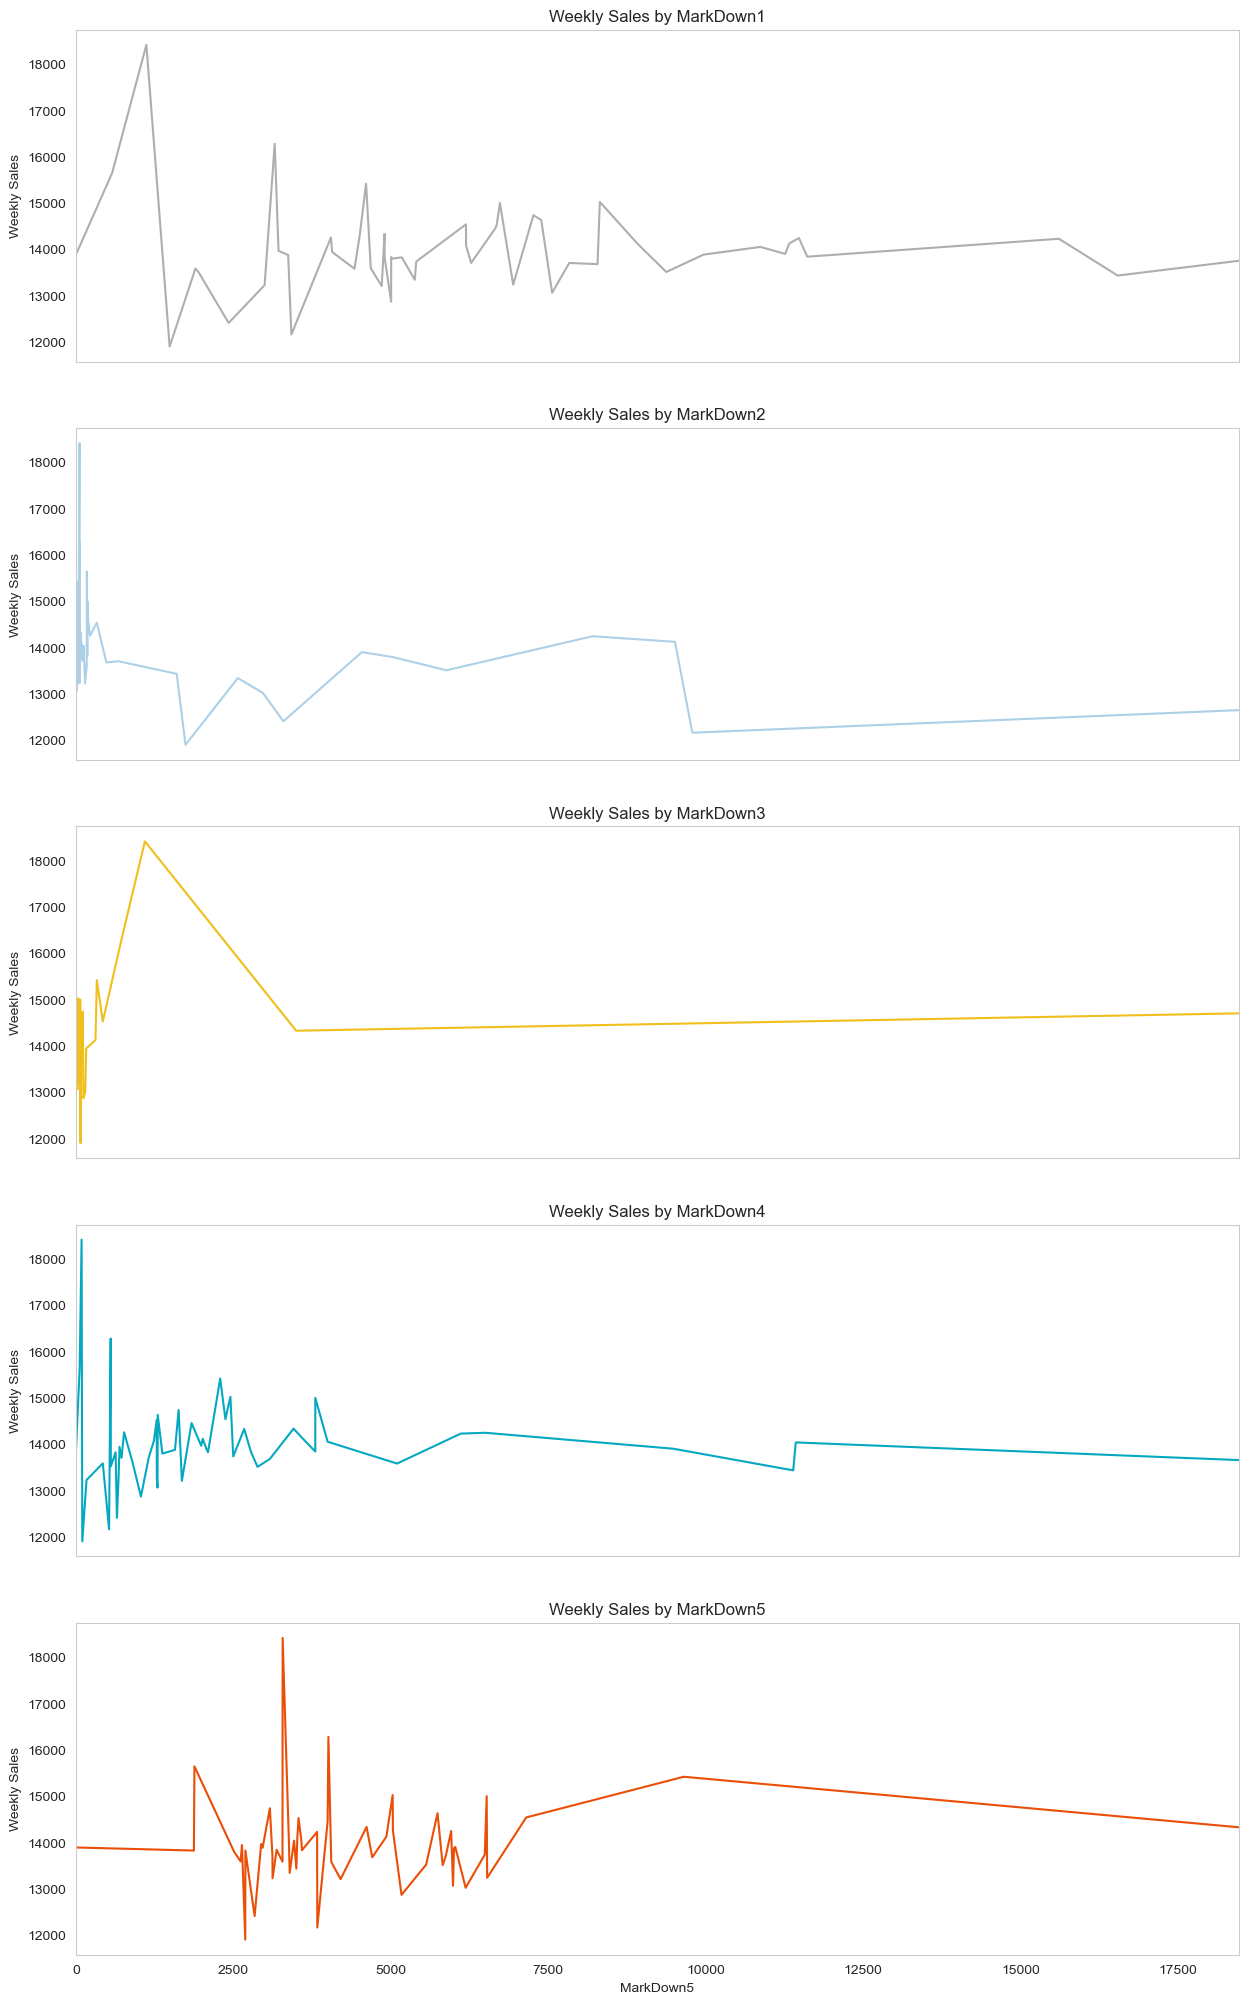

In [77]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5, ncols = 1, sharex = True, figsize = (15, 25))

# MarkDown1 ---------------------------------------------------------------------------------------------------------------


sns.lineplot(x = 'MarkDown1', y = 'Weekly_Sales', data = data, ci = None, color = '#B1ACB2', ax = ax1)

ax1.grid(False)
ax1.set_title('Weekly Sales by MarkDown1')
ax1.set_ylabel('Weekly Sales')
ax1.set_xlim(data['MarkDown1'].min(), data['MarkDown1'].max())

# MarkDown2 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown2', y = 'Weekly_Sales', data = data, ci = None, color = '#ADD0E9', ax = ax2)

ax2.grid(False)
ax2.set_title('Weekly Sales by MarkDown2')
ax2.set_ylabel('Weekly Sales')
ax2.set_xlim(data['MarkDown2'].min(), data['MarkDown2'].max())

# MarkDown3 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown3', y = 'Weekly_Sales', data = data, ci = None, color = '#F0BF1C', ax = ax3)

ax3.grid(False)
ax3.set_title('Weekly Sales by MarkDown3')
ax3.set_ylabel('Weekly Sales')
ax3.set_xlim(data['MarkDown3'].min(), data['MarkDown3'].max())

# MarkDown4 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown4', y = 'Weekly_Sales', data = data, ci = None, color = '#04A9C1', ax = ax4)

ax4.grid(False)
ax4.set_title('Weekly Sales by MarkDown4')
ax4.set_ylabel('Weekly Sales')
ax4.set_xlim(data['MarkDown4'].min(), data['MarkDown4'].max())

# MarkDown5 ---------------------------------------------------------------------------------------------------------------

sns.lineplot(x = 'MarkDown5', y = 'Weekly_Sales', data = data, ci = None, color = '#EA4E07', ax = ax5)

ax5.grid(False)
ax5.set_title('Weekly Sales by MarkDown5')
ax5.set_ylabel('Weekly Sales')
ax5.set_xlim(data['MarkDown5'].min(), data['MarkDown5'].max());

There is a lot of noise, I will apply the same method to try to reduce de noise of the feature.

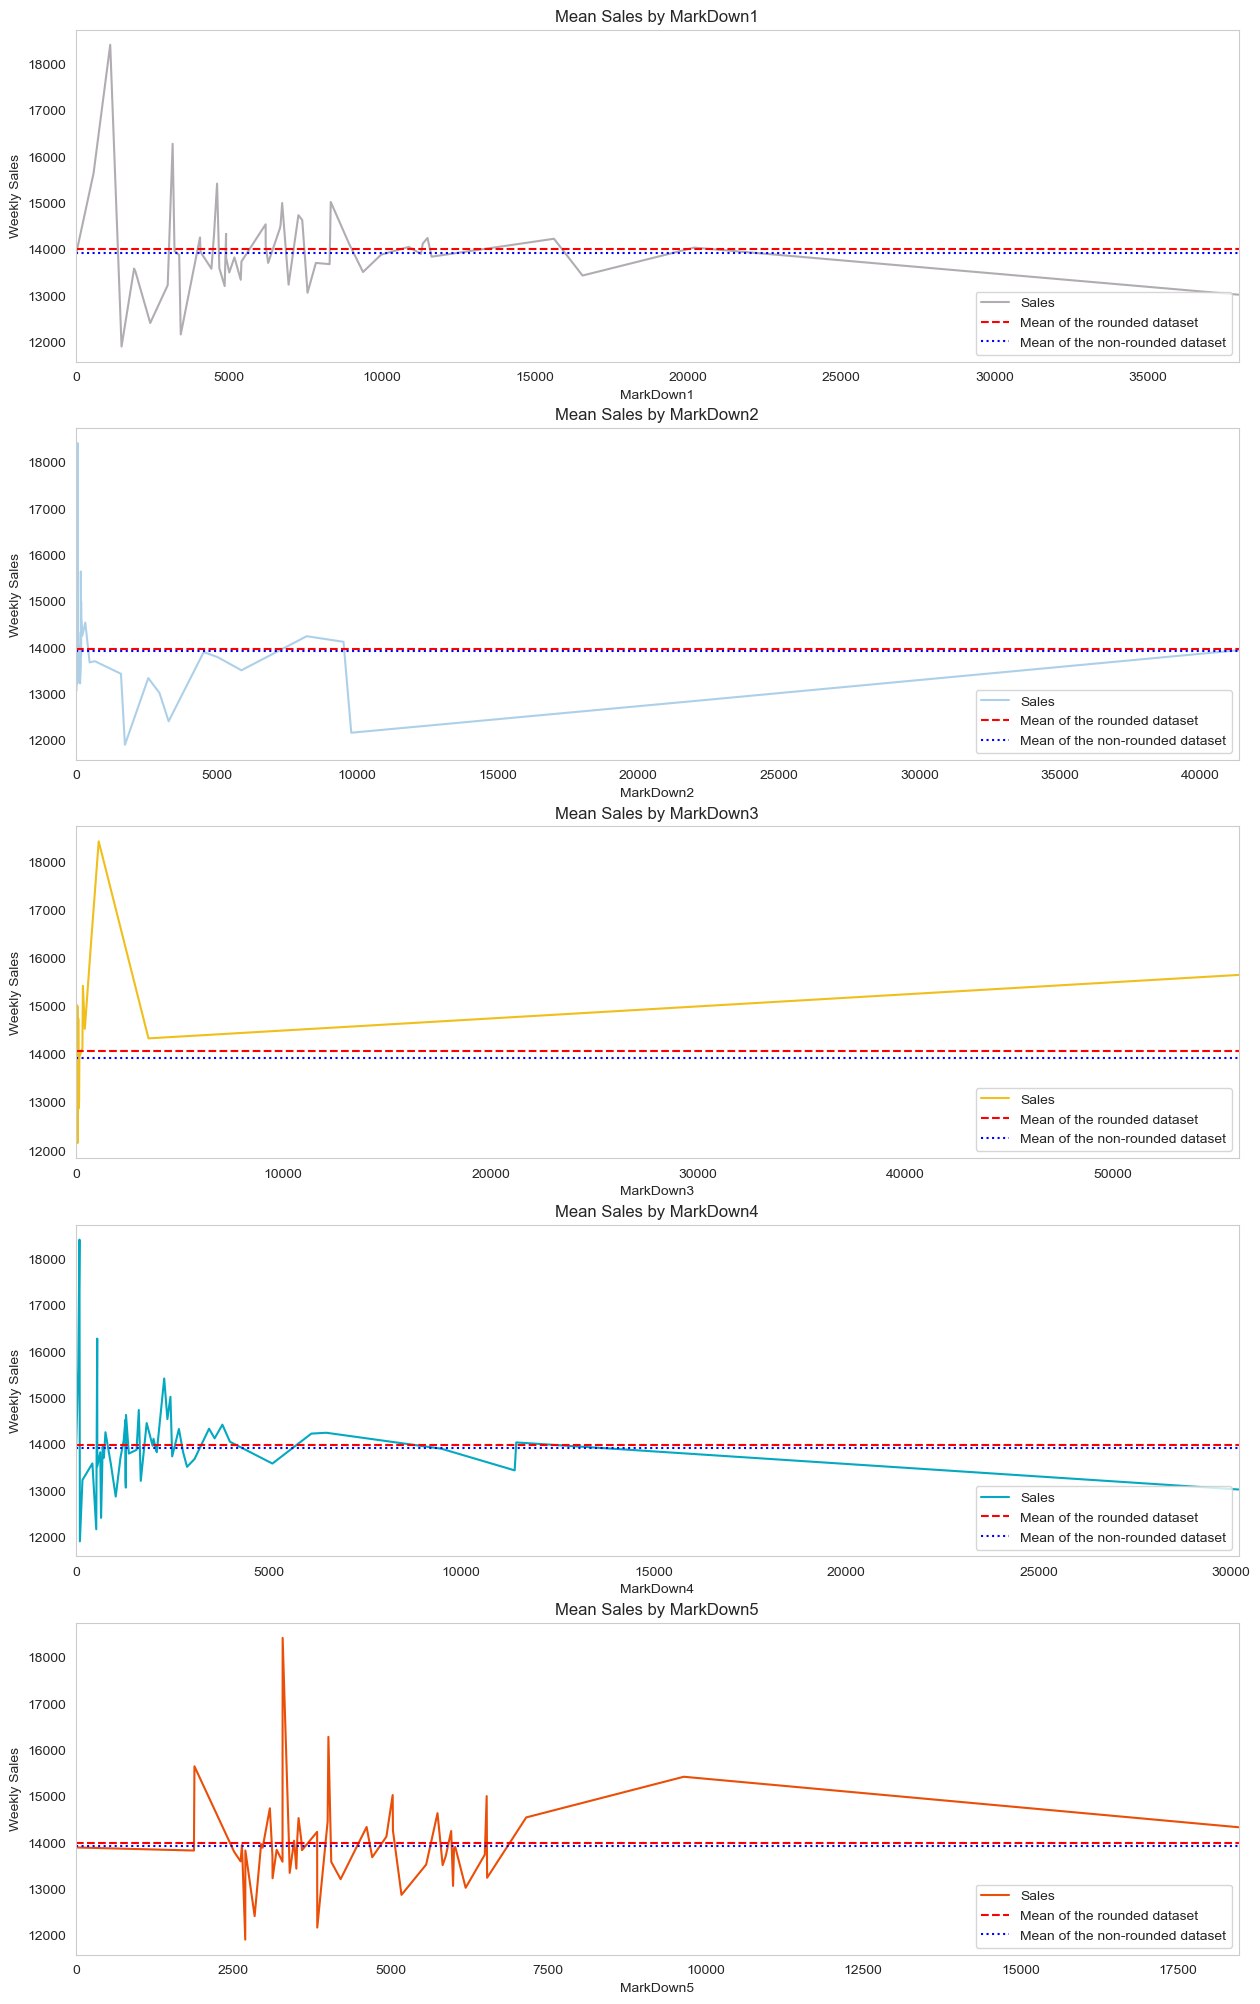

In [78]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5, ncols = 1, sharex = False, figsize = (15, 25))


# MarkDown1 ---------------------------------------------------------------------------------------------------------------


ByMarkDown1 = pd.DataFrame(round(data).groupby('MarkDown1').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown1, x = 'MarkDown1', y = 'Weekly_Sales', color = '#B1ACB2', label = 'Sales', ax = ax1)

ax1.axhline(y = ByMarkDown1['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax1.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax1.legend(loc = 'lower right')
ax1.grid(False)
ax1.set_xlim(ByMarkDown1['MarkDown1'].min(), ByMarkDown1['MarkDown1'].max())
ax1.set_title('Mean Sales by MarkDown1')
ax1.set_ylabel('Weekly Sales')


# MarkDown2 ---------------------------------------------------------------------------------------------------------------


ByMarkDown2 = pd.DataFrame(round(data).groupby('MarkDown2').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown2, x = 'MarkDown2', y = 'Weekly_Sales', color = '#ADD0E9', label = 'Sales', ax = ax2)

ax2.axhline(y = ByMarkDown2['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax2.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax2.legend(loc = 'lower right')
ax2.grid(False)
ax2.set_xlim(ByMarkDown2['MarkDown2'].min(), ByMarkDown2['MarkDown2'].max())
ax2.set_title('Mean Sales by MarkDown2')
ax2.set_ylabel('Weekly Sales')


# MarkDown3 ---------------------------------------------------------------------------------------------------------------


ByMarkDown3 = pd.DataFrame(round(data).groupby('MarkDown3').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown3, x = 'MarkDown3', y = 'Weekly_Sales', color = '#F0BF1C', label = 'Sales', ax = ax3)

ax3.axhline(y = ByMarkDown3['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax3.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax3.legend(loc = 'lower right')
ax3.grid(False)
ax3.set_xlim(ByMarkDown3['MarkDown3'].min(), ByMarkDown3['MarkDown3'].max())
ax3.set_title('Mean Sales by MarkDown3')
ax3.set_ylabel('Weekly Sales')


# MarkDown4---------------------------------------------------------------------------------------------------------------


ByMarkDown4 = pd.DataFrame(round(data).groupby('MarkDown4').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown4, x = 'MarkDown4', y = 'Weekly_Sales', color = '#04A9C1', label = 'Sales', ax = ax4)

ax4.axhline(y = ByMarkDown4['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax4.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax4.legend(loc = 'lower right')
ax4.grid(False)
ax4.set_xlim(ByMarkDown4['MarkDown4'].min(), ByMarkDown4['MarkDown4'].max())
ax4.set_title('Mean Sales by MarkDown4')
ax4.set_ylabel('Weekly Sales')


# MarkDown5 ---------------------------------------------------------------------------------------------------------------


ByMarkDown5 = pd.DataFrame(round(data).groupby('MarkDown5').mean()['Weekly_Sales']).reset_index()

sns.lineplot(data = ByMarkDown5, x = 'MarkDown5', y = 'Weekly_Sales', color = '#EA4E07', label = 'Sales', ax = ax5)

ax5.axhline(y = ByMarkDown5['Weekly_Sales'].mean(), color = 'r', linestyle = '--', 
            label = 'Mean of the rounded dataset')

ax5.axhline(y = data['Weekly_Sales'].mean(), color = 'b', linestyle = ':', 
            label = 'Mean of the non-rounded dataset')


ax5.legend(loc = 'lower right')
ax5.grid(False)
ax5.set_xlim(ByMarkDown5['MarkDown5'].min(), ByMarkDown5['MarkDown5'].max())
ax5.set_title('Mean Sales by MarkDown5')
ax5.set_ylabel('Weekly Sales');

It is really hard to make conclusions without knowing what the variable is. 

**MarkDown1:** The mean of the rounded dataset and the mean of the non-rounded dataset it's pretty much the same, this means that I could not reduce the noise and it's at its limit already. It is hard to notice patterns but I can see that mean sales raises with MarkDown 0 to 2000. After that it gets really messy and I have less observations.


**MarkDown2:** Most of the observations are 0.0, and I can see this affected the mean value of the feature. I notice a drop in 10000 and then a hard line to 40000 this is probably due to small portion of observations.


**MarkDown3:** The mean of the rounded dataset and the mean of the non-rounded dataset are far apart, this means that I reduced the noise too much. I can see a similar behavior to the MarkDown2 where most of the sample is 0.0 and then a hard line to max value due to little portion of observations.


**MarkDown4:** I notice something similar to the MarkDown1, where the mean increases as the markdown increases. In the higher MarkDowns there's no patterns, this is probably because there were not that many observations with those values.


**MarkDown5:** mean of the rounded dataset and the mean of the non-rounded are the same, so theres little to none modification with the noise reduce technique. I can see a peak in around 3000. Where the sales increase with the MarkDown value. In higher values there's no patterns, this is probably because of the same reason the MarkDown4 does not have patterns in high values. 

## Weekly_Sales vs. Features summary

In general from our features I can see some patterns that really explain our target, in columns like Fuel_Price and temperature I have presence of a lot of relationship for a time series model. I can see that our best performance features are gonna be month and department. And I saw that from the correlation heatmap, overall I have the tools to create a good perfoming model for this problem.

# Model, predict and solve the problem.

## Data preparation


### Drop unnecessary variables

In [79]:
data.drop('Store IsHoliday Day Day_Of_Week Date'.split(), axis = 1, inplace = True)

####  Reasons to drop:

**Store:** It's just the ID identifying each store submission. It has no predicting value and I don't need to to train a model.


**IsHoliday:** I have also modify and created 4 new columns from this feature, in order to get rid of multicollinearity I am dropping it.


**Day:** It's just the day of submission, data were submitted on the fridays so there is no predicting value from this. 
 

**Day_Of_Week:** Variable telling the day of week of Day column. It was created just for visualization purposes so I can drop it.

**Date:** I have already engineered Date into Week, Month and Year. So the complete Date is not necessary

### Variable Encoding

I am gonna encode those categorical variables (Holidays columns) in order to fit them into the model. I am leaving Dept and Size out of this because Size mean actually tells us something and Dept has too many colums to convert to dummies.

In [80]:
# Holiday columns

for feature in ['Super Bowl', 'Labor day','Thanksgiving', 'Christmas']:
    
    data[feature] = data[feature].apply(lambda value: 1 if value else 0)

For the Holiday columns, when every column is 0 it means that its a normal day so I am not introducing multicollinearity into our data.

### Negative submissions

Since our goals is predicting the total sales for a determined period of time, having negative weeks will not help our model. I do understand that week without profit can happend, but in this project I am looking an a major overall performance. I am going to explore how many week have a performance under 0 profit and decide if deleting those rows or no.

In [81]:
data[data['Weekly_Sales'] <= 0].count()[0]

0

Luckily, with the resampling transformation we got rid of the negative submissions and I can train our model with the current data.

### Predictors last chance

In this subsection I am going to give a second look to all the variables
after the encoding and delete all of those with high correlation in order to avoid multicollinearity and also delete those with little to none correlation to improve the model performance.

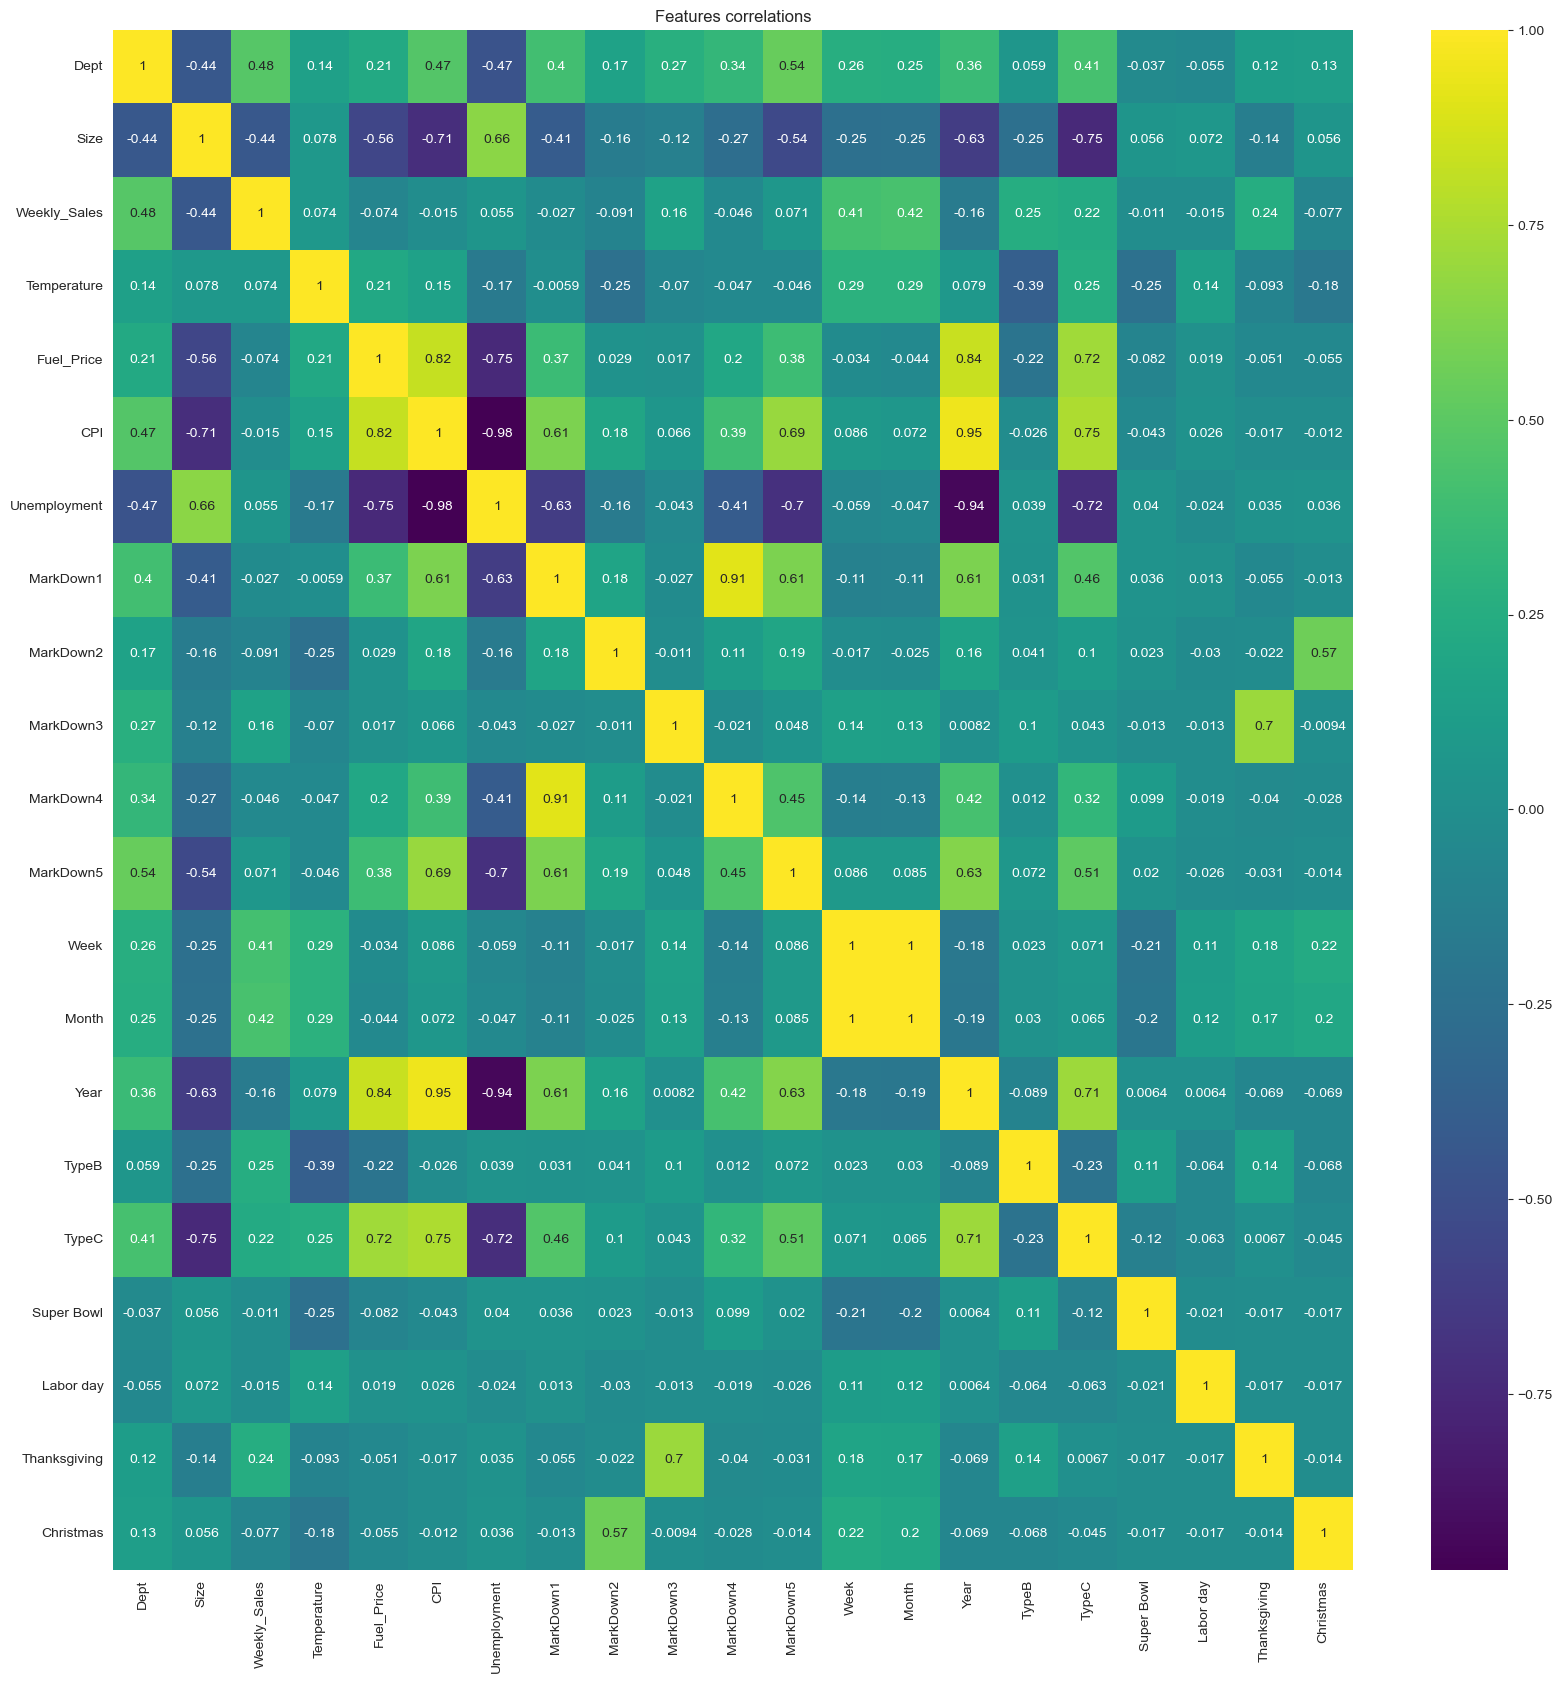

In [82]:
plt.figure(figsize = (20, 20))

sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

plt.title('Features correlations');

MarkDown4 and MarkDown5 have a large correlation with MarkDown1. This can cause multicollinearity in our model. I am going to drop these columns. After that we can see some negative correlation between Weekly_Sales and Size/Fuel_Price. I have chosen to keep these variables for the first version of the model and In the case of not satisfaction or bad performance I could try to remove them in the second version.

In [83]:
data = data.drop('MarkDown4 MarkDown5'.split(), axis = 1)

In [84]:
pd.DataFrame(data.corr()['Weekly_Sales'][1:].sort_values(ascending = False))

Weekly_Sales
Weekly_Sales      1.000000
Month             0.421775
Week              0.410959
TypeB             0.245292
Thanksgiving      0.244516
TypeC             0.223360
MarkDown3         0.163233
Temperature       0.074057
Unemployment      0.055350
Super Bowl       -0.010969
Labor day        -0.014975
CPI              -0.015075
MarkDown1        -0.027395
Fuel_Price       -0.074433
Christmas        -0.077154
MarkDown2        -0.090696
Year             -0.160503
Size             -0.438051

As expected from a time series problem, Month and Week are among the best predictors for our weekly sales and it looks like Size its one of the worsts. 

Since this is the first version of the project, I am going to keep all the variables and try luck. For improvment purposes I'll try removing some of them in case we need to.

### Re-organized features

In [85]:
data.columns

Index(['Dept', 'Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'Week', 'Month',
       'Year', 'TypeB', 'TypeC', 'Super Bowl', 'Labor day', 'Thanksgiving',
       'Christmas'],
      dtype='object')

In [86]:
cols = ['Weekly_Sales', 'Dept', 'Size', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Week', 'Month', 'Year', 'Super Bowl', 'Labor day', 'Thanksgiving', 'Christmas',
       'TypeB', 'TypeC', 'MarkDown1', 'MarkDown2', 'MarkDown3']

data = data[cols]

## Time Series Assumptions



### Multicollinearity
In order to check if or data has or I have introduced multicollinearity to our model I am gonna use the VIF. The VIF estimates how much the variance of a coefficient is “inflated” because of linear dependence with other predictors.

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Size', 'Temperature', 'Fuel_Price', 'CPI', 
                          'Unemployment','MarkDown1', 'MarkDown2', 'MarkDown3']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, featurelen) for featurelen in range(variables.shape[1])]

vif["features"] = variables.columns

vif.round(2).sort_values(by = 'VIF', ascending = False)

VIF      features
0  58774.08          Size
3  37933.20           CPI
4   3784.25  Unemployment
2    221.13    Fuel_Price
1     20.18   Temperature
5      2.26     MarkDown1
6      1.21     MarkDown2
7      1.06     MarkDown3

There is a lot of discussion about when to safely ignore multicollinearity, for this particular case I'll be using Dr. Paul Allison approach for this problem. I would like you to read his post in [statisticalhorizons](https://statisticalhorizons.com/multicollinearity/).

For our data, fortunately I have not introduced multicollinearity with the engineered features but it looks like Fuel_Price, Unemployment,  CPI and Size has a large VIF Value. Multicollinearity it’s only a problem for the variables that are collinear. It increases the standard errors of their coefficients, and it may make those coefficients unstable in several ways. But so long as the collinear variables are only used as control variables, and they are not collinear with your variables of interest, there’s no problem. The coefficients of the variables of interest are not affected, and the performance of the control variables as controls is not impaired.

In our particular case, I have decided to keep the Fuel_Price feature for training purposes and delete Size, CPI and Unemployment. If the model is not performing as good as we expected or we have overfitting, deleting Fuel_Price might be a good approach for solving this problem.

In [88]:
data.drop(['Size', 'CPI', 'Unemployment'], axis = 1, inplace = True)

### Stationary
Before applying any statistical model on a time series, I want to ensure it’s stationary. This means that the mean, variance (Homoscedasticity) and covariance of the series should not be a function of time.

I have 3 statistic tools to identify if our timeseries it's stationary or not:

- **Rolling Statistics:** Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).


- **Augmented Dickey-Fuller Test:** The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics


- **KPSS Test:** Kwiatkowski–Phillips–Schmidt–Shin (KPSS) tests are used for testing a null hypothesis that an observable time series is stationary around a deterministic trend (i.e. trend-stationary) against the alternative of a unit root.


#### Rolling Statistics

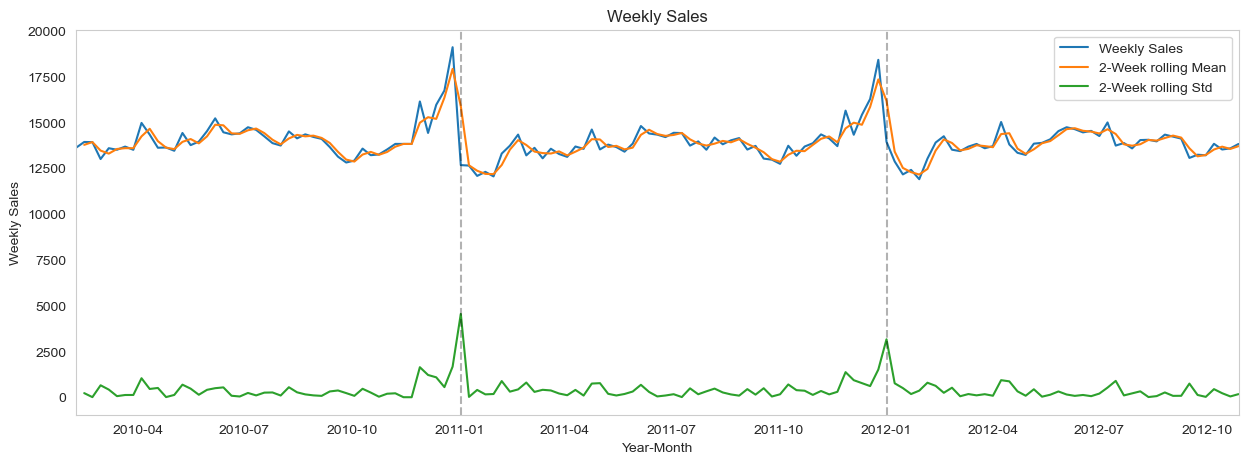

In [89]:
plt.figure(figsize = (15, 5))

plt.plot(data['Weekly_Sales'], label = 'Weekly Sales')

plt.plot(data['Weekly_Sales'].rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(data['Weekly_Sales'].rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = data[data['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = data[data['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(data[data['Year'] == 2010].index[0], data[data['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales');

I can clearly see that our data is not stationary, I am gonna create an adfuller test just to be sure about it.

#### Augmented Dickey-Fuller Test

In [90]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Weekly_Sales'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():
    
    print(f'\t{key}: {value}')

ADF Statistic: -4.9195058805332845
p-value: 0.0
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


There's many ways of interpreting this test. Since the null hypothesis assumes the presence of unit root, that is α = 1, the p-value obtained should be less than the significance level in order to reject the null hypothesis. Thereby, inferring that the series is not stationary. 

Also as the ADF test statics is lesser (more negative) then the critical value becomes the reason to reject the null hypothesis. This indicates that the data is stationary, I'm still not satisfied with this conclusion.

I am going to run an KPSS Test to understand a little more.

#### Kwiatkowski Phillips Schmidt Shin Test

In [91]:
from statsmodels.tsa.stattools import kpss

result = kpss(data['Weekly_Sales'], regression = "ct")

print(f'Test Statistic: {result[0]}' )
print(f'p-value: {result[1]}')
print('Critical values:')

for key, value in result[3].items():
    
     print(f'\t{key}: {value}')

Test Statistic: 0.025338514113601465
p-value: 0.1
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


From the KPPS test I can see that the test statistic is less than the critical values, with that result we cannot reject the null hypothesis, this indicates that the data is stationary. KPSS is a good indicator but I am not satisfied with this conclusion either, I will modify the data until ADF is satisfied (Lowered).

I can modify our data in order to make it stationary, to do that first we need to understand the trend by descomposing it. 

For this part of the project I'll be following [Songhao Wu Medium publication](https://towardsdatascience.com/stationarity-assumption-in-time-series-data-67ec93d0f2f). 



#### Data descomposition

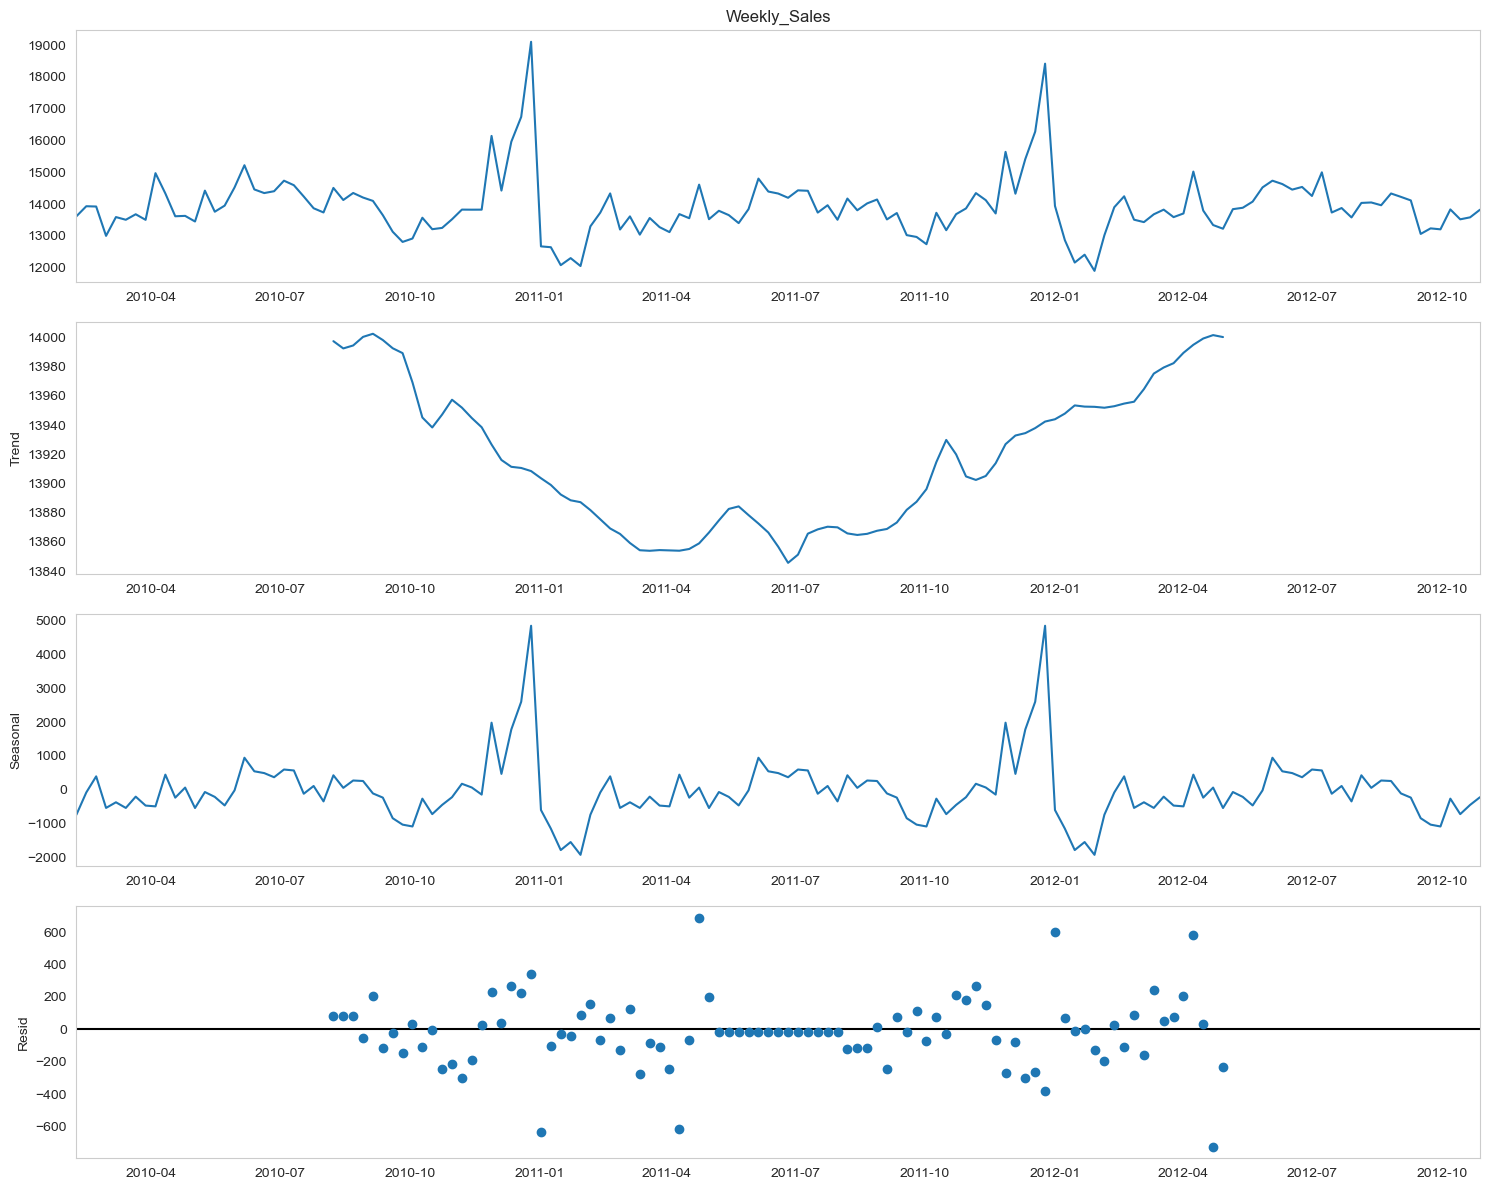

In [92]:
import statsmodels.api as sm

from pylab import rcParams

rcParams['figure.figsize'] = 15, 12

rcParams['axes.grid'] = False

decomposition = sm.tsa.seasonal_decompose(data['Weekly_Sales'], model='additive')

fig = decomposition.plot()

In order to modify our data and made stationary I could apply different methods:

- First differencing
- Second differencing
- Data Shift
- Data Natural Log
- Data Square Root
- Data Cube Root
- Proportional change

The most common one is differencing. I'll start from there and then run all the test until I got stationary data.

### Non-stationary Data First Differencing

In [93]:
# Modifying the data.

FirstDiff = data['Weekly_Sales'].diff().dropna()

#### First Differencing Rolling Statistics

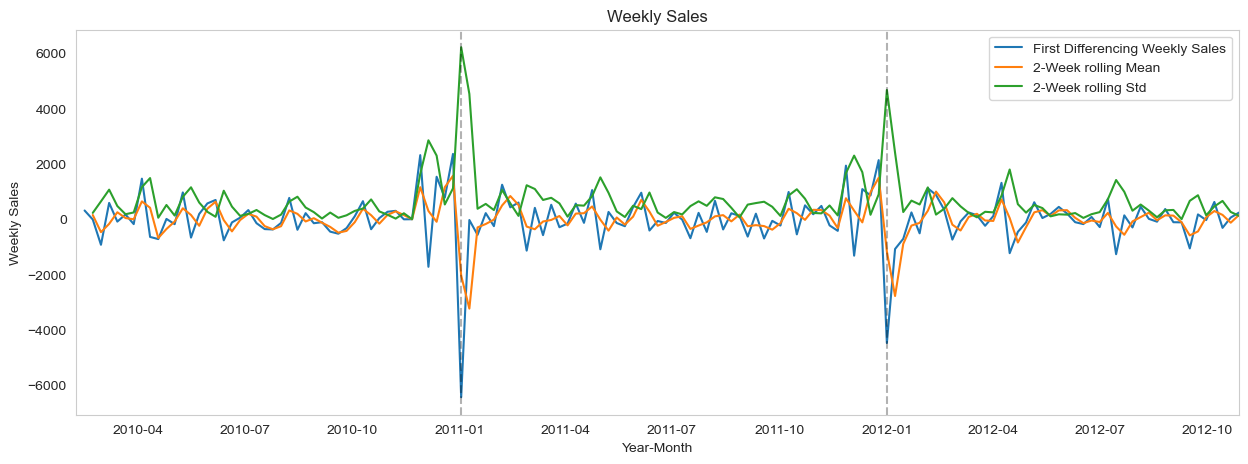

In [94]:
plt.figure(figsize = (15, 5))

plt.plot(FirstDiff, label = 'First Differencing Weekly Sales')

plt.plot(FirstDiff.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(FirstDiff.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = data[data['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = data[data['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(data[data['Year'] == 2010].index[0], data[data['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales');

#### First Differencing Augmented Dickey-Fuller Test

In [95]:
result = adfuller(FirstDiff)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -8.445535686657784
p-value: 0.0
Critical Values:
	1%: -3.4793722137854926
	5%: -2.8830370378332995
	10%: -2.578233635380623


### Non-stationary Data shift

In [96]:
# Modifying the data.

DataShift = data['Weekly_Sales'].shift().dropna()

#### Shift Rolling Statistics

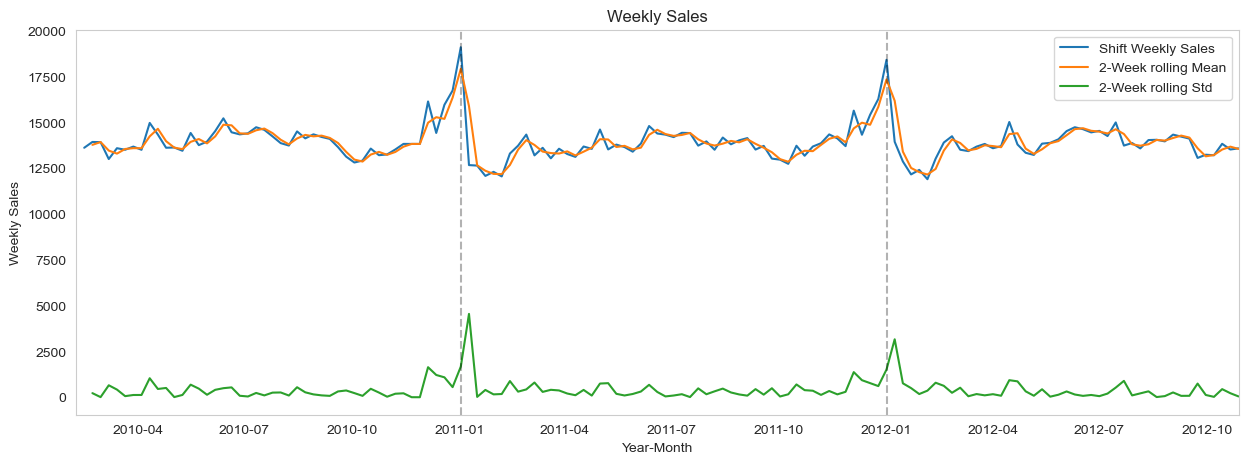

In [97]:
plt.figure(figsize = (15, 5))

plt.plot(DataShift, label = 'Shift Weekly Sales')

plt.plot(DataShift.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(DataShift.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = data[data['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = data[data['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(data[data['Year'] == 2010].index[0], data[data['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales');

#### Shift Augmented Dickey-Fuller Test

In [98]:
result = adfuller(DataShift)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.893115147806722
p-value: 0.0
Critical Values:
	1%: -3.4808880719210005
	5%: -2.8836966192225284
	10%: -2.5785857598714417


### Non-stationary Data natural log

In [99]:
# Modifying the data.

DataLog = np.log(data['Weekly_Sales']).dropna()

#### Natural log Rolling Statistics

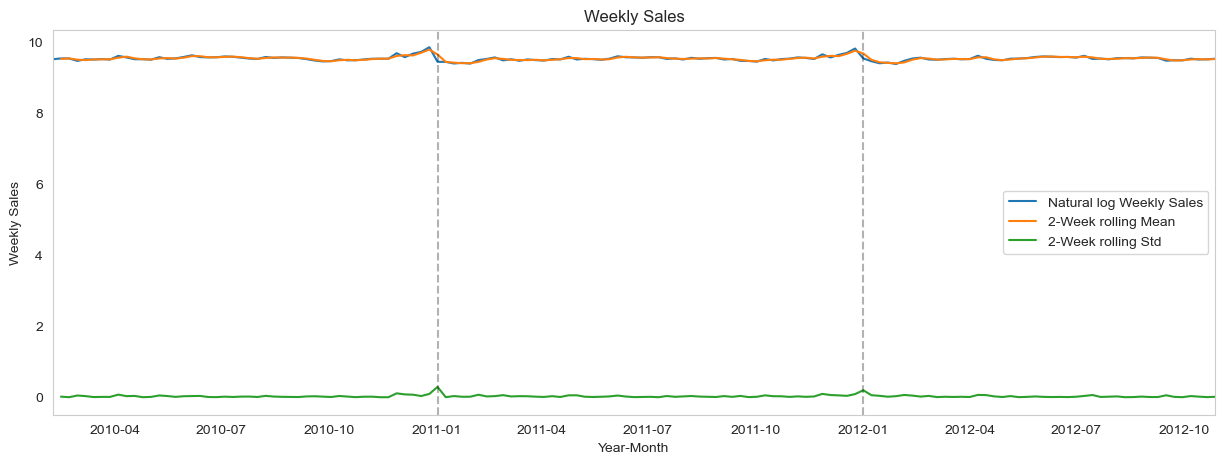

In [100]:
plt.figure(figsize = (15, 5))

plt.plot(DataLog, label = 'Natural log Weekly Sales')

plt.plot(DataLog.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(DataLog.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = data[data['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = data[data['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(data[data['Year'] == 2010].index[0], data[data['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales');

#### Natural log Augmented Dickey-Fuller Test

In [101]:
result = adfuller(DataLog)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1], 4)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.953897894467807
p-value: 0.0
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


### Non-stationary Data natural log1p

In [102]:
# Modifying the data.

DataLog1p = np.log1p(data['Weekly_Sales']).dropna()

#### Natural log1p Rolling Statistics

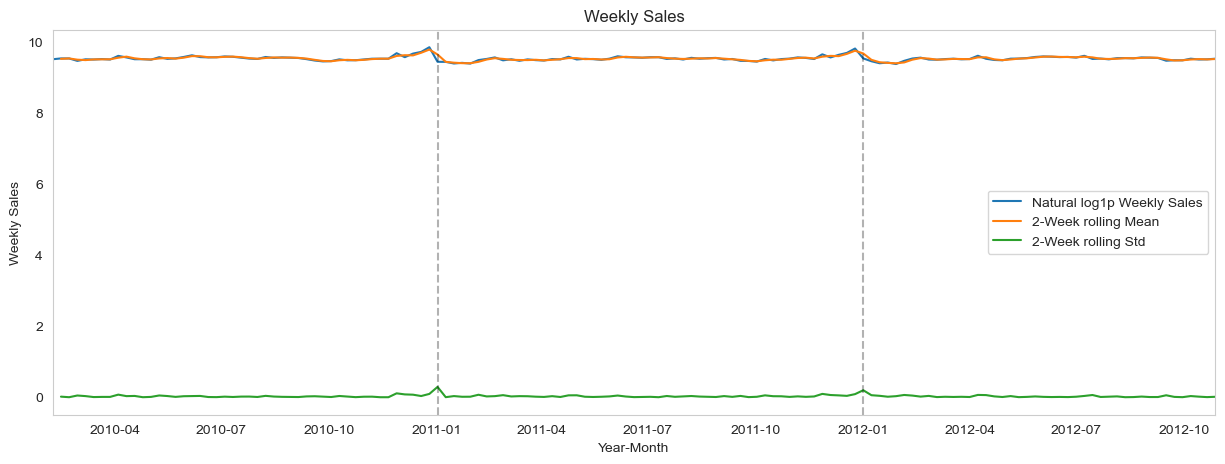

In [103]:
plt.figure(figsize = (15, 5))

plt.plot(DataLog1p, label = 'Natural log1p Weekly Sales')

plt.plot(DataLog1p.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(DataLog1p.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = data[data['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = data[data['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(data[data['Year'] == 2010].index[0], data[data['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales');

#### Natural log1p Augmented Dickey-Fuller Test

In [104]:
result = adfuller(DataLog1p)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.953896942959205
p-value: 2.7360147513440623e-05
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


### Non-stationary Data Second Differencing

In [105]:
# Modifying the data.

SecondDiff = FirstDiff.diff().dropna()

#### Second Differencing Rolling Statistics

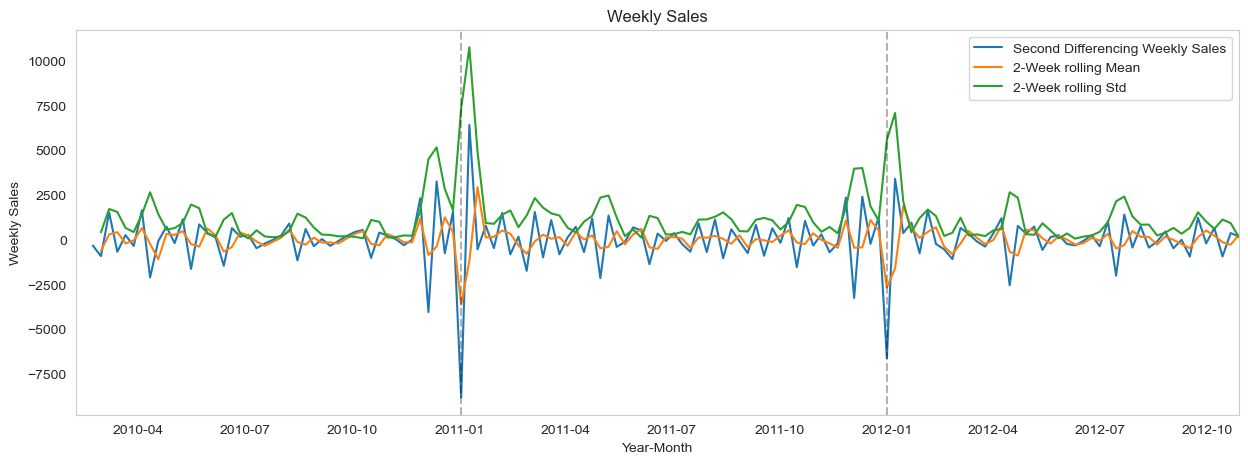

In [106]:
plt.figure(figsize = (15, 5))

plt.plot(SecondDiff, label = 'Second Differencing Weekly Sales')

plt.plot(SecondDiff.rolling(window = 2, center = False).mean(), label = '2-Week rolling Mean')

plt.plot(SecondDiff.rolling(window = 2, center = False).std(), label = '2-Week rolling Std')

plt.axvline(x = data[data['Year'] == 2010].index[-1], color = 'black', linestyle = '--', alpha = 0.3)

plt.axvline(x = data[data['Year'] == 2011].index[-1], color = 'black', linestyle = '--', alpha = 0.3)


plt.grid(False)
plt.ylabel('Weekly Sales')
plt.xlabel('Year-Month')
plt.xlim(data[data['Year'] == 2010].index[0], data[data['Year'] == 2012].index[-1])
plt.legend()
plt.title('Weekly Sales');

#### Second Differencing Augmented Dickey-Fuller Test

In [107]:
result = adfuller(SecondDiff)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {round(result[1],5)}')
print('Critical Values:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -8.631790942373783
p-value: 0.0
Critical Values:
	1%: -3.480500383888377
	5%: -2.8835279559405045
	10%: -2.578495716547007


Since I am not noticing any changes with the transformation I will stop and give some transformations a chance to perform in the model. I'll be trainning the transformations I tested so far:

- Normal data (Without Modifications)
- First Differencing 
- Data Shift
- Data Natural Log

I will perform a Random Forest Model on the normal data and the time series models in the rest of transformations, since the normal data is not stationary theres no reason to perform a time series model on it. The purpose of doing this is to see which one performs better with the current settings.

## Setting data for Model Creating
### Delcare trainning inputs and outputs.

I need to declare our X and y in order to fit the data to our model.

In [108]:
X = data.drop('Weekly_Sales', axis = 1)

y = data['Weekly_Sales']

### Scale the data

Scaling the data before fitting it to the model it' always a good habit to have as a data scientist, even when the data is not continuos it is recommended to do it. In this case I are working with a continuos target and a time series model, so I am going to be using RobustScaler. You can follow this [link](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/) if you have any doubts in what Scaler to use.

In [109]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X)

X = scaler.transform(X)

### Trainning data and Testing data

Since I merged our testing dataset together in order to create one big sample to train on, I dont have a testing data. I can create it using sklearn, in this particular case I will not be using a validation dataset because this is an end-to-end project and I am not being feed with more data from Walmart and not having this constantly makes it hard for future maintenance. 

Since this is a time series model it is important to Set Shuffle to False. Since I have observations for 3 years I will be trainning with the year 2010 and 2011 and Ill try to predict the 2012 year, 2010 and 2011 is about 70% of the dataset so I'll set the test size to 0.3 (30%)

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = False)

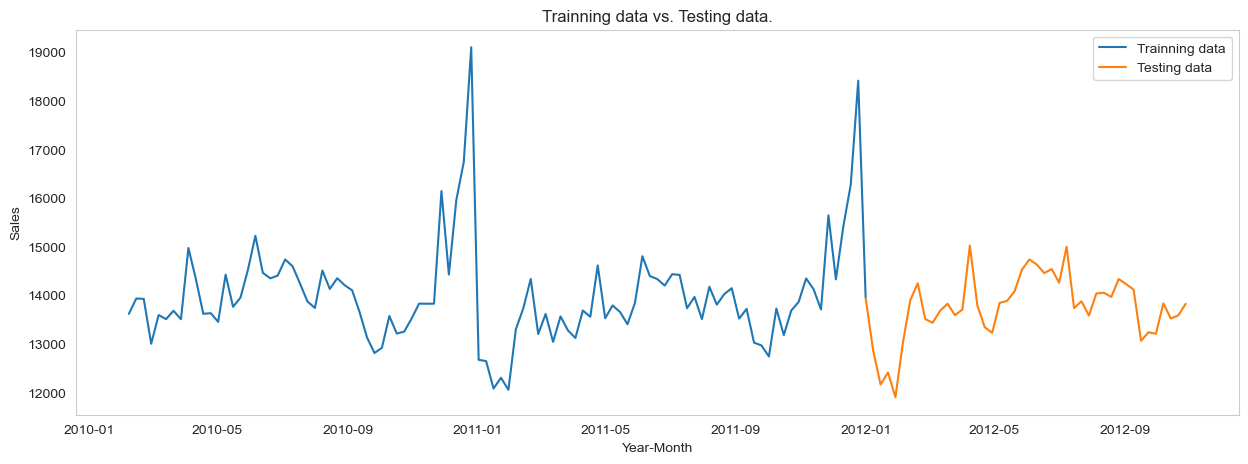

In [111]:
plt.figure(figsize = (15, 5))

plt.plot(data['Weekly_Sales'][:len(data['Weekly_Sales']) - len(X_test)], label = 'Trainning data')
plt.plot(data['Weekly_Sales'][len(data['Weekly_Sales']) - (len(X_test) + 1):], label = 'Testing data')

plt.xlabel('Year-Month')
plt.legend()
plt.ylabel('Sales')
plt.title('Trainning data vs. Testing data.');

## Trainning the model

There is many ways to approach this problem, I always like to use the worst performance models for my problem first to have a base of the metrics and from there train most advanced models, so I will be looking to train models like:

- Random Forest regressor
- Autoregressive Integrated Moving Average (ARIMA)
- Seasonal Autoregressive Integrated Moving Average (SARIMA)
- Seasonal Decomposition of Time Series (STL)
- Exponential Smoothing (ES)
- Seasonal Exponential Smoothing (ETS)
- Vector Autoregression (VAR)
- Long Short-Term Memory (LSTM)
- Convolutional Neural Networks (CNN)
- Gradient Boosting (GBM)

### Random Forest Regressor

Random Forest is an ensemble-based algorithm that uses decision trees to make predictions.

#### Fit the model

In [112]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressorND = RandomForestRegressor(n_estimators = 100, max_depth = 30, n_jobs = -1, 
                                              random_state = 40).fit(X_train, y_train)

#### Make predictions

In [113]:
RandomForestPredictionsND = RandomForestRegressorND.predict(X_test)

#### Score and Metrics

In [114]:
from sklearn import metrics

print(f"Model Score:{RandomForestRegressorND.score(X_train, y_train)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, RandomForestPredictionsND)}")
print(f"MSE: {metrics.mean_squared_error(y_test, RandomForestPredictionsND)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(y_test, RandomForestPredictionsND))}")

Model Score:0.9407748200479513
MAE: 452.59501018281355
MSE: 336192.3007790563
RMSE: 21.274280485666573


I got pretty good results after fitting a Random Forest Regression, I got a Score of about 0.94 which is good, Mean Absolute Error of 362, Mean Squared Error of 184800 which is quite large I know MSE penalizes larger error so it's essential for our model since I want smaller errors and a Root Mean Squared Error of around 19. I have to look at the residuals and it's percentage difference.

#### Model performance

In [115]:
RandomForestSummaryND = pd.DataFrame()

RandomForestSummaryND['Model Prediction'] = RandomForestPredictionsND

RandomForestSummaryND['Actual Value'] = y_test.reset_index()['Weekly_Sales']

RandomForestSummaryND['Difference'] = RandomForestSummaryND['Model Prediction'] - RandomForestSummaryND['Actual Value']

RandomForestSummaryND['Difference %'] = round(np.absolute(RandomForestSummaryND['Difference'] / RandomForestSummaryND['Actual Value'] * 100), 2)

RandomForestSummaryND.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
0       12872.281650  12868.107358     4.174292          0.03
32      13977.966233  13964.657943    13.308289          0.10
26      15016.189401  14999.542681    16.646719          0.11
25      14293.615547  14256.616932    36.998615          0.26
6       14298.238182  14245.834969    52.403213          0.37
10      13877.789930  13826.309188    51.480742          0.37
18      13955.705162  13885.275812    70.429350          0.51
39      13737.739898  13832.804041   -95.064142          0.69
14      13900.196490  13796.965723   103.230768          0.75
31      13935.892014  14052.098069  -116.206055          0.83
19      13956.197009  14078.876809  -122.679800          0.87
42      13951.888122  13824.508733   127.379388          0.92
34      14440.845716  14227.741508   213.104208          1.50
5       13686.209682  13901.972399  -215.762717          1.55
35      13886.589783  14116.042424  -229.452641          1.63
21      14488.883824  14736.944981  -248.061157          1.68
9       13909.226604  13679.855652   229.370952          1.68
33      14598.924347  14334.458377   264.465970          1.84
23      14722.572881  14456.072308   266.500573          1.84
11      13935.185342  13590.658661   344.526681          2.54
7       13876.102365  13510.426693   365.675672          2.71
41      13973.510252  13584.418693   389.091559          2.86
12      14107.312646  13706.202080   401.110566          2.93
17      14296.557745  13841.218610   455.339134          3.29
24      15029.439632  14539.544979   489.894653          3.37
37      13699.242260  13237.123437   462.118824          3.49
15      13833.226430  13341.939822   491.286608          3.68
2       12873.655358  12409.449343   464.206015          3.74
38      13740.272783  13207.163907   533.108875          4.04
20      13929.842574  14525.867037  -596.024463          4.10
22      13986.773422  14631.211990  -644.438569          4.40
36      13652.581191  13062.297582   590.283608          4.52
16      13879.223018  13226.167726   653.055292          4.94
30      14837.237063  14037.398195   799.838868          5.70
40      14315.750279  13521.874281   793.875998          5.87
1       12965.583553  12162.314013   803.269540          6.60
28      14873.853352  13876.783337   997.070015          7.19
13      13930.939460  15023.188036 -1092.248576          7.27
8       14472.466247  13433.991855  1038.474392          7.73
3       12880.117323  11901.021570   979.095753          8.23
27      14894.190604  13735.922510  1158.268094          8.43
29      14759.273925  13580.951166  1178.322759          8.68
4       14285.315463  13021.074129  1264.241334          9.71

The largest gap between the prediction and the testing data was around 6%. Which is pretty good for this kind of model, I can also see that our smallest gap was 0.03% so that was spotted on.

#### Model performance statistics

In [116]:
RandomForestSummaryND.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         43.000000     43.000000    43.000000     43.000000
mean       14058.944297  13762.625478   296.318819      3.338372
std          539.322508    674.105064   504.283101      2.749318
min        12872.281650  11901.021570 -1092.248576      0.030000
25%        13876.946147  13472.209274    14.977504      0.895000
50%        13955.705162  13826.309188   266.500573      2.860000
75%        14378.297997  14171.891966   561.696242      4.730000
max        15029.439632  15023.188036  1264.241334      9.710000

The mean Difference % is around 2.62%, this is a small difference for a model like this we can also see that 75% of the predictions were less than 3.82% in difference from the actual value. So this results are amazing. 

#### Predictions vs. Testing Dataset

In [117]:
# Adding index to predictions

RandomForestPlotND = y_test.reset_index()

RandomForestPlotND['Predictions'] = RandomForestPredictionsND

RandomForestPlotND.set_index(RandomForestPlotND['Date'], inplace = True, drop = True)

RandomForestPlotND.drop(['Date', 'Weekly_Sales'], inplace = True, axis = 1)

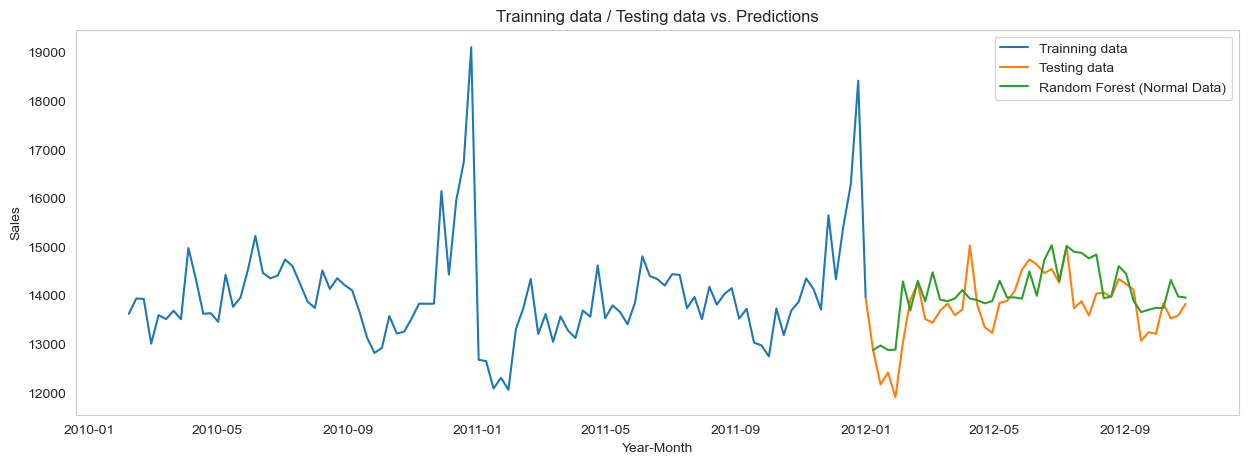

In [118]:
# Ploting

plt.figure(figsize = (15, 5))

plt.plot(data['Weekly_Sales'][:len(data['Weekly_Sales']) - len(X_test)], label = 'Trainning data')
plt.plot(data['Weekly_Sales'][len(data['Weekly_Sales']) - (len(X_test) + 1):], label = 'Testing data')
plt.plot(RandomForestPlotND, label = 'Random Forest (Normal Data)')

plt.xlabel('Year-Month')
plt.legend()
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. Predictions');

Overall Random Forest managed to make pretty good predictions as I can see from the chart, I feel like there is room for improvment with other models but the results from Random Forest were amazing!

#### Predictors importance

In [119]:
RFImportanceND = pd.DataFrame(index = data.drop('Weekly_Sales', axis = 1).columns.values)

RFImportanceND['Importance'] = RandomForestRegressorND.feature_importances_

RFImportanceND.sort_values(by = 'Importance', ascending = False)

Importance
Week            0.340362
Dept            0.240524
TypeB           0.113451
Temperature     0.093462
TypeC           0.065910
Month           0.049226
Fuel_Price      0.031095
Thanksgiving    0.024946
MarkDown1       0.014856
MarkDown3       0.013413
MarkDown2       0.005563
Christmas       0.004410
Year            0.001493
Labor day       0.000925
Super Bowl      0.000364

As I expected Week was the better performance feature, followed by Dept and TypeB. In general very good predictors for our model.

#### Comparation table

In [120]:
# Creating table

Model, Data_Type, MAE, MSE, RMSE, Max_Diff, Mean_Diff, Min_Diff = list(), list(), list(), list(), list(), list(), list(), list()

In [121]:
# Appending values

Model.append('Random Forest')
Data_Type.append('Normal Data')
MAE.append(metrics.mean_absolute_error(y_test, RandomForestPredictionsND))
MSE.append(metrics.mean_squared_error(y_test, RandomForestPredictionsND))
RMSE.append(np.sqrt(metrics.mean_absolute_error(y_test, RandomForestPredictionsND)))
Min_Diff.append(0.030000)
Mean_Diff.append(3.338372)
Max_Diff.append(9.710000)

---------------------------------------------------------------------------------


### Autoregressive Integrated Moving Average (ARIMA) (First Differencing)

A widely used model for time series forecasting that includes autoregression, differencing, and moving average components.

I will be using the Auto-ARIMA from pmdarima, the auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. This process is based on the commonly-used R function, forecast::auto.arima when I have the best performing parameters I can fit the statsmodels ARIMA model.

#### Get parameters for the model

In [122]:
from pmdarima import auto_arima

arima_parametersFD = auto_arima(FirstDiff, trace = True, suppress_warnings = True,  n_jobs = -1, start_p = 0, 
                              start_q = 0, start_P = 0, start_Q = 0, max_p = 25, max_q = 25, max_P = 25, 
                              max_Q = 25, seasonal = False, maxiter = 250, stepwise = False, D = 1, max_D = 15)


Best model:  ARIMA(5,0,0)(0,0,0)[0]          
Total fit time: 10.224 seconds


#### Time Series Training data and Testing data

Since we are working with Time Series models now, I need an index with the Date in our training and testing data, so I cannot use the one we used for RFND.

In [123]:
print(FirstDiff.shape)

FDTrain = FirstDiff.iloc[:-29]

FDTest = FirstDiff.iloc[-29:]

print(FDTrain.shape, FDTest.shape)

(142,)
(113,) (29,)


#### Fit the model

In [124]:
from statsmodels.tsa.arima.model import ARIMA

ArimaFD = ARIMA(FirstDiff, order = (5, 0, 0)).fit()

ArimaFD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -1156.853
Date:                Tue, 28 Feb 2023   AIC                           2327.706
Time:                        12:27:40   BIC                           2348.396
Sample:                    02-14-2010   HQIC                          2336.113
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4624     50.227      0.029      0.977     -96.980      99.905
ar.L1         -0.2115      0.057     -3.706      0.000      -0.323      -0.100
ar.L2         -0.1499      0.077     -1.954      0.051      -0.300       0.000
ar.L3         -0.2515      0.068     -3.718      0.000      -0.384      -0.119
ar.L4          0.0622      0.102      0.608      0.543      -0.138       0.263
ar.L5         -0.2701      0.103     -2.610      0.009      -0.473      -0.067
sigma2      7.123e+05   6.95e+04     10.250      0.000    5.76e+05    8.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):               365.19
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -1.14
Prob(H) (two-sided):                  0.12   Kurtosis:                        10.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make predictions

In [125]:
start, end = len(FDTrain), len(FDTrain) + len(FDTest) - 1

ArimaPredictionsFD = ArimaFD.predict(start = start, end = end)

#### Score and Metrics

In [126]:
print(f"MAE: {metrics.mean_absolute_error(FDTest, ArimaPredictionsFD)}")
print(f"MSE: {metrics.mean_squared_error(FDTest, ArimaPredictionsFD)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(FDTest, ArimaPredictionsFD))}")

MAE: 332.6459827374883
MSE: 196454.635270105
RMSE: 18.23858499822528


#### Model performance

In [127]:
ArimaSummaryFD = pd.DataFrame()

ArimaSummaryFD['Model Prediction'] = ArimaPredictionsFD

ArimaSummaryFD['Actual Value'] = FDTest

ArimaSummaryFD['Difference'] = ArimaSummaryFD['Model Prediction'] - ArimaSummaryFD['Actual Value']

ArimaSummaryFD['Difference %'] = round(np.absolute(ArimaSummaryFD['Difference'] / ArimaSummaryFD['Actual Value'] * 100), 2)

ArimaSummaryFD.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-08-05        484.581194    456.447029    28.134165          6.16
2012-09-09       -130.584398   -111.699084   -18.885314         16.91
2012-05-20        233.217154    193.600997    39.616156         20.46
2012-05-06        454.477328    615.050884  -160.573556         26.11
2012-06-17       -118.898871   -175.139683    56.240812         32.11
2012-10-14       -204.499328   -310.929760   106.430432         34.23
2012-10-07        269.715917    625.640133  -355.924216         56.89
2012-07-01        -69.760133   -282.928047   213.167914         75.34
2012-04-15       -291.185140  -1226.222313   935.037174         76.25
2012-07-29        -64.754556   -295.832171   231.077614         78.11
2012-09-23        315.700836    174.825854   140.874982         80.58
2012-07-15       -115.367063  -1263.620171  1148.253108         90.87
2012-09-16        -60.146299  -1053.744842   993.598542         94.29
2012-04-22        -18.693802   -455.025901   436.332099         95.89
2012-07-08         30.438459    742.925749  -712.487290         95.90
2012-07-22        282.197673    140.860826   141.336846        100.34
2012-05-27        -83.866373    446.990228  -530.856601        118.76
2012-04-29         22.253301   -115.772096   138.025397        119.22
2012-06-24        -22.036629     83.472672  -105.509301        126.40
2012-06-03        -62.423686    211.077944  -273.501630        129.57
2012-09-02         42.176480   -106.716869   148.893350        139.52
2012-08-26       -152.309846    369.800434  -522.110280        141.19
2012-10-28       -170.415390    240.090040  -410.505430        170.98
2012-06-10       -321.061169   -105.732991  -215.328178        203.65
2012-09-30         45.182565    -29.959529    75.142094        250.81
2012-10-21        277.704536     62.544412   215.160124        344.01
2012-08-19        355.655333    -87.440126   443.095459        506.74
2012-05-13       -427.633932     44.057202  -471.691134       1070.63
2012-08-12       -364.244426     14.699874  -378.944300       2577.87

#### Model performance statistics

In [128]:
ArimaSummaryFD.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean           4.669646    -41.333769    46.003415    237.234138
std          240.716422    492.436166   448.641255    494.444912
min         -427.633932  -1263.620171  -712.487290      6.160000
25%         -130.584398   -175.139683  -273.501630     75.340000
50%          -60.146299     14.699874    56.240812     95.900000
75%          233.217154    211.077944   213.167914    141.190000
max          484.581194    742.925749  1148.253108   2577.870000

#### Predictions vs. Testing Dataset

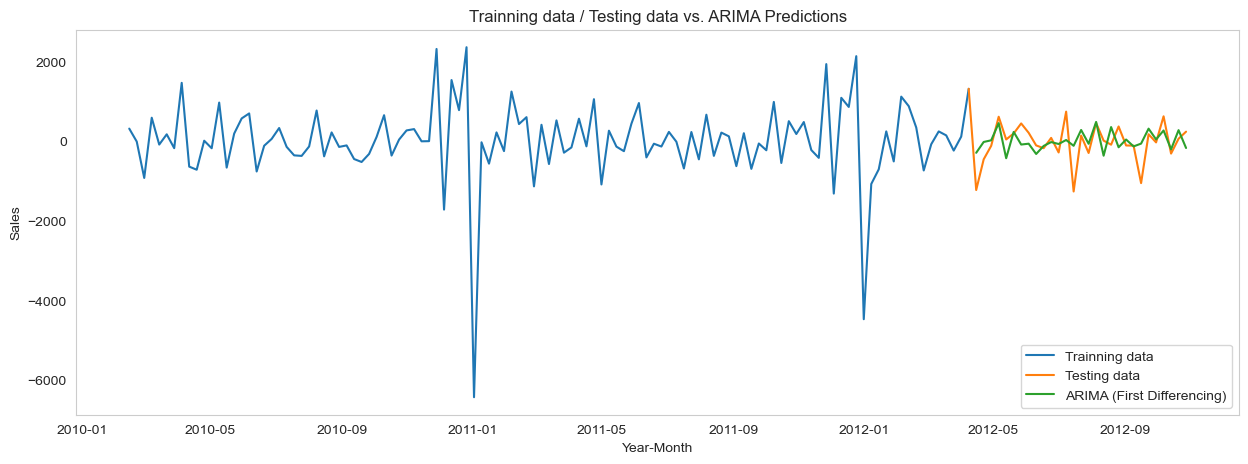

In [129]:
plt.figure(figsize = (15, 5))

plt.plot(FirstDiff[:len(FirstDiff) - len(FDTest)], label = 'Trainning data')
plt.plot(FirstDiff[len(FirstDiff) - (len(FDTest) + 1):], label = 'Testing data')
plt.plot(ArimaPredictionsFD, label = 'ARIMA (First Differencing)')

plt.xlabel('Year-Month')
plt.legend(loc = 'lower right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. ARIMA Predictions');

#### Comparation table

In [130]:
Model.append('ARIMA')
Data_Type.append('First Differencing')
MAE.append(metrics.mean_absolute_error(FDTest, ArimaPredictionsFD))
MSE.append(metrics.mean_squared_error(FDTest, ArimaPredictionsFD))
RMSE.append(np.sqrt(metrics.mean_absolute_error(FDTest, ArimaPredictionsFD)))

Min_Diff.append(ArimaSummaryFD.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(ArimaSummaryFD.describe(include = 'all')['Difference %'][1])
Max_Diff.append(ArimaSummaryFD.describe(include = 'all')['Difference %'][-1])

---------------------------------------------------------------------------------


### Autoregressive Integrated Moving Average (ARIMA) (Data Shift)

#### Get parameters for the model

In [131]:
arima_parametersDS = auto_arima(DataShift, trace = True, suppress_warnings = True,  n_jobs = -1, start_p = 0, 
                              start_q = 0, start_P = 0, start_Q = 0, max_p = 25, max_q = 25, max_P = 25, 
                              max_Q = 25, seasonal = False, maxiter = 250, stepwise = False, D = 1, max_D = 15)


Best model:  ARIMA(4,0,1)(0,0,0)[0]          
Total fit time: 1.087 seconds


#### Time Series Training data and Testing data

In [132]:
print(DataShift.shape)

DSTrain = DataShift.iloc[:-29]

DSTest = DataShift.iloc[-29:]

print(DSTrain.shape, DSTest.shape)

(142,)
(113,) (29,)


#### Fit the model

In [133]:
ArimaDS = ARIMA(DataShift, order = (4, 0, 1)).fit()

ArimaDS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -1149.471
Date:                Tue, 28 Feb 2023   AIC                           2312.943
Time:                        12:27:42   BIC                           2333.634
Sample:                    02-14-2010   HQIC                          2321.351
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.393e+04    217.504     64.037      0.000    1.35e+04    1.44e+04
ar.L1          0.0207      0.472      0.044      0.965      -0.905       0.946
ar.L2          0.3690      0.296      1.246      0.213      -0.211       0.949
ar.L3         -0.2033      0.099     -2.062      0.039      -0.397      -0.010
ar.L4          0.0671      0.183      0.367      0.713      -0.291       0.425
ma.L1          0.5332      0.499      1.069      0.285      -0.444       1.511
sigma2      6.627e+05   5.52e+04     12.002      0.000    5.54e+05    7.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               199.98
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.78   Kurtosis:                         8.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make predictions

In [134]:
start, end = len(DSTrain), len(DSTrain) + len(DSTest) - 1

ArimaPredictionsDS = ArimaDS.predict(start = start, end = end)

#### Score and Metrics

In [135]:
print(f"MAE: {metrics.mean_absolute_error(DSTest, ArimaPredictionsDS)}")
print(f"MSE: {metrics.mean_squared_error(DSTest, ArimaPredictionsDS)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(DSTest, ArimaPredictionsDS))}")

MAE: 329.46803054821663
MSE: 211124.17699408304
RMSE: 18.151254241738133


#### Model performance

In [136]:
ArimaSummaryDS = pd.DataFrame()

ArimaSummaryDS['Model Prediction'] = ArimaPredictionsDS

ArimaSummaryDS['Actual Value'] = DSTest

ArimaSummaryDS['Difference'] = ArimaSummaryDS['Model Prediction'] - ArimaSummaryDS['Actual Value']

ArimaSummaryDS['Difference %'] = round(np.absolute(ArimaSummaryDS['Difference'] / ArimaSummaryDS['Actual Value'] * 100), 2)

ArimaSummaryDS.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-07-08      14244.862565  14256.616932   -11.754367          0.08
2012-09-16      14098.582284  14116.042424   -17.460140          0.12
2012-09-09      14202.817316  14227.741508   -24.924192          0.18
2012-07-29      13908.491627  13876.783337    31.708290          0.23
2012-05-27      14029.511541  14078.876809   -49.365268          0.35
2012-08-12      13979.705571  14037.398195   -57.692624          0.41
2012-05-20      13827.434040  13885.275812   -57.841772          0.42
2012-08-05      13643.642067  13580.951166    62.690901          0.46
2012-05-13      13748.162882  13841.218610   -93.055729          0.67
2012-05-06      13318.938516  13226.167726    92.770789          0.70
2012-10-14      13713.807877  13832.804041  -118.996163          0.86
2012-06-24      14279.248089  14456.072308  -176.824218          1.22
2012-08-26      14156.315243  13964.657943   191.657299          1.37
2012-08-19      13830.727795  14052.098069  -221.370274          1.58
2012-09-30      13461.110628  13237.123437   223.987191          1.69
2012-10-28      13833.349745  13584.418693   248.931052          1.83
2012-10-07      13456.996820  13207.163907   249.832913          1.89
2012-06-17      14351.037197  14631.211990  -280.174793          1.91
2012-10-21      13806.080093  13521.874281   284.205812          2.10
2012-07-01      14168.601336  14539.544979  -370.943644          2.55
2012-06-10      14326.194359  14736.944981  -410.750622          2.79
2012-09-02      13827.073028  14334.458377  -507.385350          3.54
2012-06-03      13912.455911  14525.867037  -613.411126          4.22
2012-04-29      13925.853012  13341.939822   583.913190          4.38
2012-07-22      14458.768774  13735.922510   722.846263          5.26
2012-04-22      14596.384154  13796.965723   799.418432          5.79
2012-07-15      14106.806074  14999.542681  -892.736607          5.95
2012-09-23      13971.878078  13062.297582   909.580496          6.96
2012-04-15      13774.844667  15023.188036 -1248.343369          8.31

#### Model performance statistics

In [137]:
ArimaSummaryDS.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean       13964.126941  13990.040308   -25.913367      2.338621
std          302.427510    531.373392   466.871333      2.279237
min        13318.938516  13062.297582 -1248.343369      0.080000
25%        13806.080093  13584.418693  -221.370274      0.460000
50%        13925.853012  13964.657943   -24.924192      1.690000
75%        14168.601336  14334.458377   223.987191      3.540000
max        14596.384154  15023.188036   909.580496      8.310000

#### Predictions vs. Testing Dataset

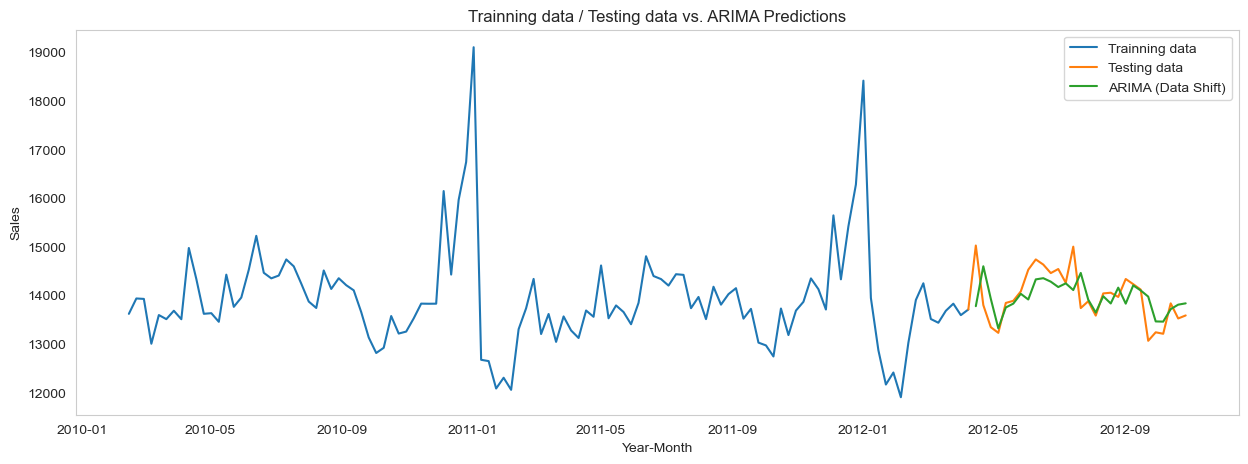

In [138]:
plt.figure(figsize = (15, 5))

plt.plot(DataShift[:len(DataShift) - len(DSTest)], label = 'Trainning data')
plt.plot(DataShift[len(DataShift) - (len(DSTest) + 1):], label = 'Testing data')
plt.plot(ArimaPredictionsDS, label = 'ARIMA (Data Shift)')

plt.xlabel('Year-Month')
plt.legend(loc = 'upper right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. ARIMA Predictions');

#### Comparation table

In [139]:
Model.append('ARIMA')
Data_Type.append('Data Shift')

MAE.append(metrics.mean_absolute_error(DSTest, ArimaPredictionsDS))
MSE.append(metrics.mean_squared_error(DSTest, ArimaPredictionsDS))
RMSE.append(np.sqrt(metrics.mean_absolute_error(DSTest, ArimaPredictionsDS)))

Min_Diff.append(ArimaSummaryDS.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(ArimaSummaryDS.describe(include = 'all')['Difference %'][1])
Max_Diff.append(ArimaSummaryDS.describe(include = 'all')['Difference %'][-1])

---------------------------------------------------------------------------------


### Autoregressive Integrated Moving Average (ARIMA) (Data Log)

#### Get parameters for the model

In [140]:
arima_parametersDL = auto_arima(DataLog, trace = True, suppress_warnings = True,  n_jobs = -1, start_p = 0, 
                              start_q = 0, start_P = 0, start_Q = 0, max_p = 25, max_q = 25, max_P = 25, 
                              max_Q = 25, seasonal = False, maxiter = 250, stepwise = False, D = 1, max_D = 15)


Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 2.052 seconds


#### Time Series Training data and Testing data

In [141]:
print(DataLog.shape)

DLTrain = DataLog.iloc[:-29]

DLTest = DataLog.iloc[-29:]

print(DLTrain.shape, DLTest.shape)

(143,)
(114,) (29,)


#### Fit the model

In [142]:
ArimaDL = ARIMA(DataLog, order = (2, 0, 3)).fit()

ArimaDL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 222.175
Date:                Tue, 28 Feb 2023   AIC                           -430.349
Time:                        12:27:45   BIC                           -409.609
Sample:                    02-07-2010   HQIC                          -421.921
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5393      0.012    825.555      0.000       9.517       9.562
ar.L1          0.1622      1.036      0.157      0.876      -1.867       2.192
ar.L2          0.3793      0.491      0.772      0.440      -0.584       1.342
ma.L1          0.4848      1.039      0.467      0.641      -1.552       2.521
ma.L2         -0.0820      1.146     -0.072      0.943      -2.328       2.164
ma.L3         -0.4458      0.700     -0.637      0.524      -1.817       0.925
sigma2         0.0026      0.000      9.904      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                75.63
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                             0.14
Prob(H) (two-sided):                  0.13   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make predictions

In [143]:
start, end = len(DLTrain), len(DLTrain) + len(DLTest) - 1

ArimaPredictionsDL = ArimaDL.predict(start = start, end = end)

#### Score and Metrics

We need to convert back to exp since it's a logged set, I will use np.exp()

In [144]:
print(f"MAE: {metrics.mean_absolute_error(np.exp(DLTest), np.exp(ArimaPredictionsDL))}")
print(f"MSE: {metrics.mean_squared_error(np.exp(DLTest), np.exp(ArimaPredictionsDL))}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(np.exp(DLTest), np.exp(ArimaPredictionsDL)))}")

MAE: 313.7634499378982
MSE: 158219.3935362706
RMSE: 17.713369242972895


#### Model performance

In [145]:
ArimaSummaryDL = pd.DataFrame()

ArimaSummaryDL['Model Prediction'] = np.exp(ArimaPredictionsDL)

ArimaSummaryDL['Actual Value'] = np.exp(DLTest)

ArimaSummaryDL['Difference'] = ArimaSummaryDL['Model Prediction'] - ArimaSummaryDL['Actual Value']

ArimaSummaryDL['Difference %'] = round(np.absolute(ArimaSummaryDL['Difference'] / ArimaSummaryDL['Actual Value'] * 100), 2)

ArimaSummaryDL.sort_values(by = 'Difference %')

Model Prediction  Actual Value  Difference  Difference %
Date                                                                
2012-07-01      14285.920213  14256.616932   29.303281          0.21
2012-07-22      13846.265159  13876.783337  -30.518178          0.22
2012-07-29      13499.425367  13580.951166  -81.525800          0.60
2012-04-29      13136.186862  13226.167726  -89.980864          0.68
2012-10-07      13733.385705  13832.804041  -99.418336          0.72
2012-09-09      14247.511252  14116.042424  131.468827          0.93
2012-05-20      13924.304676  14078.876809 -154.572134          1.10
2012-05-13      13725.895313  13885.275812 -159.380499          1.15
2012-08-19      14126.312894  13964.657943  161.654951          1.16
2012-09-23      13403.162053  13237.123437  166.038617          1.25
2012-08-05      14212.200985  14037.398195  174.802790          1.25
2012-09-02      14036.473887  14227.741508 -191.267621          1.34
2012-05-06      14030.239352  13841.218610  189.020741          1.37
2012-06-10      14416.676630  14631.211990 -214.535360          1.47
2012-10-21      13817.152940  13584.418693  232.734247          1.71
2012-10-14      13769.247753  13521.874281  247.373472          1.83
2012-10-28      13566.440702  13824.508733 -258.068031          1.87
2012-06-17      14183.323406  14456.072308 -272.748902          1.89
2012-09-30      13502.326777  13207.163907  295.162870          2.23
2012-08-12      13695.440184  14052.098069 -356.657885          2.54
2012-06-24      14140.302324  14539.544979 -399.242656          2.75
2012-08-26      13935.772266  14334.458377 -398.686112          2.78
2012-05-27      14067.593753  14525.867037 -458.273284          3.15
2012-04-22      13773.888499  13341.939822  431.948677          3.24
2012-06-03      14199.864112  14736.944981 -537.080869          3.64
2012-07-15      14496.113679  13735.922510  760.191168          5.53
2012-09-16      13803.344972  13062.297582  741.047390          5.67
2012-04-15      14663.177157  13796.965723  866.211435          6.28
2012-07-08      14029.317629  14999.542681 -970.225053          6.47

#### Model performance statistics

In [146]:
ArimaSummaryDL.describe(include = 'all')

Model Prediction  Actual Value  Difference  Difference %
count         29.000000     29.000000   29.000000     29.000000
mean       13940.250569  13948.706538   -8.455970      2.242414
std          343.224603    493.402025  404.717221      1.763385
min        13136.186862  13062.297582 -970.225053      0.210000
25%        13733.385705  13584.418693 -258.068031      1.150000
50%        13935.772266  13885.275812  -81.525800      1.710000
75%        14183.323406  14256.616932  189.020741      2.780000
max        14663.177157  14999.542681  866.211435      6.470000

#### Predictions vs. Testing Dataset

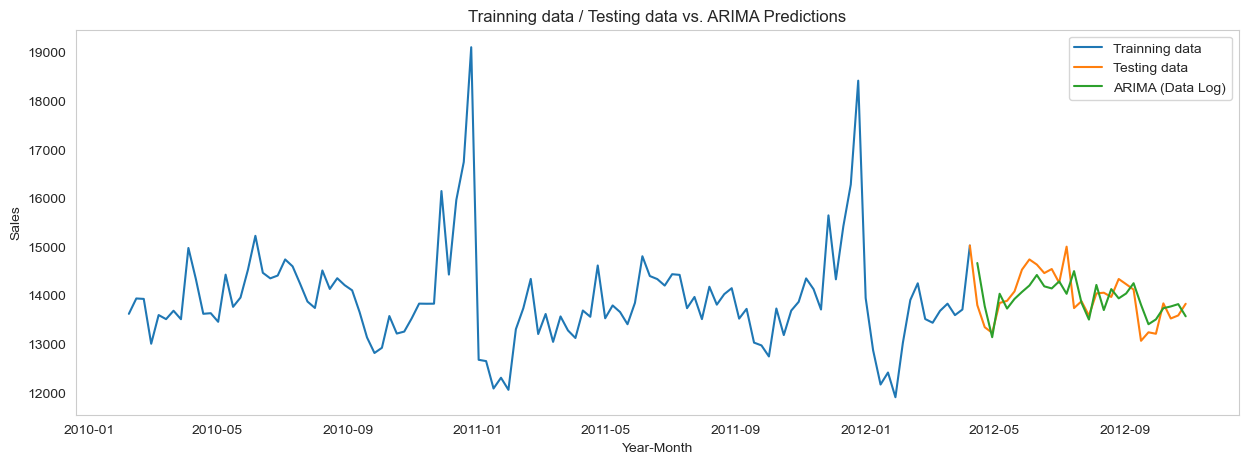

In [147]:
plt.figure(figsize = (15, 5))

plt.plot(np.exp(DataLog)[:len(np.exp(DataLog)) - len(DLTest)], label = 'Trainning data')
plt.plot(np.exp(DataLog)[len(np.exp(DataLog)) - (len(DLTest) + 1):], label = 'Testing data')
plt.plot(np.exp(ArimaPredictionsDL), label = 'ARIMA (Data Log)')

plt.xlabel('Year-Month')
plt.legend(loc = 'upper right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. ARIMA Predictions');

#### Comparation table

In [148]:
Model.append('ARIMA ')
Data_Type.append('Data Log')

MAE.append(metrics.mean_absolute_error(np.exp(DLTest), np.exp(ArimaPredictionsDL)))
MSE.append(metrics.mean_squared_error(np.exp(DLTest), np.exp(ArimaPredictionsDL)))
RMSE.append(np.sqrt(metrics.mean_absolute_error(np.exp(DLTest), np.exp(ArimaPredictionsDL))))

Min_Diff.append(ArimaSummaryDL.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(ArimaSummaryDL.describe(include = 'all')['Difference %'][1])
Max_Diff.append(ArimaSummaryDL.describe(include = 'all')['Difference %'][-1])

---------------------------------------------------------------------------------


### Seasonal Autoregressive Integrated Moving Average (SARIMA) (First Differencing)

An extension of ARIMA that accounts for seasonal variations in the data.

As we did with ARIMA I will be using the Auto-ARIMA from pmdarima, in these case we'll set seasonal = True, the auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model. This process is based on the commonly-used R function, forecast::auto.arima when I have the best performing parameters I can fit the statsmodels ARIMA model.

#### Get parameters for the model

In [149]:
sarima_parametersFD = auto_arima(FirstDiff, start_p = 1, start_q = 1, test = 'adf', max_p = 3, max_q = 3, m = 12, 
                         start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action = 'ignore',  
                         suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2261.766, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2204.197, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2259.768, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2252.753, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2191.137, Time=1.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2204.686, Time=0.76 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=2193.080, Time=1.43 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=2191.392, Time=2.66 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=2189.781, Time=0.95 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2203.638, Time=0.46 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : 

#### Fit the model

In [150]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

SarimaFD = SARIMAX(FirstDiff, order = (0, 0, 1), seasonal_order = (2, 1, 0, 12)).fit()

SarimaFD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  142
Model:             SARIMAX(0, 0, 1)x(2, 1, [], 12)   Log Likelihood               -1089.889
Date:                             Tue, 28 Feb 2023   AIC                           2187.779
Time:                                     12:28:23   BIC                           2199.249
Sample:                                 02-14-2010   HQIC                          2192.439
                                      - 10-28-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4050      0.050     -8.051      0.000      -0.504      -0.306
ar.S.L12      -0.7737      0.092     -8.379      0.000      -0.955      -0.593
ar.S.L24      -0.3375      0.074     -4.557      0.000      -0.483      -0.192
sigma2        1.1e+06   9.61e+04     11.447      0.000    9.11e+05    1.29e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               146.39
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                            -0.79
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make predictions

In [151]:
start, end = len(FDTrain), len(FDTrain) + len(FDTest) - 1

SarimaPredictionsFD = SarimaFD.predict(start = start, end = end) 

#### Score and Metrics

In [152]:
print(f"MAE: {metrics.mean_absolute_error(FDTest, SarimaPredictionsFD)}")
print(f"MSE: {metrics.mean_squared_error(FDTest, SarimaPredictionsFD)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(FDTest, SarimaPredictionsFD))}")

MAE: 597.1451974920323
MSE: 491068.82706187246
RMSE: 24.43655453397701


#### Model performance

In [153]:
SarimaSummaryFD = pd.DataFrame()

SarimaSummaryFD['Model Prediction'] = SarimaPredictionsFD

SarimaSummaryFD['Actual Value'] = FDTest

SarimaSummaryFD['Difference'] = SarimaSummaryFD['Model Prediction'] - SarimaSummaryFD['Actual Value']

SarimaSummaryFD['Difference %'] = round(np.absolute(SarimaSummaryFD['Difference'] / SarimaSummaryFD['Actual Value'] * 100), 2)

SarimaSummaryFD.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-06-03        215.990678    211.077944     4.912734          2.33
2012-07-01       -306.963865   -282.928047   -24.035818          8.50
2012-09-16       -760.719972  -1053.744842   293.024869         27.81
2012-10-14       -186.941334   -310.929760   123.988425         39.88
2012-05-06        327.577989    615.050884  -287.472895         46.74
2012-08-26        584.879098    369.800434   215.078664         58.16
2012-07-15       -510.980361  -1263.620171   752.639810         59.56
2012-04-15       -328.843968  -1226.222313   897.378346         73.18
2012-10-28        435.531787    240.090040   195.441747         81.40
2012-05-27        -36.537343    446.990228  -483.527571        108.17
2012-07-08       -118.487984    742.925749  -861.413733        115.95
2012-09-23        390.875274    174.825854   216.049420        123.58
2012-08-05       1178.936177    456.447029   722.489148        158.29
2012-04-22        334.255089   -455.025901   789.280990        173.46
2012-10-07       -723.229398    625.640133 -1348.869531        215.60
2012-07-29        605.507015   -295.832171   901.339185        304.68
2012-05-20       -449.406242    193.600997  -643.007239        332.13
2012-07-22        692.289659    140.860826   551.428833        391.47
2012-08-19        256.405167    -87.440126   343.845292        393.24
2012-09-30       -195.768011    -29.959529  -165.808482        553.44
2012-04-29        549.401976   -115.772096   665.174072        574.55
2012-06-17      -1267.812421   -175.139683 -1092.672739        623.89
2012-10-21        548.811410     62.544412   486.266998        777.47
2012-09-02        848.264680   -106.716869   954.981549        894.87
2012-06-10        890.442817   -105.732991   996.175808        942.16
2012-09-09      -1265.252260   -111.699084 -1153.553176       1032.73
2012-05-13        595.078101     44.057202   551.020900       1250.69
2012-06-24      -1069.711700     83.472672 -1153.184372       1381.51
2012-08-12       -428.448508     14.699874  -443.148382       3014.64

#### Model performance statistics

In [154]:
SarimaSummaryFD.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean          27.763571    -41.333769    69.097340    474.485517
std          657.128979    492.436166   709.691511    629.443933
min        -1267.812421  -1263.620171 -1348.869531      2.330000
25%         -428.448508   -175.139683  -443.148382     73.180000
50%          215.990678     14.699874   215.078664    215.600000
75%          549.401976    211.077944   665.174072    623.890000
max         1178.936177    742.925749   996.175808   3014.640000

#### Predictions vs. Testing Dataset

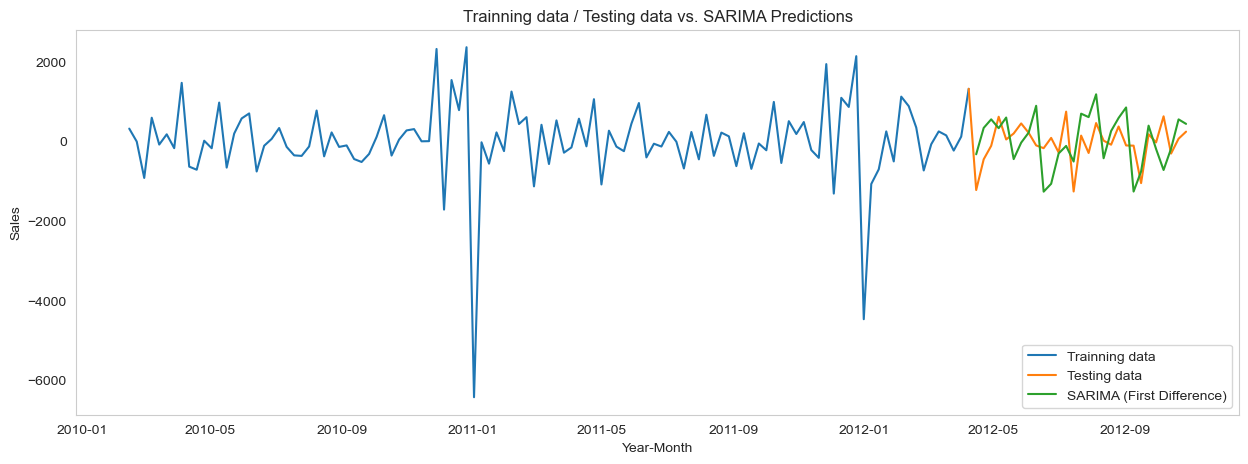

In [155]:
plt.figure(figsize = (15, 5))

plt.plot(FirstDiff[:len(FirstDiff) - len(FDTest)], label = 'Trainning data')
plt.plot(FirstDiff[len(FirstDiff) - (len(FDTest) + 1):], label = 'Testing data')
plt.plot(SarimaPredictionsFD, label = 'SARIMA (First Difference)')

plt.xlabel('Year-Month')
plt.legend(loc = 'lower right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. SARIMA Predictions');

#### Comparation table

In [156]:
Model.append('SARIMA')
Data_Type.append('First Difference')

MAE.append(metrics.mean_absolute_error(FDTest, SarimaPredictionsFD))
MSE.append(metrics.mean_squared_error(FDTest, SarimaPredictionsFD))
RMSE.append(np.sqrt(metrics.mean_absolute_error(FDTest, SarimaPredictionsFD)))

Min_Diff.append(SarimaSummaryFD.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(SarimaSummaryFD.describe(include = 'all')['Difference %'][1])
Max_Diff.append(SarimaSummaryFD.describe(include = 'all')['Difference %'][-1])

---------------------------------------------------------------------------------

### Seasonal Autoregressive Integrated Moving Average (SARIMA) (Data Shift)
#### Get the parameters

In [157]:
arima_parametersDS = auto_arima(DataShift, start_p = 1, start_q = 1, test = 'adf', max_p = 3, max_q = 3, m = 12, 
                         start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action = 'ignore',  
                         suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2228.925, Time=1.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2281.208, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2232.094, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2248.432, Time=1.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2279.211, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2249.921, Time=0.09 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=2231.014, Time=1.15 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=2231.081, Time=2.88 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=2233.273, Time=0.38 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=2235.994, Time=0.94 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=2228.546, Time=0.65 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2247.639, Time=0.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2230.459, Time=0.95 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=2230.493, Time=2.46 sec
 ARIMA(1,0,0)(1,1,2

#### Fit the model

In [158]:
SarimaDS = SARIMAX(DataShift, order = (2, 0, 3), seasonal_order = (0, 1, 1, 12)).fit()

SarimaDS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Weekly_Sales   No. Observations:                  142
Model:             SARIMAX(2, 0, 3)x(0, 1, [1], 12)   Log Likelihood               -1089.107
Date:                              Tue, 28 Feb 2023   AIC                           2192.215
Time:                                      12:30:09   BIC                           2212.288
Sample:                                  02-14-2010   HQIC                          2200.371
                                       - 10-28-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3984      0.116      3.445      0.001       0.172       0.625
ar.L2          0.5919      0.110      5.378      0.000       0.376       0.808
ma.L1          0.2566      0.117      2.184      0.029       0.026       0.487
ma.L2         -0.4186      0.077     -5.422      0.000      -0.570      -0.267
ma.L3         -0.5204      0.042    -12.407      0.000      -0.603      -0.438
ma.S.L12      -0.9129      0.121     -7.571      0.000      -1.149      -0.677
sigma2      8.656e+05    1.5e-07   5.78e+12      0.000    8.66e+05    8.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.08   Jarque-Bera (JB):                23.09
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+28. Standard errors may be unstable.
"""

#### Make predictions

In [159]:
start, end = len(DSTrain), len(DSTrain) + len(DSTest) - 1

SarimaPredictionsDS = SarimaDS.predict(start = start, end = end)

#### Score and Metrics

In [160]:
print(f"MAE: {metrics.mean_absolute_error(DSTest, SarimaPredictionsDS)}")
print(f"MSE: {metrics.mean_squared_error(DSTest, SarimaPredictionsDS)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(DSTest, SarimaPredictionsDS))}")

MAE: 397.70932070439983
MSE: 245944.61627474468
RMSE: 19.942650794325207


#### Model performance

In [161]:
SarimaSummaryDS = pd.DataFrame()

SarimaSummaryDS['Model Prediction'] = SarimaPredictionsDS

SarimaSummaryDS['Actual Value'] = DSTest

SarimaSummaryDS['Difference'] = SarimaSummaryDS['Model Prediction'] - SarimaSummaryDS['Actual Value']

SarimaSummaryDS['Difference %'] = round(np.absolute(SarimaSummaryDS['Difference'] / SarimaSummaryDS['Actual Value'] * 100), 2)

SarimaSummaryDS.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-05-20      13901.882838  13885.275812    16.607025          0.12
2012-09-02      14290.768090  14334.458377   -43.690288          0.30
2012-09-16      14170.790140  14116.042424    54.747716          0.39
2012-04-29      13264.088080  13341.939822   -77.851742          0.58
2012-06-17      14525.886083  14631.211990  -105.325907          0.72
2012-09-09      14339.615925  14227.741508   111.874417          0.79
2012-05-13      13962.688831  13841.218610   121.470221          0.88
2012-06-10      14549.901223  14736.944981  -187.043758          1.27
2012-08-05      13765.117714  13580.951166   184.166548          1.36
2012-07-08      14467.416039  14256.616932   210.799107          1.48
2012-10-28      13786.003001  13584.418693   201.584308          1.48
2012-05-06      13521.039749  13226.167726   294.872023          2.23
2012-06-03      14196.228537  14525.867037  -329.638500          2.27
2012-07-29      14245.668097  13876.783337   368.884760          2.66
2012-06-24      14070.209496  14456.072308  -385.862812          2.67
2012-07-01      14119.808743  14539.544979  -419.736236          2.89
2012-09-30      13634.854312  13237.123437   397.730876          3.00
2012-08-12      14470.281256  14037.398195   432.883061          3.08
2012-07-22      14174.012319  13735.922510   438.089809          3.19
2012-10-07      13634.509864  13207.163907   427.345957          3.24
2012-10-21      14036.781826  13521.874281   514.907545          3.81
2012-05-27      13521.019281  14078.876809  -557.857529          3.96
2012-08-19      13474.180032  14052.098069  -577.918037          4.11
2012-08-26      14550.417199  13964.657943   585.759255          4.19
2012-10-14      13204.808476  13832.804041  -627.995564          4.54
2012-07-15      14183.091712  14999.542681  -816.450969          5.44
2012-09-23      13842.223487  13062.297582   779.925905          5.97
2012-04-22      14741.598609  13796.965723   944.632887          6.85
2012-04-15      13705.270496  15023.188036 -1317.917540          8.77

#### Model performance statistics

In [162]:
SarimaSummaryDS.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean       14012.074533  13990.040308    22.034225      2.835862
std          408.809516    531.373392   504.207800      2.098483
min        13204.808476  13062.297582 -1317.917540      0.120000
25%        13705.270496  13584.418693  -329.638500      1.270000
50%        14070.209496  13964.657943   111.874417      2.670000
75%        14290.768090  14334.458377   397.730876      3.960000
max        14741.598609  15023.188036   944.632887      8.770000

#### Predictions vs. Testing Dataset

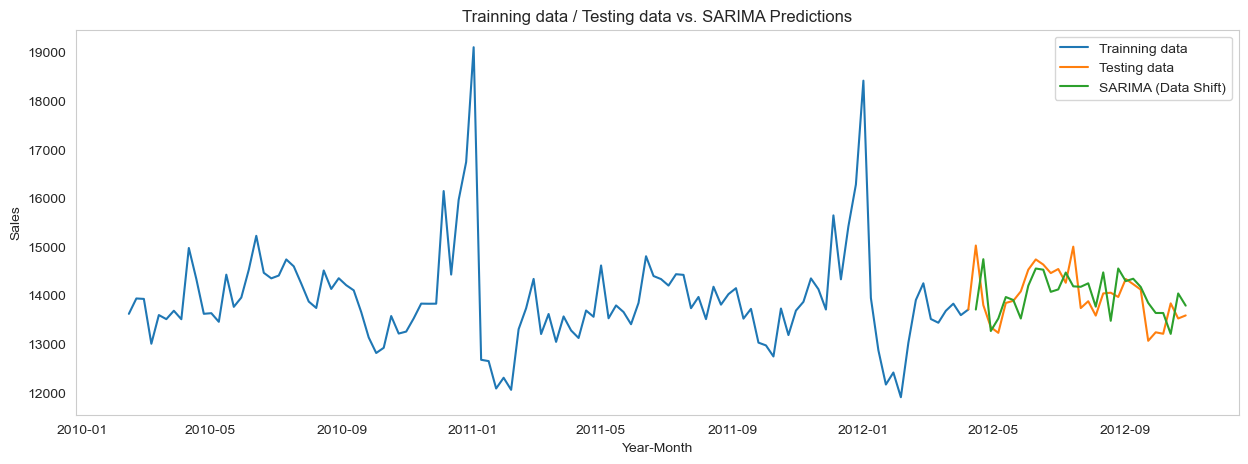

In [163]:
plt.figure(figsize = (15, 5))

plt.plot(DataShift[:len(DataShift) - len(DSTest)], label = 'Trainning data')
plt.plot(DataShift[len(DataShift) - (len(DSTest) + 1):], label = 'Testing data')
plt.plot(SarimaPredictionsDS, label = 'SARIMA (Data Shift)')

plt.xlabel('Year-Month')
plt.legend(loc = 'upper right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. SARIMA Predictions');

#### Comparation table

In [164]:
Model.append('SARIMA')
Data_Type.append('Data Shift')


MAE.append(metrics.mean_absolute_error(DSTest, SarimaPredictionsDS))
MSE.append(metrics.mean_squared_error(DSTest, SarimaPredictionsDS))
RMSE.append(np.sqrt(metrics.mean_absolute_error(DSTest, SarimaPredictionsDS)))

Min_Diff.append(SarimaSummaryDS.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(SarimaSummaryDS.describe(include = 'all')['Difference %'][1])
Max_Diff.append(SarimaSummaryDS.describe(include = 'all')['Difference %'][-1])

---------------------------------------------------------------------------------

### Seasonal Autoregressive Integrated Moving Average (SARIMA) (Data Log)
#### Get the parameters

In [165]:
arima_parametersDL = auto_arima(DataLog, start_p = 1, start_q = 1, test = 'adf', max_p = 3, max_q = 3, m = 12, 
                         start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action = 'ignore',  
                         suppress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-215.834, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-321.289, Time=0.88 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-217.834, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-269.402, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-331.456, Time=1.62 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-294.475, Time=0.91 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-330.900, Time=1.81 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-330.237, Time=2.22 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-317.256, Time=1.67 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-336.052, Time=3.36 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : 

#### Fit the model

In [166]:
SarimaDL = SARIMAX(DataLog, order = (2, 0, 2), seasonal_order = (2, 1, 1, 12)).fit()

SarimaDL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(2, 0, 2)x(2, 1, [1], 12)   Log Likelihood                 189.402
Date:                              Tue, 28 Feb 2023   AIC                           -362.804
Time:                                      12:32:01   BIC                           -339.802
Sample:                                  02-07-2010   HQIC                          -353.457
                                       - 10-28-2012                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4573      0.099     -4.619      0.000      -0.651      -0.263
ar.L2          0.1562      0.147      1.063      0.288      -0.132       0.444
ma.L1          1.1129      0.116      9.630      0.000       0.886       1.339
ma.L2          0.5655      0.100      5.669      0.000       0.370       0.761
ar.S.L12      -0.1251      0.185     -0.676      0.499      -0.487       0.237
ar.S.L24       0.0060      0.147      0.041      0.967      -0.281       0.293
ma.S.L12      -0.9242      0.489     -1.889      0.059      -1.883       0.035
sigma2         0.0027      0.001      2.558      0.011       0.001       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.11
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make predictions

In [167]:
start, end = len(DLTrain), len(DLTrain) + len(DLTest) - 1

SarimaPredictionsDL = SarimaDL.predict(start = start, end = end)

#### Score and Metrics

In [168]:
print(f"MAE: {metrics.mean_absolute_error(np.exp(DLTest), np.exp(SarimaPredictionsDL))}")
print(f"MSE: {metrics.mean_squared_error(np.exp(DLTest), np.exp(SarimaPredictionsDL))}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(np.exp(DLTest), np.exp(SarimaPredictionsDL)))}")

MAE: 375.34963228671245
MSE: 217159.3527014528
RMSE: 19.37394209464642


#### Model performance

In [169]:
SarimaSummaryDL = pd.DataFrame()

SarimaSummaryDL['Model Prediction'] = np.exp(SarimaPredictionsDL)

SarimaSummaryDL['Actual Value'] = np.exp(DLTest)

SarimaSummaryDL['Difference'] = SarimaSummaryDL['Model Prediction'] - SarimaSummaryDL['Actual Value']

SarimaSummaryDL['Difference %'] = round(np.absolute(SarimaSummaryDL['Difference'] / SarimaSummaryDL['Actual Value'] * 100), 2)

SarimaSummaryDL.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-10-28      13807.191079  13824.508733   -17.317654          0.13
2012-08-19      13983.142443  13964.657943    18.484500          0.13
2012-07-01      14165.612791  14256.616932   -91.004141          0.64
2012-09-02      14114.708206  14227.741508  -113.033303          0.79
2012-05-13      14018.927786  13885.275812   133.651974          0.96
2012-06-03      14588.424126  14736.944981  -148.520855          1.01
2012-04-22      13488.842776  13341.939822   146.902954          1.10
2012-06-10      14435.039355  14631.211990  -196.172636          1.34
2012-08-26      14109.907051  14334.458377  -224.551326          1.57
2012-09-09      13889.235121  14116.042424  -226.807303          1.61
2012-07-29      13804.977214  13580.951166   224.026048          1.65
2012-09-30      13453.963628  13207.163907   246.799721          1.87
2012-07-22      14138.245517  13876.783337   261.462180          1.88
2012-04-29      13491.872424  13226.167726   265.704698          2.01
2012-09-23      13508.617060  13237.123437   271.493624          2.05
2012-08-05      14382.690957  14037.398195   345.292762          2.46
2012-07-15      14101.346838  13735.922510   365.424327          2.66
2012-05-06      14215.796109  13841.218610   374.577499          2.71
2012-06-24      14118.704706  14539.544979  -420.840273          2.89
2012-05-20      13608.100251  14078.876809  -470.776558          3.34
2012-10-07      13371.078080  13832.804041  -461.725961          3.34
2012-10-21      14047.952015  13584.418693   463.533321          3.41
2012-10-14      14075.136873  13521.874281   553.262592          4.09
2012-06-17      13858.302596  14456.072308  -597.769711          4.14
2012-05-27      13809.011596  14525.867037  -716.855441          4.94
2012-07-08      14218.563082  14999.542681  -780.979599          5.21
2012-08-12      13308.500722  14052.098069  -743.597347          5.29
2012-09-16      13763.656953  13062.297582   701.359370          5.37
2012-04-15      15100.177380  13796.965723  1303.211657          9.45

#### Model performance statistics

In [170]:
SarimaSummaryDL.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean       13964.749129  13948.706538    16.042590      2.691034
std          393.775286    493.402025   473.970978      2.012119
min        13308.500722  13062.297582  -780.979599      0.130000
25%        13763.656953  13584.418693  -226.807303      1.340000
50%        14018.927786  13885.275812    18.484500      2.050000
75%        14138.245517  14256.616932   271.493624      3.410000
max        15100.177380  14999.542681  1303.211657      9.450000

#### Predictions vs. Testing Dataset

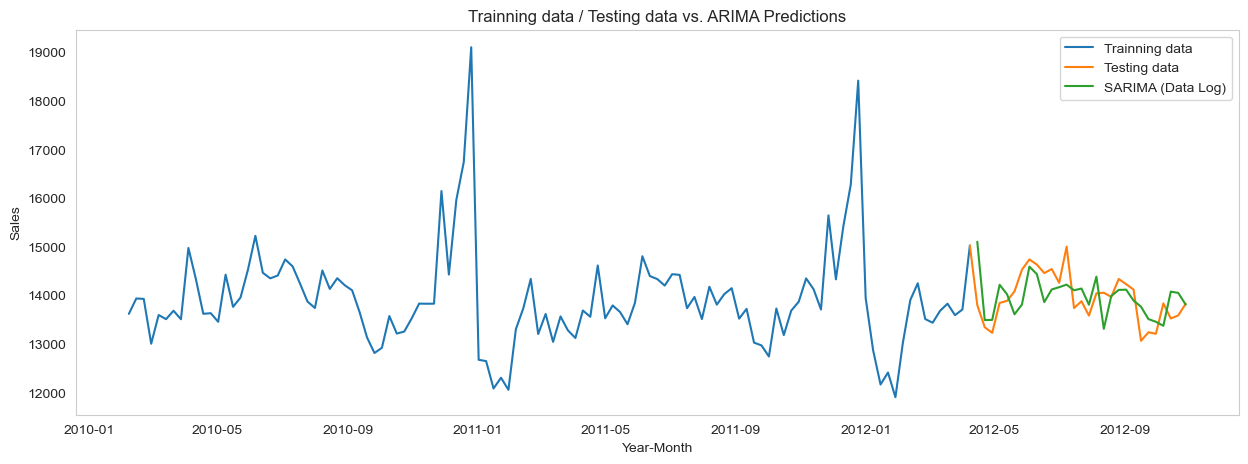

In [171]:
plt.figure(figsize = (15, 5))

plt.plot(np.exp(DataLog)[:len(np.exp(DataLog)) - len(DLTest)], label = 'Trainning data')
plt.plot(np.exp(DataLog)[len(np.exp(DataLog)) - (len(DLTest) + 1):], label = 'Testing data')
plt.plot(np.exp(SarimaPredictionsDL), label = 'SARIMA (Data Log)')

plt.xlabel('Year-Month')
plt.legend(loc = 'upper right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. ARIMA Predictions');

#### Comparation table

In [172]:
Model.append('SARIMA')
Data_Type.append('Data Log')

MAE.append(metrics.mean_absolute_error(np.exp(DLTest), np.exp(SarimaPredictionsDL)))
MSE.append(metrics.mean_squared_error(np.exp(DLTest), np.exp(SarimaPredictionsDL)))
RMSE.append(np.sqrt(metrics.mean_absolute_error(np.exp(DLTest), np.exp(SarimaPredictionsDL))))

Min_Diff.append(SarimaSummaryDL.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(SarimaSummaryDL.describe(include = 'all')['Difference %'][1])
Max_Diff.append(SarimaSummaryDL.describe(include = 'all')['Difference %'][-1])


---------------------------------------------------------------------------------


### Exponential Smoothing (ES) (First Differencing)

A family of models that use and exponentially weighted moving average to forecast future values.


#### Fit the model

In [173]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ExponentialFD = ExponentialSmoothing(FirstDiff, seasonal_periods = 12, seasonal = 'additive', trend = 'additive',
                                     damped = True).fit()

#### Make predictions

In [174]:
start, end = len(FDTrain), len(FDTrain) + len(FDTest) - 1

ExponentialPredictionsFD = ExponentialFD.predict(start = start, end = end)

#### Score and Metrics

In [175]:
print(f"MAE: {metrics.mean_absolute_error(FDTest, ExponentialPredictionsFD)}")
print(f"MSE: {metrics.mean_squared_error(FDTest, ExponentialPredictionsFD)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(FDTest, ExponentialPredictionsFD))}")

MAE: 519.6387821477533
MSE: 505280.5067694018
RMSE: 22.795586900708507


#### Model performance

In [176]:
ExponentialSummaryFD = pd.DataFrame()

ExponentialSummaryFD['Model Prediction'] = SarimaPredictionsFD

ExponentialSummaryFD['Actual Value'] = FDTest

ExponentialSummaryFD['Difference'] = ExponentialSummaryFD['Model Prediction'] - ExponentialSummaryFD['Actual Value']

ExponentialSummaryFD['Difference %'] = round(np.absolute(ExponentialSummaryFD['Difference'] / ExponentialSummaryFD['Actual Value'] * 100), 2)

ExponentialSummaryFD.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-06-03        215.990678    211.077944     4.912734          2.33
2012-07-01       -306.963865   -282.928047   -24.035818          8.50
2012-09-16       -760.719972  -1053.744842   293.024869         27.81
2012-10-14       -186.941334   -310.929760   123.988425         39.88
2012-05-06        327.577989    615.050884  -287.472895         46.74
2012-08-26        584.879098    369.800434   215.078664         58.16
2012-07-15       -510.980361  -1263.620171   752.639810         59.56
2012-04-15       -328.843968  -1226.222313   897.378346         73.18
2012-10-28        435.531787    240.090040   195.441747         81.40
2012-05-27        -36.537343    446.990228  -483.527571        108.17
2012-07-08       -118.487984    742.925749  -861.413733        115.95
2012-09-23        390.875274    174.825854   216.049420        123.58
2012-08-05       1178.936177    456.447029   722.489148        158.29
2012-04-22        334.255089   -455.025901   789.280990        173.46
2012-10-07       -723.229398    625.640133 -1348.869531        215.60
2012-07-29        605.507015   -295.832171   901.339185        304.68
2012-05-20       -449.406242    193.600997  -643.007239        332.13
2012-07-22        692.289659    140.860826   551.428833        391.47
2012-08-19        256.405167    -87.440126   343.845292        393.24
2012-09-30       -195.768011    -29.959529  -165.808482        553.44
2012-04-29        549.401976   -115.772096   665.174072        574.55
2012-06-17      -1267.812421   -175.139683 -1092.672739        623.89
2012-10-21        548.811410     62.544412   486.266998        777.47
2012-09-02        848.264680   -106.716869   954.981549        894.87
2012-06-10        890.442817   -105.732991   996.175808        942.16
2012-09-09      -1265.252260   -111.699084 -1153.553176       1032.73
2012-05-13        595.078101     44.057202   551.020900       1250.69
2012-06-24      -1069.711700     83.472672 -1153.184372       1381.51
2012-08-12       -428.448508     14.699874  -443.148382       3014.64

#### Model performance statistics

In [177]:
ExponentialSummaryFD.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean          27.763571    -41.333769    69.097340    474.485517
std          657.128979    492.436166   709.691511    629.443933
min        -1267.812421  -1263.620171 -1348.869531      2.330000
25%         -428.448508   -175.139683  -443.148382     73.180000
50%          215.990678     14.699874   215.078664    215.600000
75%          549.401976    211.077944   665.174072    623.890000
max         1178.936177    742.925749   996.175808   3014.640000

#### Predictions vs. Testing Dataset

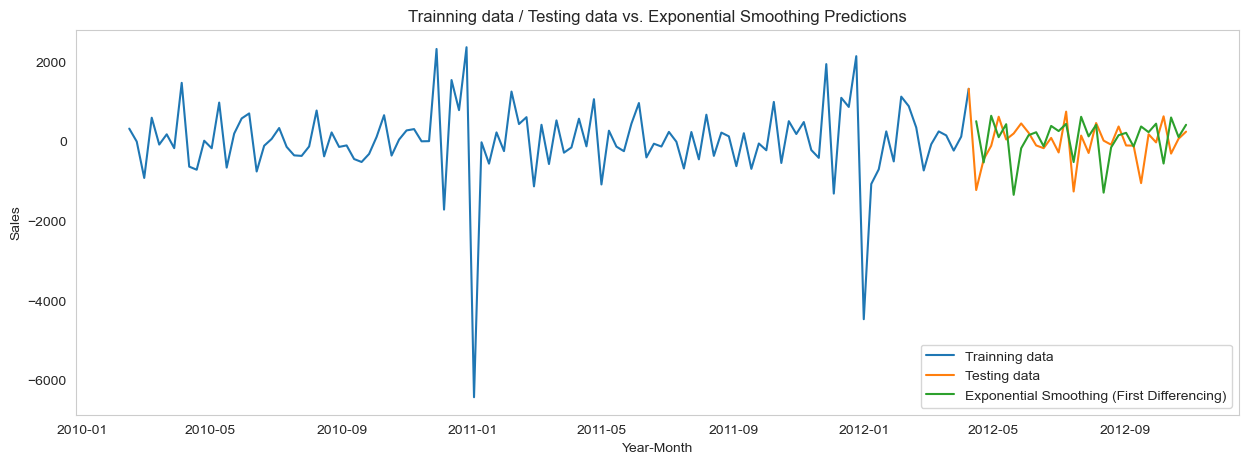

In [178]:
plt.figure(figsize = (15, 5))

plt.plot(FirstDiff[:len(FirstDiff) - len(DSTest)], label = 'Trainning data')
plt.plot(FirstDiff[len(FirstDiff) - (len(DSTest) + 1):], label = 'Testing data')
plt.plot(ExponentialPredictionsFD, label = 'Exponential Smoothing (First Differencing)')

plt.xlabel('Year-Month')
plt.legend(loc = 'lower right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. Exponential Smoothing Predictions');

#### Comparation table

In [179]:
Model.append('Exponential Smoothing')
Data_Type.append('First Differencing')
MAE.append(metrics.mean_absolute_error(FDTest, ExponentialPredictionsFD))
MSE.append(metrics.mean_squared_error(FDTest, ExponentialPredictionsFD))
RMSE.append(np.sqrt(metrics.mean_absolute_error(FDTest, ExponentialPredictionsFD)))

Min_Diff.append(ExponentialSummaryFD.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(ExponentialSummaryFD.describe(include = 'all')['Difference %'][1])
Max_Diff.append(ExponentialSummaryFD.describe(include = 'all')['Difference %'][-1])

---------------------------------------------------------------------------------

### Exponential Smoothing (ES) (Data Shift)
#### Fit the model

In [180]:
ExponentialDS = ExponentialSmoothing(DataShift, seasonal_periods = 10, seasonal = 'additive', trend = 'additive',
                                     damped = True).fit()

#### Make predictions

In [181]:
start, end = len(DSTrain), len(DSTrain) + len(DSTest) - 1

ExponentialPredictionsDS = ExponentialDS.predict(start = start, end = end)

#### Score and Metrics

In [182]:
print(f"MAE: {metrics.mean_absolute_error(DSTest, ExponentialPredictionsDS)}")
print(f"MSE: {metrics.mean_squared_error(DSTest, ExponentialPredictionsDS)}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(DSTest, ExponentialPredictionsDS))}")

MAE: 480.90808250236233
MSE: 373240.54207481135
RMSE: 21.92961656076919


#### Model performance

In [183]:
ExponentialSummaryDS = pd.DataFrame()

ExponentialSummaryDS['Model Prediction'] = SarimaPredictionsDS

ExponentialSummaryDS['Actual Value'] = DSTest

ExponentialSummaryDS['Difference'] = ExponentialSummaryDS['Model Prediction'] - ExponentialSummaryDS['Actual Value']

ExponentialSummaryDS['Difference %'] = round(np.absolute(ExponentialSummaryDS['Difference'] / ExponentialSummaryDS['Actual Value'] * 100), 2)

ExponentialSummaryDS.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-05-20      13901.882838  13885.275812    16.607025          0.12
2012-09-02      14290.768090  14334.458377   -43.690288          0.30
2012-09-16      14170.790140  14116.042424    54.747716          0.39
2012-04-29      13264.088080  13341.939822   -77.851742          0.58
2012-06-17      14525.886083  14631.211990  -105.325907          0.72
2012-09-09      14339.615925  14227.741508   111.874417          0.79
2012-05-13      13962.688831  13841.218610   121.470221          0.88
2012-06-10      14549.901223  14736.944981  -187.043758          1.27
2012-08-05      13765.117714  13580.951166   184.166548          1.36
2012-07-08      14467.416039  14256.616932   210.799107          1.48
2012-10-28      13786.003001  13584.418693   201.584308          1.48
2012-05-06      13521.039749  13226.167726   294.872023          2.23
2012-06-03      14196.228537  14525.867037  -329.638500          2.27
2012-07-29      14245.668097  13876.783337   368.884760          2.66
2012-06-24      14070.209496  14456.072308  -385.862812          2.67
2012-07-01      14119.808743  14539.544979  -419.736236          2.89
2012-09-30      13634.854312  13237.123437   397.730876          3.00
2012-08-12      14470.281256  14037.398195   432.883061          3.08
2012-07-22      14174.012319  13735.922510   438.089809          3.19
2012-10-07      13634.509864  13207.163907   427.345957          3.24
2012-10-21      14036.781826  13521.874281   514.907545          3.81
2012-05-27      13521.019281  14078.876809  -557.857529          3.96
2012-08-19      13474.180032  14052.098069  -577.918037          4.11
2012-08-26      14550.417199  13964.657943   585.759255          4.19
2012-10-14      13204.808476  13832.804041  -627.995564          4.54
2012-07-15      14183.091712  14999.542681  -816.450969          5.44
2012-09-23      13842.223487  13062.297582   779.925905          5.97
2012-04-22      14741.598609  13796.965723   944.632887          6.85
2012-04-15      13705.270496  15023.188036 -1317.917540          8.77

#### Model performance statistics

In [184]:
ExponentialSummaryDS.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean       14012.074533  13990.040308    22.034225      2.835862
std          408.809516    531.373392   504.207800      2.098483
min        13204.808476  13062.297582 -1317.917540      0.120000
25%        13705.270496  13584.418693  -329.638500      1.270000
50%        14070.209496  13964.657943   111.874417      2.670000
75%        14290.768090  14334.458377   397.730876      3.960000
max        14741.598609  15023.188036   944.632887      8.770000

#### Predictions vs. Testing Dataset

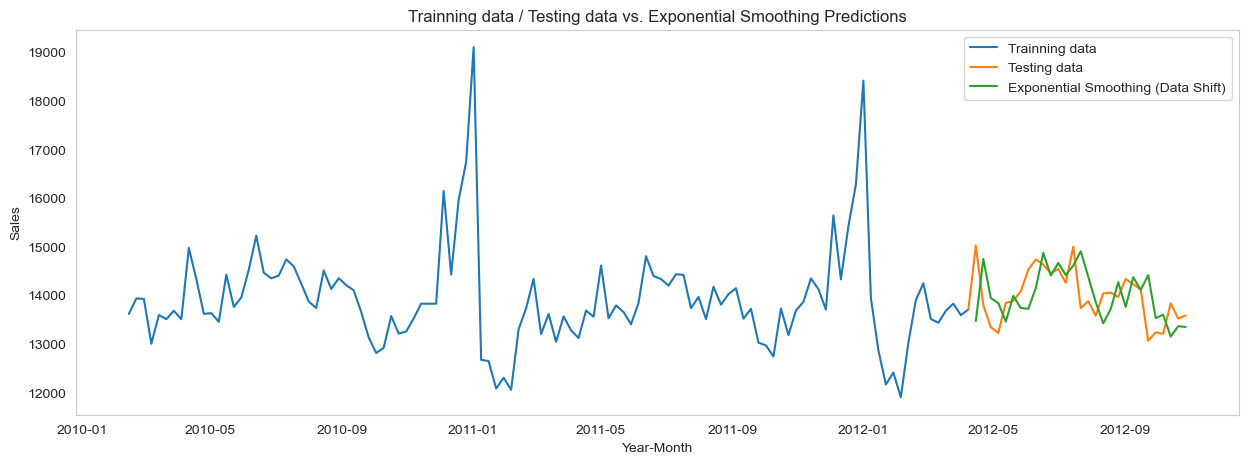

In [185]:
plt.figure(figsize = (15, 5))

plt.plot(DataShift[:len(DataShift) - len(DSTest)], label = 'Trainning data')
plt.plot(DataShift[len(DataShift) - (len(DSTest) + 1):], label = 'Testing data')
plt.plot(ExponentialPredictionsDS, label = 'Exponential Smoothing (Data Shift)')

plt.xlabel('Year-Month')
plt.legend(loc = 'upper right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. Exponential Smoothing Predictions');

#### Comparation table

In [186]:
Model.append('Exponential Smoothing')
Data_Type.append('Data Shift')

MAE.append(metrics.mean_absolute_error(DSTest, ExponentialPredictionsDS))
MSE.append(metrics.mean_squared_error(DSTest, ExponentialPredictionsDS))
RMSE.append(np.sqrt(metrics.mean_absolute_error(DSTest, ExponentialPredictionsDS)))

Min_Diff.append(ExponentialSummaryDS.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(ExponentialSummaryDS.describe(include = 'all')['Difference %'][1])
Max_Diff.append(ExponentialSummaryDS.describe(include = 'all')['Difference %'][-1])

---------------------------------------------------------------------------------

### Exponential Smoothing (ES) (Data Log)
#### Fit the model

In [187]:
ExponentialDL = ExponentialSmoothing(DataLog, seasonal_periods = 12, seasonal = 'additive', trend = 'additive',
                                     damped = True).fit()

#### Make predictions

In [188]:
start, end = len(DLTrain), len(DLTrain) + len(DLTest) - 1

ExponentialPredictionsDL = ExponentialDL.predict(start = start, end = end)

#### Score and Metrics

In [189]:
print(f"MAE: {metrics.mean_absolute_error(np.exp(DLTest), np.exp(ExponentialPredictionsDL))}")
print(f"MSE: {metrics.mean_squared_error(np.exp(DLTest), np.exp(ExponentialPredictionsDL))}")
print(f"RMSE: {np.sqrt(metrics.mean_absolute_error(np.exp(DLTest), np.exp(ExponentialPredictionsDL)))}")

MAE: 398.21971921654483
MSE: 243546.0427617247
RMSE: 19.95544334803276


#### Model performance

In [190]:
ExponentialSummaryDL = pd.DataFrame()

ExponentialSummaryDL['Model Prediction'] = np.exp(ExponentialPredictionsDL)

ExponentialSummaryDL['Actual Value'] = np.exp(DLTest)

ExponentialSummaryDL['Difference'] = ExponentialSummaryDL['Model Prediction'] - ExponentialSummaryDL['Actual Value']

ExponentialSummaryDL['Difference %'] = round(np.absolute(ExponentialSummaryDL['Difference'] / ExponentialSummaryDL['Actual Value'] * 100), 2)

ExponentialSummaryDL.sort_values(by = 'Difference %')

Model Prediction  Actual Value   Difference  Difference %
Date                                                                 
2012-08-05      14006.596803  14037.398195   -30.801392          0.22
2012-10-28      13920.433463  13824.508733    95.924730          0.69
2012-06-17      14339.476284  14456.072308  -116.596023          0.81
2012-06-03      14598.265908  14736.944981  -138.679073          0.94
2012-08-19      13823.934298  13964.657943  -140.723646          1.01
2012-08-26      14175.366627  14334.458377  -159.091750          1.11
2012-06-24      14374.481770  14539.544979  -165.063209          1.14
2012-10-21      13740.372615  13584.418693   155.953922          1.15
2012-05-13      14047.497577  13885.275812   162.221764          1.17
2012-09-09      13943.459963  14116.042424  -172.582461          1.22
2012-09-23      13428.649769  13237.123437   191.526332          1.45
2012-09-02      14461.221377  14227.741508   233.479869          1.64
2012-06-10      14873.676373  14631.211990   242.464383          1.66
2012-09-30      13496.856600  13207.163907   289.692693          2.19
2012-04-22      13644.810442  13341.939822   302.870620          2.27
2012-05-06      13472.697350  13841.218610  -368.521261          2.66
2012-07-01      14641.597400  14256.616932   384.980467          2.70
2012-07-08      14581.295854  14999.542681  -418.246827          2.79
2012-07-22      14265.940419  13876.783337   389.157082          2.80
2012-10-14      13933.862850  13521.874281   411.988569          3.05
2012-07-29      14092.703707  13580.951166   511.752541          3.77
2012-04-29      13761.811677  13226.167726   535.643950          4.05
2012-08-12      13385.247128  14052.098069  -666.850941          4.75
2012-05-27      13817.901792  14525.867037  -707.965245          4.87
2012-07-15      14437.727232  13735.922510   701.804721          5.11
2012-05-20      13286.244748  14078.876809  -792.632061          5.63
2012-10-07      12873.052121  13832.804041  -959.751919          6.94
2012-09-16      14021.526352  13062.297582   959.228769          7.34
2012-04-15      14939.141358  13796.965723  1142.175636          8.28

#### Model performance statistics

In [191]:
ExponentialSummaryDL.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count         29.000000     29.000000    29.000000     29.000000
mean       14013.305167  13948.706538    64.598629      2.876207
std          495.106948    493.402025   497.917762      2.171090
min        12873.052121  13062.297582  -959.751919      0.220000
25%        13740.372615  13584.418693  -165.063209      1.150000
50%        14006.596803  13885.275812   155.953922      2.270000
75%        14374.481770  14256.616932   384.980467      4.050000
max        14939.141358  14999.542681  1142.175636      8.280000

#### Predictions vs. Testing Dataset

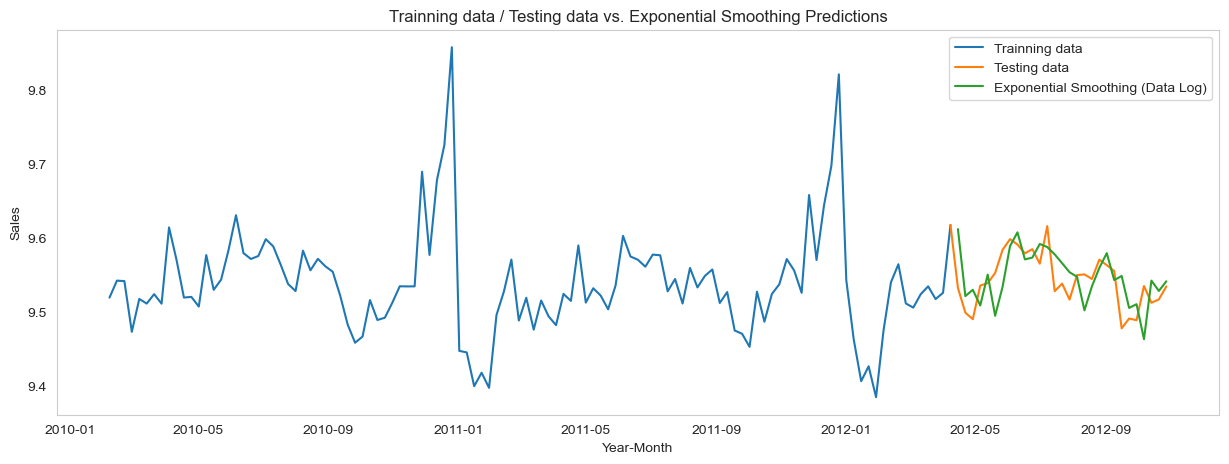

In [192]:
plt.figure(figsize = (15, 5))

plt.plot(DataLog[:len(DataLog) - len(DLTest)], label = 'Trainning data')
plt.plot(DataLog[len(DataLog) - (len(DLTest) + 1):], label = 'Testing data')
plt.plot(ExponentialPredictionsDL, label = 'Exponential Smoothing (Data Log)')

plt.xlabel('Year-Month')
plt.legend(loc = 'upper right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. Exponential Smoothing Predictions');

#### Comparation table

In [193]:
Model.append('Exponential Smoothing')
Data_Type.append('Data Log')

MAE.append(metrics.mean_absolute_error(np.exp(DLTest), np.exp(ExponentialPredictionsDL)))
MSE.append(metrics.mean_squared_error(np.exp(DLTest), np.exp(ExponentialPredictionsDL)))
RMSE.append(np.sqrt(metrics.mean_absolute_error(np.exp(DLTest), np.exp(ExponentialPredictionsDL))))

Min_Diff.append(ExponentialSummaryDL.describe(include = 'all')['Difference %'][3])
Mean_Diff.append(ExponentialSummaryDL.describe(include = 'all')['Difference %'][1])
Max_Diff.append(ExponentialSummaryDL.describe(include = 'all')['Difference %'][-1])

----------------------------------------


# Visualize, report, and present the problem solving steps and final solution.

## Create comparation table

In [194]:
ComparationTable = pd.DataFrame()

ComparationTable['Model'] = Model
ComparationTable['Data Type'] = Data_Type
ComparationTable['MAE'] = MAE
ComparationTable['MSE'] = MSE
ComparationTable['RMSE'] = RMSE
ComparationTable['Diff min.'] = Min_Diff
ComparationTable['Diff mean.'] = Mean_Diff
ComparationTable['Diff max.'] = Max_Diff

ComparationTable.sort_values(by = 'Diff mean.')

Model           Data Type         MAE            MSE  \
3                 ARIMA             Data Log  313.763450  158219.393536   
2                  ARIMA          Data Shift  329.468031  211124.176994   
6                 SARIMA            Data Log  375.349632  217159.352701   
5                 SARIMA          Data Shift  397.709321  245944.616275   
8  Exponential Smoothing          Data Shift  480.908083  373240.542075   
9  Exponential Smoothing            Data Log  398.219719  243546.042762   
0          Random Forest         Normal Data  452.595010  336192.300779   
1                  ARIMA  First Differencing  332.645983  196454.635270   
4                 SARIMA    First Difference  597.145197  491068.827062   
7  Exponential Smoothing  First Differencing  519.638782  505280.506769   

        RMSE  Diff min.  Diff mean.  Diff max.  
3  17.713369       0.21    2.242414       6.47  
2  18.151254       0.08    2.338621       8.31  
6  19.373942       0.13    2.691034       9.45  
5  19.942651       0.12    2.835862       8.77  
8  21.929617       0.12    2.835862       8.77  
9  19.955443       0.22    2.876207       8.28  
0  21.274280       0.03    3.338372       9.71  
1  18.238585       6.16  237.234138    2577.87  
4  24.436555       2.33  474.485517    3014.64  
7  22.795587       2.33  474.485517    3014.64

Our best performance model was the ARIMA trained with the Data Log transformation. With a difference mean of 2.24 (This means that in average our model was off by 2.24%) a very good stat for a continuos prediction, the model maximum difference was 6.47 which still pretty good.

## Arima (Data Log) statistics

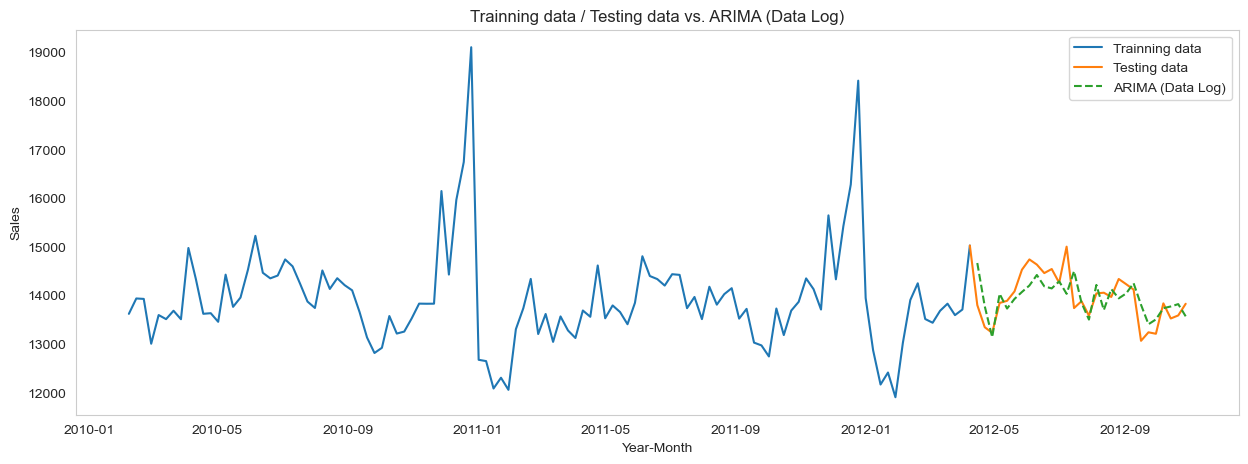

In [195]:
plt.figure(figsize = (15, 5))

plt.plot(np.exp(DataLog)[:len(np.exp(DataLog)) - len(DLTest)], label = 'Trainning data')
plt.plot(np.exp(DataLog)[len(np.exp(DataLog)) - (len(DLTest) + 1):], label = 'Testing data')
plt.plot(np.exp(ArimaPredictionsDL), label = 'ARIMA (Data Log)', linestyle = '--')

plt.xlabel('Year-Month')
plt.legend(loc = 'upper right')
plt.ylabel('Sales')
plt.title('Trainning data / Testing data vs. ARIMA (Data Log)');

I can see that the model performed with very good accuracy and it predicted sucessfully most of the testing data set.

In [196]:
ArimaSummaryDL.describe()

Model Prediction  Actual Value  Difference  Difference %
count         29.000000     29.000000   29.000000     29.000000
mean       13940.250569  13948.706538   -8.455970      2.242414
std          343.224603    493.402025  404.717221      1.763385
min        13136.186862  13062.297582 -970.225053      0.210000
25%        13733.385705  13584.418693 -258.068031      1.150000
50%        13935.772266  13885.275812  -81.525800      1.710000
75%        14183.323406  14256.616932  189.020741      2.780000
max        14663.177157  14999.542681  866.211435      6.470000

More than 75% of the testing data observations were predicted with less than 3% of error, which is incredible. I can also see that 50% of the observations were predicted with less than 2% of error by our model. The performance is very good in overall. 

## Transformations Performance

Text(0.5, 1.0, 'Trainning data / Testing data vs. First Differencing Data Models')

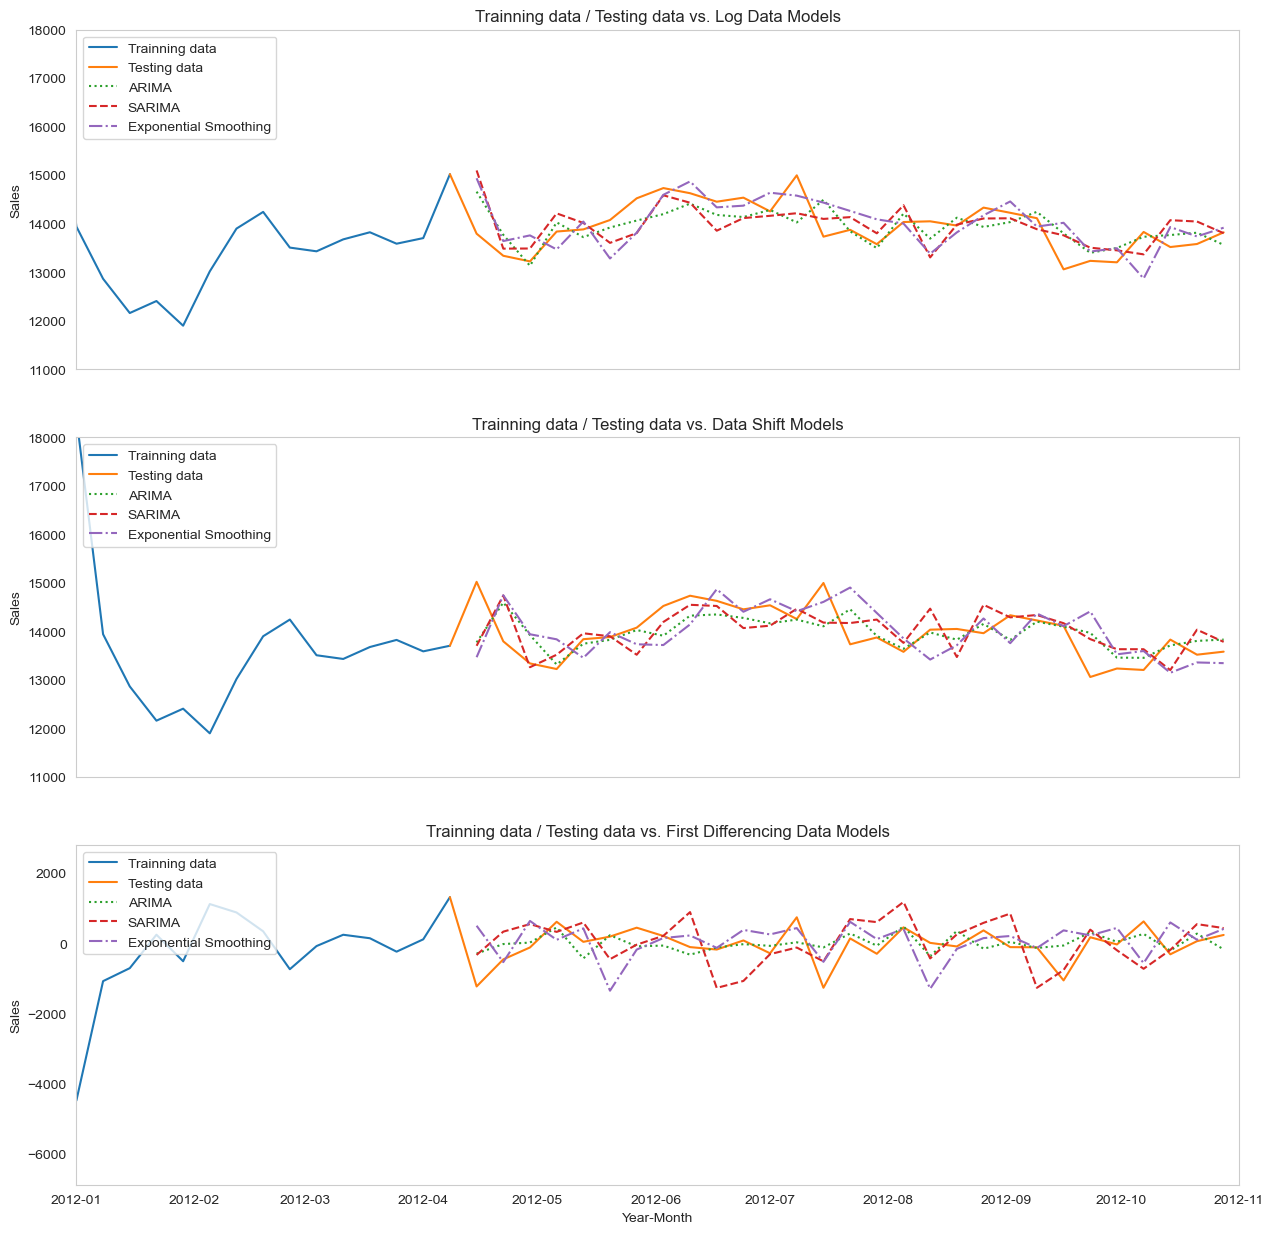

In [197]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, sharex = True, figsize = (15, 15))

ax1.plot(np.exp(DataLog)[:len(np.exp(DataLog)) - len(DLTest)], label = 'Trainning data')

ax1.plot(np.exp(DataLog)[len(np.exp(DataLog)) - (len(DLTest) + 1):], label = 'Testing data')

ax1.plot(np.exp(ArimaPredictionsDL), label = 'ARIMA', alpha = 1, linestyle = ':')

ax1.plot(np.exp(SarimaPredictionsDL), label = 'SARIMA', alpha = 1, linestyle = '--')

ax1.plot(np.exp(ExponentialPredictionsDL), label = 'Exponential Smoothing', alpha = 1, 
         linestyle = '-.')

ax1.set_xlabel('')
ax1.legend(loc = 'upper left')
ax1.set_ylim(11_000, 18_000)
ax1.set_xlim(pd.to_datetime('2012-01'), pd.to_datetime('2012-11'))
ax1.set_ylabel('Sales')
ax1.set_title('Trainning data / Testing data vs. Log Data Models')

# -------------------------------------------------------------------------------------------------------

ax2.plot(DataShift[:len(DataShift) - len(DSTest)], label = 'Trainning data')

ax2.plot(DataShift[len(DataShift) - (len(DSTest) + 1):], label = 'Testing data')

ax2.plot(ArimaPredictionsDS, label = 'ARIMA', alpha = 1, linestyle = ':')

ax2.plot(SarimaPredictionsDS, label = 'SARIMA', alpha = 1, linestyle = '--')

ax2.plot(ExponentialPredictionsDS, label = 'Exponential Smoothing', alpha = 1, 
         linestyle = '-.')

ax2.set_xlabel('')
ax2.legend(loc = 'upper left')
ax2.set_ylim(11_000, 18_000)
ax2.set_xlim(pd.to_datetime('2012-01'), pd.to_datetime('2012-11'))
ax2.set_ylabel('Sales')
ax2.set_title('Trainning data / Testing data vs. Data Shift Models')

# -------------------------------------------------------------------------------------------------------

ax3.plot(FirstDiff[:len(FirstDiff) - len(FDTest)], label = 'Trainning data')

ax3.plot(FirstDiff[len(FirstDiff) - (len(FDTest) + 1):], label = 'Testing data')

ax3.plot(ArimaPredictionsFD, label = 'ARIMA', alpha = 1, linestyle = ':')

ax3.plot(SarimaPredictionsFD, label = 'SARIMA', alpha = 1, linestyle = '--')

ax3.plot(ExponentialPredictionsFD, label = 'Exponential Smoothing', alpha = 1, 
         linestyle = '-.')

ax3.set_xlabel('Year-Month')
ax3.legend(loc = 'upper left')

ax3.set_xlim(pd.to_datetime('2012-01'), pd.to_datetime('2012-11'))
ax3.set_ylabel('Sales')
ax3.set_title('Trainning data / Testing data vs. First Differencing Data Models')

From the charts I can see that Log Models were not really that far off and I notice that First Diff models are really bad.. I'll look for some statistics.

In [198]:
ComparationTable.groupby('Data Type').mean().sort_values(by = 'Diff mean.')

MAE            MSE       RMSE  Diff min.  \
Data Type                                                             
Data Log            362.444267  206308.263000  19.014252   0.186667   
Data Shift          402.695145  276769.778448  20.007841   0.106667   
Normal Data         452.595010  336192.300779  21.274280   0.030000   
First Differencing  426.142382  350867.571020  20.517086   4.245000   
First Difference    597.145197  491068.827062  24.436555   2.330000   

                    Diff mean.    Diff max.  
Data Type                                    
Data Log              2.603218     8.066667  
Data Shift            2.670115     8.616667  
Normal Data           3.338372     9.710000  
First Differencing  355.859828  2796.255000  
First Difference    474.485517  3014.640000

As I expected I can see that Data Log models had a better performance than the others, First Diff models had the worst performance of all. In order to take a decision and solve the problem I will take into consideration DataLog models and DataShift models.

In this particular situation I'll leave outside the First Difference and Normal Data models, because First Difference performance is not even close to the other models performance so this will definitely not solve our problem and I am leaving normal data models behind too since normal data relays in a regression model is not perfect because I am dealing with time series, even when our Random Forest did an amazing performance I have choseen to keep it out.

In [199]:
ComparationTable[(ComparationTable['Data Type'] == 'Data Log') | (ComparationTable['Data Type'] == 'Data Shift')].sort_values(by = 'Diff mean.')

Model   Data Type         MAE            MSE       RMSE  \
3                 ARIMA     Data Log  313.763450  158219.393536  17.713369   
2                  ARIMA  Data Shift  329.468031  211124.176994  18.151254   
6                 SARIMA    Data Log  375.349632  217159.352701  19.373942   
5                 SARIMA  Data Shift  397.709321  245944.616275  19.942651   
8  Exponential Smoothing  Data Shift  480.908083  373240.542075  21.929617   
9  Exponential Smoothing    Data Log  398.219719  243546.042762  19.955443   

   Diff min.  Diff mean.  Diff max.  
3       0.21    2.242414       6.47  
2       0.08    2.338621       8.31  
6       0.13    2.691034       9.45  
5       0.12    2.835862       8.77  
8       0.12    2.835862       8.77  
9       0.22    2.876207       8.28

From the statistics I can see that our better performance model is the ARIMA in both Data transformations, so I will perform our last test in these models in order to take a final decision.

## Decision Test
For the final test I will let the models predict the entire dataset (Trainning + Testing). This might not be as efficient as doing a cross validation as I did for the performance metrics, but since I dont have more data to test on, this method will help us to take a decision with the models performance.
### Making predictions

In [200]:
start, end = 0, len(DataLog) - 1

ArimaFinalPredictionsDataLog = ArimaDL.predict(start = start, end = end)

DSstart, DSend = 0, len(DataShift) - 1

ArimaFinalPredictionsDataShift = ArimaDS.predict(start = DSstart, end = DSend)

### Ploting predictions vs. Data

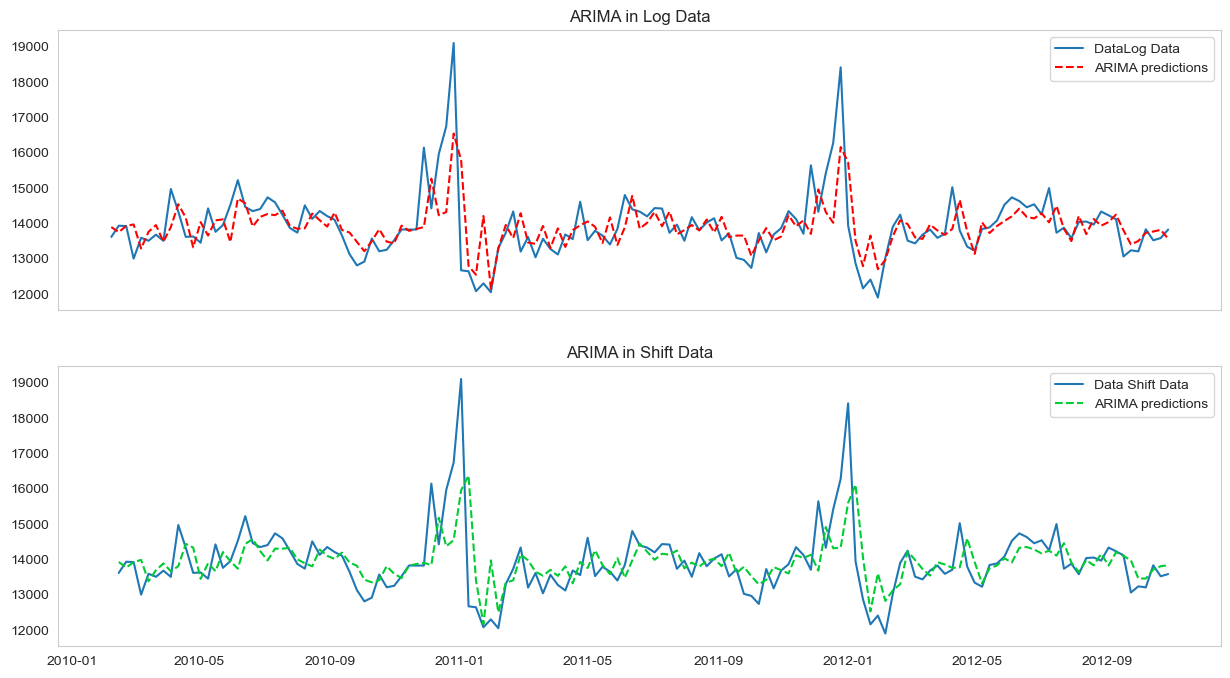

In [201]:
fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (15, 8))

ax1.plot(np.exp(DataLog), label = 'DataLog Data')
ax1.plot(np.exp(ArimaFinalPredictionsDataLog), label = 'ARIMA predictions', linestyle = '--', color = 'red')
ax1.set_title('ARIMA in Log Data')
ax1.legend()

ax2.plot(DataShift, label = 'Data Shift Data')
ax2.plot(ArimaFinalPredictionsDataShift, label = 'ARIMA predictions', linestyle = '--', color = '#00cc33')
ax2.set_title('ARIMA in Shift Data')
ax2.legend();

### Data Log Statistics

In [202]:
ARIMADLSummary = pd.DataFrame()

ARIMADLSummary['Model Prediction'] = np.exp(ArimaFinalPredictionsDataLog)

ARIMADLSummary['Actual Value'] = np.exp(DataLog)

ARIMADLSummary['Difference'] = ARIMADLSummary['Model Prediction'] - ARIMADLSummary['Actual Value']

ARIMADLSummary['Difference %'] = round(np.absolute(ARIMADLSummary['Difference'] / ARIMADLSummary['Actual Value'] * 100), 2)

ARIMADLSummary.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count        143.000000    143.000000   143.000000    143.000000
mean       13907.694758  13927.600078   -19.905320      3.479930
std          571.020863    961.111656   749.962809      3.755387
min        12148.758231  11901.021570 -2561.527064      0.020000
25%        13629.732453  13509.449169  -271.115128      1.150000
50%        13895.410485  13824.920762    16.207176      2.230000
75%        14133.307609  14333.534674   313.032863      4.695000
max        16543.085815  19104.612878  3123.227755     24.650000

### Data Shift Statistics

In [203]:
ARIMADSSummary = pd.DataFrame()

ARIMADSSummary['Model Prediction'] = ArimaFinalPredictionsDataShift

ARIMADSSummary['Actual Value'] = DataShift

ARIMADSSummary['Difference'] = ARIMADSSummary['Model Prediction'] - ARIMADSSummary['Actual Value']

ARIMADSSummary['Difference %'] = round(np.absolute(ARIMADSSummary['Difference'] / ARIMADSSummary['Actual Value'] * 100), 2)

ARIMADSSummary.describe(include = 'all')

Model Prediction  Actual Value   Difference  Difference %
count        142.000000    142.000000   142.000000    142.000000
mean       13930.101903  13928.326073     1.775830      3.523803
std          543.744465    964.474482   793.903108      4.100291
min        12170.057984  11901.021570 -3148.864515      0.010000
25%        13683.596526  13508.960407  -244.111886      0.822500
50%        13904.726785  13825.548317    42.760769      2.145000
75%        14158.557250  14333.996526   392.160258      4.855000
max        16372.684917  19104.612878  3701.471545     29.210000

### Models Statistics

In [204]:
FinalSummary = pd.DataFrame()

FinalSummary['Model'] = ['ARIMA'] * 2

FinalSummary['Data Type'] = ['Data Log', 'Data Shift']

FinalSummary['MAE'] = [metrics.mean_absolute_error(np.exp(DataLog), np.exp(ArimaFinalPredictionsDataLog)), 
                      metrics.mean_absolute_error(DataShift, ArimaFinalPredictionsDataShift)]

FinalSummary['MSE'] = [metrics.mean_squared_error(np.exp(DataLog), np.exp(ArimaFinalPredictionsDataLog)), 
                      metrics.mean_squared_error(DataShift, ArimaFinalPredictionsDataShift)]

FinalSummary['RMSE'] = [np.sqrt(metrics.mean_absolute_error(np.exp(DataLog), np.exp(ArimaFinalPredictionsDataLog))), 
                       np.sqrt(metrics.mean_absolute_error(DataShift, ArimaFinalPredictionsDataShift))]

FinalSummary['Diff min.'] = [ARIMADLSummary.describe(include = 'all')['Difference %'][3], 
                            ARIMADSSummary.describe(include = 'all')['Difference %'][3]]

FinalSummary['Diff mean.'] = [ARIMADLSummary.describe(include = 'all')['Difference %'][1], 
                             ARIMADSSummary.describe(include = 'all')['Difference %'][1]] 

FinalSummary['Diff max.'] = [ARIMADLSummary.describe(include = 'all')['Difference %'][-1], 
                            ARIMADSSummary.describe(include = 'all')['Difference %'][-1]]

FinalSummary

Model   Data Type         MAE            MSE       RMSE  Diff min.  \
0  ARIMA    Data Log  495.925865  558907.260607  22.269393       0.02   
1  ARIMA  Data Shift  502.179015  625846.691126  22.409351       0.01   

   Diff mean.  Diff max.  
0    3.479930      24.65  
1    3.523803      29.21

### Final decision

It is a hard decision to chose between what type of data transformation to use since they're both had an amazing performance with the ARIMA model, I have chosen to use the DataLog transformation to end this project.

**Does the Data Log transformation with an ARIMA model solves the problem?** 

Yes, the performance presented and the statistics are good enought to safetly say that I can execute the model through the years and forecast a very accurate prediction of the weekly sales for Walmart. Besides the model is easily maintainable and retrainable, for future tunning and improvement. 

I am accomplishing a low implementation and maintaining cost in case of deployment to the real world, through an easy pipline configuration the project can be feed with more data and use for real-time analysis in a dashboard for an accessible cost per hour.


I have managed to solve the entire problem, developed a really good approach and an amazing data science project.

____________________________

# Supply or submit the results.

## Saving the model

In [205]:
ArimaDL.save('Trainned Model/ArimaWalmartForecasting.pkl')

In order to load the model please use:

**from** statsmodels.tsa.arima_model **import** ARIMAResults

ArimaDL = ARIMAResults.load('ArimaWalmartForecasting.pkl')